In [1]:
import sys
!{sys.executable} -m pip install shap --user

In [2]:
import pickle
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import pandas as pd
import shap
from datetime import datetime
from iso3166 import countries
from littlebird import TweetReader, TweetTokenizer
from collections import OrderedDict
import matplotlib.pyplot as plt

In [3]:
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 200)

In [4]:
shap.initjs()

In [5]:
import sys
sys.path.append("/export/b10/jzhan237/minerva/src/evaluation")

In [6]:
result_path = "/export/b10/jzhan237/minerva/experiments/country_weighted/results/"
model_path = result_path+"results_daily_0_rf_model.pkl"
settings_path = result_path+"results_daily_0_rf_dict.pkl"
clf = pickle.load(open(model_path, "rb"))
results = pickle.load(open(settings_path, "rb"))
args = results["settings"]

Trying to unpickle estimator DecisionTreeClassifier from version 0.24.0 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator RandomForestClassifier from version 0.24.0 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator Pipeline from version 0.24.0 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.


In [7]:
args

Namespace(acled_event_data='/home/aadelucia/files/minerva/data/2014-01-01-2020-01-01_acled_reduced_all.csv', agg_weekly=False, balance_country_samples=True, debug=True, exclude_country=None, features='/export/b10/jzhan237/minerva/experiments/count_features/count_10k_features.tsv', fit_scaler=False, from_save=False, keep_feature_names=True, lead_time=0, models=['rf', 'random'], n_iter=10, n_jobs=10, output_dir='/export/b10/jzhan237/minerva/experiments/country_weighted/results', random_seed=42, run_cv_train=False, save_df=False, single_country=None, split_countries=False, test=False, test_on_training=False, test_years=['2018', '2019'], time_variance_test=False, train_years=['2014', '2015', '2016'], use_existing_model=False, validation_years=['2017'], violent_demonstration_only=False, weight_by_country=False)

In [8]:
clf.clf

Pipeline(memory=None,
         steps=[('rf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='gini', max_depth=32,
                                        max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1,
                                        min_samples_split=32,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=10,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [9]:
[estimator.get_depth() for estimator in clf.clf['rf'].estimators_]

[32, 32, 32, 32, 32, 32, 32, 32, 32, 32]

In [10]:
from event_forecasting import load_dataset
dataset_df, feat_index = load_dataset(args)
train_df = dataset_df[dataset_df.DATE.map(lambda x: x.strftime("%Y") in args.train_years)]
# if args.validation_years:
#     valid_df = dataset_df[dataset_df.DATE.map(lambda x: x.strftime("%Y") in args.validation_years)]
# else:
#     valid_df = None
test_df = dataset_df[dataset_df.DATE.map(lambda x: x.strftime("%Y") in args.test_years)]

INFO:root:Loading, aggregating, and labelling features
INFO:root:                    1000s  100s  10am  10k  10pm  10th  11th  12th  \
COUNTRY DATE                                                         
BEN     2015-01-22      0     0     0    0     0     0     0     0   
TGO     2016-04-15      0     0     0    0     0     0     0     0   
COD     2015-01-22      0     0     0    0     0     0     0     0   
CAF     2015-01-22      0     0     0    0     0     0     0     0   
CIV     2015-01-22      0     0     0    0     0     0     0     0   

                    147notjustanumber  14th  16days  16daysofactivism  16th  \
COUNTRY DATE                                                                  
BEN     2015-01-22                  0     0       0                 0     0   
TGO     2016-04-15                  0     0       0                 0     0   
COD     2015-01-22                  0     0       0                 0     0   
CAF     2015-01-22                  0     0      

In [11]:
feature_names = list(dataset_df)[feat_index:]

In [12]:
X_train = train_df.iloc[:, feat_index:]
y_train = train_df.LABEL.values
X_test = test_df.iloc[:, feat_index:]
y_test = test_df.LABEL.values

In [13]:
pred_labels = clf.predict(X_test)
f1 = sklearn.metrics.f1_score(y_test, pred_labels)
precision = sklearn.metrics.precision_score(y_test, pred_labels)
recall = sklearn.metrics.recall_score(y_test, pred_labels)
print(f"{precision} {recall} {f1}")

0.5653894870170995 0.3670092497430627 0.4450953508662595


In [14]:
np.sum(pred_labels)/len(pred_labels)

0.2102250033284516

In [15]:
X_train.mean().sort_values(ascending=False)[:100]

time          3.854921
police        3.664612
country       3.416529
stop          3.276492
make          2.946862
govt          2.930495
world         2.784364
president     2.731465
government    2.593195
day           2.564428
today         2.530547
anc           2.496524
change        2.417222
women         2.367501
media         2.355291
money         2.332163
back          2.247796
power         2.237402
pti           2.222756
corruption    2.140133
news          2.065085
buhari        2.025613
black         1.998590
good          1.983920
lol           1.966956
killed        1.961604
court         1.947435
support       1.893317
party         1.875660
work          1.842807
political     1.840513
leaders       1.666906
zuma          1.650539
give          1.622990
years         1.619048
army          1.615726
guys          1.605691
days          1.591117
nation        1.590806
security      1.555898
pay           1.538360
wrong         1.530428
call          1.528803
vote       

In [16]:
# def shap_single(explaner, index):
#     print(clf.predict_proba(X_test.iloc[index, :].values.reshape(1,-1)))
#     shap_values_single = explainer.shap_values(X_test.iloc[index,:], nsamples=1000)
#     shap.force_plot(explainer.expected_value, shap_values_single, feature_names)

In [17]:
f = lambda x: clf.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))
explainer = shap.KernelExplainer(f, med)

In [18]:
def peek_entry(country, date, num=30):
    temp_idx = test_df[(test_df.COUNTRY == country) & (test_df.DATE == date)].index[0]
    idx = np.where(test_df.index == temp_idx)[0]
    print(test_df.iloc [idx,feat_index:].iloc[0].sort_values(ascending=False)[:num])
    return idx

In [19]:
def sort_dict(d, rev=False):
    return OrderedDict(sorted(d.items(), key=lambda x:x[1], reverse=rev))

def rank_tweets(country_code, date_str, weight_dict, top_num, print_weights=False, civil_unrest_only=True):
    print(f"{country_code} {date_str}")
    if print_weights:
        print("Feature weights:")
        for k, v in weight_dict.items():
            print(f"{k}\t{v}")
    print("\nTop weighted tweets:\n")
    tweet_file = f"/home/aadelucia/files/minerva/raw_tweets_deduplicated/tweets_en/{date_str}_{country_code}.gz"
    reader = TweetReader(tweet_file)
    tokenizer = TweetTokenizer()
    score_dict = {}
    text_dict = {}
    civil_unrest_score_dict = {}
    count = 0
    for tweet in reader.read_tweets():
        if civil_unrest_only:
            if tweet['civil_unrest_related'] == False:
                continue
#         count +=1
#         if count == 5:
#             break
        weight = 0
        tokens = tokenizer.tokenize(tweet['text'])
        for token in tokens:
#             print(f">>{token}<<")
            if token in weight_dict:
#                 print("YES")
                weight += weight_dict[token]
        score_dict[tweet['id']] = weight
        if tweet.get("truncated", False):
            text_dict[tweet['id']] = tweet['extended_tweet']['full_text']
        else:
            text_dict[tweet['id']] = tweet['text']
        civil_unrest_score_dict[tweet['id']] = tweet['civil_unrest_score']
    score_dict = sort_dict(score_dict, rev=True)
    top_tweets = []
    for tweet_id, score in list(score_dict.items())[:top_num]:
        text = text_dict[tweet_id]
        cu_score = civil_unrest_score_dict[tweet_id]
        top_tweets.append(tweet_id)
        print(f"{text} \n weight={score}, civil_unrest_score={cu_score}\n")
    print(len(top_tweets))
    print('-'*70, "\n")


In [20]:
def shap_value_to_weight_dict(shap_values, feature_names):
    weight_mean = shap_values.mean(axis=0)
    weight_dict = dict(zip(feature_names, weight_mean))
    return weight_dict

# Summary Plots

## 500 random samples

In [ ]:
num_samples = 500
X_sample = X_test.sample(min(num_samples, len(X_test)))

shap_values500 = explainer.shap_values(X_sample, nsamples=500)

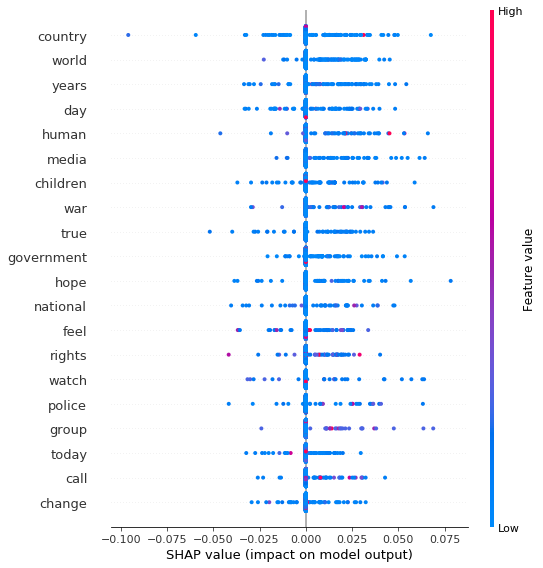

In [55]:
shap.summary_plot(shap_values500, X_sample, show=False)
plt.savefig('normal_sample_500_1819.png', bbox_inches = "tight")

## Myanmar

In [21]:
peek_entry('MMR', '2018-03-01', 100)

media                   3
peace                   2
show                    2
genocide                2
blindly                 2
start                   2
records                 2
recorded                2
watch                   2
groups                  2
aug                     2
video                   2
smiling                 2
evidences               2
send                    2
june                    2
attached                2
terrorist               1
converted               1
deal                    1
post                    1
sex                     1
countries               1
leaders                 1
india                   1
tomorrow                1
meant                   1
bout                    1
unnecessary             1
world                   1
lots                    1
money                   1
things                  1
sponsored               1
doesn't                 1
news                    1
totally                 1
wrong                   1
talks       

array([73])

In [22]:
# Rohingya genocide
# The Rohingya genocide is a series of ongoing persecutions by the Myanmar government of the Muslim Rohingya people. 
# The genocide has consisted of two phases to date: the first was a military crackdown that occurred from October 
# 2016 to January 2017, and the second has been occurring since August 2017.
mmr_df = test_df.loc[test_df['COUNTRY'] == 'MMR'].iloc[:,feat_index:]

In [23]:
test_df.loc[test_df['COUNTRY'] == 'MMR']

,COUNTRY,DATE,LABEL,1000s,100s,10am,10k,10pm,10th,11th,12th,147notjustanumber,14th,16days,16daysofactivism,16th,18th,1bn,1m,1st,1st mention,1st time,20th,21st,21st century,24hrs,2b,2bn,2day,2m,2nd,2pm,30bn,30bn loan,30pm,30th,35us,35us touts,3days,3m,3rd,3rd time,3rd world,4bn,4m,4rm,4th,5bn,5k,5m,...,youthrejectsbilawal,youths,youtube,yr,yrs,yu,yuletide,yup,zab,zahra,zakzaky,zambian,zanc,zanu,zanu pf,zarb,zarb azb,zarbeazb,zardari,zaria,zayn,zia,zille,zim,zimbabwe,zimbabwean,zimbabweans,zinda,zindabad,zinhle,zionism,zionist,zionists,zones,zoo,zulfiqar,zulu,zulus,zuma,zuma anc,zuma pay,zuma president,zuma's,zumaimpeachment,zumamustfall,zumamustfallmarch,zumamuststillfall,zumaqanda,zupta,zuptamustfall
15,MMR,2018-02-28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
574,MMR,2018-01-18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1826,MMR,2018-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3464,MMR,2018-02-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5926,MMR,2018-03-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85930,MMR,2019-11-15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
85945,MMR,2019-07-15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
86000,MMR,2019-06-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
86095,MMR,2019-10-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
len(mmr_df)

721

In [25]:
shap_values_mmr = explainer.shap_values(mmr_df, nsamples=mmr_df.shape[0])

  0%|          | 0/721 [00:00<?, ?it/s]

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.17855386 0.08985665 0.06029597 0.04551949 0.03665675 0.03075094
 0.02653485 0.02337487 0.02091901 0.01895606 0.01735163 0.01601612
 0.01488749 0.01392145 0.01308551 0.01235529 0.01171217 0.01114165
 0.01063229 0.01017494 0.0097622  0.00938801 0.00904735 0.00873606
 0.00845064 0.00818812 0.00794598 0.00772206 0.00751448 0.00732165
 0.00714215 0.00697476 0.00681839 0.00667209 0.00653503 0.00640645
 0.00628568 0.00617213 0.00606527 0.00596462 0.00586975 0.00578025
 0.00569579 0.00561604 0.00554071 0.00546954 0.00540227 0.00533871
 0.00527863 0.00522186 0.00516823 0.00511758 0.00506977 0.00502466
 0.00498215 0.00494212 0.00490446 0.00486908 0.0048359  0.00480483
 0.00477582 0.00474877 0.00472365 0.00470038 0.00467893 0.00465923
 0.00464126 0.00462497 0.00461034 0.00459732 0.00458589 0.00457603
 0.00456773 0.00456095 0.0045557  0.00455195 0.0045497  0.00454896]
INFO:shap:num_paired_subset_sizes = 77
INFO:shap:weight_left 

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.14419525 0.09791036 0.07481829 0.06100568 0.05183489 0.04531851
 0.04046295 0.03671638 0.03374782 0.03134679 0.02937311 0.02772986
 0.02634797 0.02517695 0.02417908 0.0233257  0.0225947  0.02196881
 0.02143443 0.02098079 0.02059932 0.02028322 0.02002712 0.01982685
 0.01967925 0.01958207 0.01953384]
INFO:shap:num_paired_subset_sizes = 28
INFO:shap:weight_left = 0.779277045004891
INFO:shap:np.sum(w_aug) = 56.99999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00997128  0.          0.          0.          0.         -0.01936824
  0.00488882  0.          0.00037159  0.01317247  0.01038404  0.
  0.01281648  0.          0.          0.          0.          0.
  0.          0.00180626  0.          0.          0.01157512 -0.01513683
  0.          0.00682115  0.          0.          0.          0.
  0.          0.01062235  0.         -0.01163394 -0.01053582  0.
  0.03543334  0.         

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.18579285 0.09364559 0.06293796 0.04759038 0.03838695 0.0322557
 0.02788008 0.02460181 0.02205518 0.02002078 0.01835898 0.01697669
 0.01580947 0.01481129 0.01394841 0.01319552 0.01253325 0.01194656
 0.01142356 0.01095477 0.01053247 0.0101504  0.00980334 0.00948697
 0.00919767 0.00893235 0.0086884  0.0084636  0.00825599 0.00806393
 0.00788594 0.00772078 0.00756732 0.00742459 0.00729171 0.00716793
 0.00705257 0.00694501 0.00684471 0.00675119 0.00666402 0.0065828
 0.00650717 0.00643684 0.0063715  0.0063109  0.00625481 0.00620302
 0.00615534 0.00611161 0.00607166 0.00603537 0.00600261 0.00597328
 0.00594727 0.00592452 0.00590493 0.00588847 0.00587506 0.00586467
 0.00585728 0.00585285 0.00585137]
INFO:shap:num_paired_subset_sizes = 62
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 126.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.44143595e-02
  0.000

INFO:shap:num_paired_subset_sizes = 61
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 122.99999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00862265  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.01362191 -0.01194552
  0.         -0.01133645  0.          0.          0.          0.
  0.          0.00604574  0.          0.00275145  0.          0.
  0.          0.          0.          0.00767565  0.          0.
  0.01822299  0.04194781  0.          0.          0.         -0.00934592
  0.01372123 -0.00849794  0.         -0.01802398  0.00832824  0.
  0

INFO:shap:num_paired_subset_sizes = 63
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 127.99999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.00972313  0.          0.0023844   0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.01750178  0.00512596
  0.          0.          0.          0.          0.00595869  0.
  0.          0.00724092  0.00233554  0.          0.          0.
  0.          0.00486268  0.          0.          0.          0.
  0.         -0.01802326  0.          0.          0.          0.
  0.00519547  0.         -0.00020378  0.04365804  0.          0.00839562
  0.          0.          0.          0.          0.          0.00407169
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.      

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.17597808 0.08850969 0.05935769 0.04478484 0.0360437  0.03021846
 0.02605947 0.02294193 0.02051871 0.01858154 0.01699788 0.01567939
 0.01456489 0.01361068 0.01278473 0.01206301 0.01142715 0.01086284
 0.01035882 0.00990605 0.00949723 0.00912638 0.00878856 0.00847967
 0.00819624 0.00793535 0.00769452 0.0074716  0.00726476 0.00707241
 0.00689315 0.00672578 0.00656923 0.00642256 0.00628493 0.00615561
 0.00603394 0.00591933 0.00581124 0.00570921 0.00561281 0.00552165
 0.00543537 0.00535366 0.00527624 0.00520283 0.0051332  0.00506712
 0.0050044  0.00494484 0.00488828 0.00483456 0.00478354 0.00473509
 0.00468907 0.00464538 0.00460392 0.00456458 0.00452728 0.00449193
 0.00445846 0.00442679 0.00439687 0.00436861 0.00434198 0.00431692
 0.00429338 0.00427131 0.00425068 0.00423144 0.00421356 0.00419701
 0.00418175 0.00416777 0.00415504 0.00414353 0.00413322 0.00412411
 0.00411616 0.00410938 0.00410374 0.00409924 0.00409588 0.0040

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.20136745 0.10191157 0.06877983 0.05222968 0.04231265 0.0357126
 0.03100835 0.02748931 0.02476074 0.02258581 0.02081382 0.01934433
 0.0181078  0.01705459 0.01614831 0.01536167 0.01467384 0.0140686
 0.0135332  0.01305742 0.01263303 0.0122533  0.01191269 0.0116066
 0.01133119 0.01108322 0.01085997 0.01065912 0.01047868 0.01031697
 0.01017255 0.01004417 0.00993078 0.00983147 0.00974548 0.00967216
 0.00961098 0.0095615  0.00952336 0.00949631 0.00948015 0.00947477]
INFO:shap:num_paired_subset_sizes = 41
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 84.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [0.         0.         0.         0.         0.         0.
 0.         0.         0.00059252 0.         0.         0.03739401
 0.         0.0040514  0.         0.         0.         0.00016917
 0.         0.00149197 0.0094499  0.         0.         0.
 0.         0.         0.         0.      

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.13709679 0.09282595 0.07072454 0.0574922  0.04869558 0.04243472
 0.03775971 0.03414288 0.03126769 0.02893276 0.02700391 0.02538829
 0.02401965 0.02284947 0.0218414  0.02096774 0.02020701 0.01954231
 0.01896019 0.01844988 0.01800261 0.01761125 0.01726994 0.01697389
 0.01671912 0.01650239 0.01632105 0.01617294 0.01605638 0.01597006
 0.01591302 0.01588466]
INFO:shap:num_paired_subset_sizes = 33
INFO:shap:weight_left = 0.7873773108540753
INFO:shap:np.sum(w_aug) = 67.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0.         0.         0.         0.         0.11535627 0.
 0.         0.         0.         0.         0.         0.
 0.         0.0168122  0.         0.         0.         0.
 0.         0.         0.         0.00328338 0.         0.
 0.         0.         0.01949728 0.         0.         0.00558151
 0.         0.         0.         0.         0.         0.
 0.         0.         0.

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.14957673 0.10179528 0.07797085 0.06373269 0.05429081 0.0475926
 0.04261198 0.03877915 0.03575249 0.03331482 0.03132162 0.02967312
 0.0282983  0.02714541 0.02617593 0.02536076 0.02467764 0.02410941
 0.02364277 0.02326749 0.02297574 0.02276168 0.02262117 0.02255157]
INFO:shap:num_paired_subset_sizes = 25
INFO:shap:weight_left = 0.7732932988609207
INFO:shap:np.sum(w_aug) = 51.000000000000014
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [0.         0.01589082 0.00130558 0.         0.         0.
 0.         0.00333342 0.         0.         0.         0.
 0.         0.01499731 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.    

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.16461435 0.11279131 0.08701044 0.07165566 0.06152253 0.05438153
 0.0491188  0.04511652 0.04200504 0.0395502  0.0375971  0.03603983
 0.03480418 0.03383739 0.0331018  0.03257075 0.03222609 0.03205648]
INFO:shap:num_paired_subset_sizes = 19
INFO:shap:weight_left = 0.7572517560136776
INFO:shap:np.sum(w_aug) = 39.00000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.00056163  0.          0.          0.          0.          0.
  0.          0.          0.         -0.01375746 -0.01267778  0.
  0.          0.          0.00066023  0.          0.0199955   0.
  0.          0.          0.          0.          0.          0.
  0.01408272  0.00101655  0.          0.          0.          0.
  0.          0.00089695  0.          0.          0.00605437  0.
  0.          0.00085091  0.00432123]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.19876383 0.13853237 0.10884686 0.

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.13588743 0.09196422 0.07003429 0.05690286 0.04817174 0.04195603
 0.03731335 0.03372021 0.03086257 0.02854062 0.02662122 0.02501225
 0.02364794 0.02248014 0.02147278 0.02059832 0.01983542 0.01916728
 0.01858053 0.0180644  0.01761017 0.0172107  0.01686011 0.01655356
 0.01628704 0.01605725 0.01586143 0.01569734 0.01556318 0.01545748
 0.01537915 0.01532737 0.01530161]
INFO:shap:num_paired_subset_sizes = 34
INFO:shap:weight_left = 0.7887815215476609
INFO:shap:np.sum(w_aug) = 68.99999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.02426485  0.          0.00358683  0.          0.          0.
  0.          0.          0.         -0.00387253  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00293204  0.
  0.          0.          0.          0.          0.          0.
  0.          0.00256843  0.          0.          0. 

INFO:shap:num_paired_subset_sizes = 32
INFO:shap:weight_left = 0.7859088624473578
INFO:shap:np.sum(w_aug) = 65.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.          0.          0.00920577  0.01020889  0.          0.
  0.          0.00213566  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.01749304
  0.          0.          0.03312668  0.          0.          0.02061752
  0.          0.          0.01405044  0.10287567  0.          0.
  0.00365582  0.00146302  0.          0.          0.          0.01835021
  0.          0.          0.          0.01475877  0.01743827  0.
  0.          0.          0.          0.          0.01366295]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1896974

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.17893899 0.1237109  0.09635176 0.08016467 0.06958738 0.06223965
 0.05693513 0.05301896 0.05010292 0.04794537 0.04639159 0.04534201
 0.04473475 0.04453593]
INFO:shap:num_paired_subset_sizes = 14
INFO:shap:weight_left = 0.738876032213929
INFO:shap:np.sum(w_aug) = 30.00000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.          0.00128983  0.          0.          0.          0.
  0.          0.          0.          0.          0.01325634  0.03074514
  0.          0.          0.         -0.00549452  0.          0.01112576
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00648051  0.        ]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.18416455 0.0927906  0.06233994 0.04712023 0.037993   0.03191211
 0.02757206 0.02432012 0.02179364 0.01977505 0.01812589 0.01675386
 0.01559506 0.01460385 0.

INFO:shap:np.sum(w_aug) = 150.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.01801957  0.          0.00584565  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.00629327  0.          0.0096626   0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00269373  0.          0.01388524  0.          0.01208864  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00946184  0.          0.          0.
  0.01592406  0.         -0.00178973  0.          0.00202899 -0.00810501
  0.         -0.01557996  0.          0.         -0.02103982  0.
  0.          0.02503323  0.          0.          0.    

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.16680872 0.11457569 0.08861713 0.0731806  0.06301663 0.05587681
 0.05063836 0.04667898 0.0436269  0.04124725 0.03938539 0.03793643
 0.0368279  0.0360095  0.03544685 0.03511763 0.03500924]
INFO:shap:num_paired_subset_sizes = 17
INFO:shap:weight_left = 0.751959091970831
INFO:shap:np.sum(w_aug) = 36.00000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [0.         0.         0.01731954 0.         0.00164942 0.
 0.         0.         0.         0.         0.         0.
 0.         0.05409486 0.         0.         0.01183117 0.
 0.         0.         0.         0.         0.00286067 0.
 0.         0.         0.         0.01734633 0.         0.
 0.         0.         0.06957394 0.         0.         0.02063211]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.13786813 0.09341884 0.07123187 0.05795135 0.04912542 0.04284623
 0.03815993 0.03453666 0.03165861 0.02932358 0.02739687 0.025

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.19764027 0.09991814 0.06736054 0.0510945  0.04134544 0.03485516
 0.03022733 0.02676379 0.02407666 0.02193325 0.02018548 0.01873465
 0.01751243 0.01647002 0.01557166 0.01479051 0.01410609 0.01350245
 0.01296703 0.01248977 0.01206255 0.01167874 0.01133287 0.01102038
 0.01073747 0.01048092 0.01024801 0.01003642 0.00984415 0.0096695
 0.00951098 0.00936733 0.00923742 0.00912032 0.00901517 0.00892126
 0.00883797 0.00876475 0.00870114 0.00864676 0.00860127 0.00856441
 0.00853596 0.00851575 0.00850367 0.00849965]
INFO:shap:num_paired_subset_sizes = 45
INFO:shap:weight_left = 1.0000000000000002
INFO:shap:np.sum(w_aug) = 92.00000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.00252669  0.          0.          0.          0.
  0.          0.          0.          0.00392583  0.          0.
  0.          0.          0.          0.          0.00961381  0.
  0.00348335  0.00438573  0.          0

INFO:shap:num_paired_subset_sizes = 29
INFO:shap:weight_left = 0.7810620664910819
INFO:shap:np.sum(w_aug) = 59.000000000000014
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.00347413  0.          0.
  0.          0.          0.          0.          0.          0.
  0.0130848   0.          0.          0.          0.         -0.02104374
  0.          0.          0.00267245  0.          0.         -0.03545421
  0.          0.          0.          0.          0.          0.
  0.          0.11092965  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.01209767  0.          0.00677882  0.01807359
 -0.00875754  0.          0.         -0.02871254  0.0060059 ]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.13970687 0.09469021 0.07222135 0.05877323 0.04983695 0.043

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.14057046 0.09535774 0.07279542 0.05929518 0.0503277  0.04395195
 0.03919753 0.03552543 0.03261235 0.03025264 0.02830933 0.02668768
 0.02532015 0.02415729 0.02316218 0.02230667 0.02156901 0.02093219
 0.02038272 0.01990986 0.01950499 0.01916119 0.01887289 0.01863563
 0.0184459  0.01830098 0.01819885 0.01813812 0.01811797]
INFO:shap:num_paired_subset_sizes = 29
INFO:shap:weight_left = 0.7819204976079971
INFO:shap:np.sum(w_aug) = 60.000000000000014
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.0096136   0.          0.          0.          0.
  0.          0.          0.00177261  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.00409496  0.          0.
  0.          0. 

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.16461435 0.11279131 0.08701044 0.07165566 0.06152253 0.05438153
 0.0491188  0.04511652 0.04200504 0.0395502  0.0375971  0.03603983
 0.03480418 0.03383739 0.0331018  0.03257075 0.03222609 0.03205648]
INFO:shap:num_paired_subset_sizes = 19
INFO:shap:weight_left = 0.7572517560136776
INFO:shap:np.sum(w_aug) = 39.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.011218    0.
  0.          0.0024298   0.          0.         -0.01567566  0.01683001
  0.          0.02029901  0.          0.          0.          0.01510442
  0.          0.          0.          0.          0.          0.00431108
  0.01511028  0.          0.          0.          0.          0.03274585
  0.01888499  0.          0.01353842]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.20451404 0.103

INFO:shap:num_paired_subset_sizes = 30
INFO:shap:weight_left = 0.7835740337680467
INFO:shap:np.sum(w_aug) = 62.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.01042987  0.          0.          0.02052395  0.          0.
  0.          0.          0.1360273   0.         -0.03041137  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.01200732  0.          0.          0.
  0.04752244  0.          0.          0.          0.          0.
  0.          0.02257873  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.00463835
  0.          0.00158173  0.          0.          0.          0.
  0.          0.00435595  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.20038938 0.10138749 0.06840601 0.05193018 0.04205703 0.03548562
 0.0308012

INFO:shap:num_paired_subset_sizes = 43
INFO:shap:weight_left = 0.9999999999999997
INFO:shap:np.sum(w_aug) = 86.99999999999997
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [-0.00351574 -0.00621395  0.          0.          0.         -0.00364951
  0.00350394  0.         -0.00215607 -0.01337252  0.00323152  0.
  0.          0.          0.          0.          0.          0.
  0.          0.00191213 -0.00820164 -0.03166149  0.          0.
  0.          0.         -0.01000054  0.          0.          0.
 -0.00779932  0.0210391   0.          0.          0.00194318 -0.0094383
  0.          0.          0.00537457  0.00022516  0.          0.0027802
  0.          0.00699184  0.          0.          0.          0.
  0.          0.          0.00623296  0.01112208 -0.00479913  0.00459347
  0.          0.          0.          0.          0.01645331  0.
  0.          0.00440447  0.          0.04936341  0.          0.
  0.          0.          0.00464219  0.00830389  0.   

INFO:shap:remaining_weight_vector = [0.13429575 0.09086678 0.06918266 0.05619761 0.04756308 0.04141547
 0.03682303 0.03326816 0.03044037 0.0281421  0.0262417  0.02464807
 0.0232962  0.02213845 0.02113915 0.02027106 0.01951306 0.01884853
 0.01826422 0.01774949 0.01729566 0.01689567 0.01654368 0.01623486
 0.01596523 0.01573146 0.0155308  0.01536099 0.01522018 0.01510688
 0.01501992 0.01495841 0.01492175 0.01490957]
INFO:shap:num_paired_subset_sizes = 34
INFO:shap:weight_left = 0.7894610341374766
INFO:shap:np.sum(w_aug) = 70.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.02344679  0.          0.          0.          0.         -0.01797958
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.01261776
  0.          0.00589595  0.          0.          0.   

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.13321343 0.09009604 0.06856574 0.05567129 0.04709566 0.04098875
 0.03642555 0.03289221 0.03008045 0.02779416 0.02590261 0.02431536
 0.02296783 0.02181273 0.0208146  0.0199464  0.01918712 0.01852024
 0.01793258 0.01741352 0.01695444 0.01654825 0.01618913 0.01587224
 0.01559355 0.0153497  0.01513789 0.0149558  0.01480149 0.01467339
 0.01457022 0.01449097 0.01443489 0.01440145 0.01439034]
INFO:shap:num_paired_subset_sizes = 35
INFO:shap:weight_left = 0.7907775984660778
INFO:shap:np.sum(w_aug) = 72.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [0.         0.         0.         0.         0.01187583 0.
 0.02403474 0.         0.03121401 0.07690457 0.         0.
 0.         0.00099801 0.         0.         0.00916816 0.01742967
 0.02506081 0.         0.         0.01453445 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00401547 0.    

INFO:shap:num_full_subsets = 3
INFO:shap:remaining_weight_vector = [0.51020408 0.48979592]
INFO:shap:num_paired_subset_sizes = 4
INFO:shap:weight_left = 0.21798288680039274
INFO:shap:phi = [ 7.52939736e-18  2.38552425e-18  8.08216199e-03 -2.92417134e-18
  1.57440329e-18  3.04222234e-18 -3.86990623e-19  2.99455511e-19
  9.42973842e-18  5.20417043e-18]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.20342757 0.10301781 0.06957047 0.0528644  0.04285541 0.03619545
 0.03144966 0.02790066 0.02514989 0.02295825 0.02117362 0.01969458
 0.01845095 0.01739262 0.01648285 0.01569412 0.01500539 0.01440034
 0.01386607 0.01339232 0.01297077 0.01259465 0.01225841 0.01195742
 0.01168784 0.01144642 0.01123045 0.01103762 0.01086598 0.01071385
 0.01057984 0.01046275 0.01036156 0.01027543 0.01020367 0.01014569
 0.01010105 0.01006941 0.01005052 0.01004424]
INFO:shap:num_paired_subset_sizes = 39
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 80.0
INFO:shap:np.sum(self.kernelWeight

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.20082479 0.10159372 0.06853544 0.05202088 0.04212422 0.0355369
 0.03084095 0.02732742 0.02460247 0.02242978 0.02065901 0.01918992
 0.01795315 0.01689915 0.0159916  0.01520329 0.01451339 0.01390574
 0.01336759 0.01288876 0.01246099 0.01207757 0.01173297 0.01142257
 0.01114254 0.01088962 0.01066107 0.01045456 0.01026809 0.01009996
 0.00994869 0.00981303 0.00969188 0.00958431 0.00948952 0.00940683
 0.00933564 0.00927547 0.00922593 0.00918667 0.00915744 0.00913806
 0.0091284 ]
INFO:shap:num_paired_subset_sizes = 43
INFO:shap:weight_left = 0.9999999999999997
INFO:shap:np.sum(w_aug) = 86.99999999999997
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.          0.          0.00668247  0.          0.          0.
  0.          0.          0.01059679  0.          0.         -0.00573439
  0.00436378  0.          0.          0.         -0.03617177  0.
  0.          0.          0.         -0.00365505 

INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 89.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [-0.00910873  0.          0.          0.          0.          0.02141665
  0.          0.          0.          0.          0.          0.
 -0.01383394  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00417281 -0.02312048
  0.          0.00295822  0.          0.          0.          0.
  0.04942037  0.          0.00363477  0.          0.          0.
  0.          0.          0.          0.00620925  0.          0.
  0.00850102  0.          0.          0.00505874  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.01947873
  0.          0.          0.          0.          0.          0.
  0.          0.00193125  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.15619583 0.10660985 0.08190757 0.06716421 0.0574053  0.0504994
 0.04538122 0.04145939 0.03837955 0.03591669 0.03392132 0.03229048
 0.03095125 0.02985076 0.02895009 0.02822025 0.02763959 0.02719199
 0.02686568 0.02665246 0.02654712]
INFO:shap:num_paired_subset_sizes = 22
INFO:shap:weight_left = 0.7661121923312149
INFO:shap:np.sum(w_aug) = 44.99999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.03098868  0.          0.          0.01063838  0.          0.
  0.021261    0.          0.          0.01545275  0.          0.
  0.          0.          0.          0.         -0.01278003  0.
  0.          0.          0.          0.          0.00139829  0.01095841
  0.          0.          0.          0.          0.          0.00216716
  0.01233868  0.          0.          0.01713316  0.          0.00072336
  0.          0.          0.          0.          0.          0.
  0.00365007  0.          0.      

INFO:shap:num_paired_subset_sizes = 44
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 89.99999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00367356  0.          0.          0.          0.          0.00319506
  0.         -0.02451507  0.          0.00417104  0.          0.
  0.          0.          0.00279551  0.          0.          0.
  0.00017969  0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.00649251  0.00171767
  0.0051514   0.          0.          0.          0.          0.
  0.          0.00576285 -0.00585856  0.          0.          0.
 -0.0072004   0.02237538  0.          0.00154406 -0.03608687  0.01660706
  0.          0.0006053   0.          0.          0.          0.
  0.         -0.01387176 -0.00519911  0.          0.          0.
  0.         -0.00561931  0.          0.          0.00746305  0.
  0.          0.0247518   0.          0.          0.          0.
  0.0031983

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.13661858 0.09252475 0.07051281 0.05733501 0.04857549 0.04234183
 0.03768788 0.03408807 0.0312271  0.02890443 0.02698639 0.02538052
 0.02402085 0.02285906 0.02185897 0.02099301 0.02023979 0.01958251
 0.0190078  0.01850495 0.01806527 0.01768168 0.01734839 0.01706066
 0.01681459 0.01660701 0.01643532 0.01629746 0.01619183 0.01611721
 0.01607277 0.01605801]
INFO:shap:num_paired_subset_sizes = 32
INFO:shap:weight_left = 0.7866514322796172
INFO:shap:np.sum(w_aug) = 66.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.          0.00324594  0.         -0.01760069  0.          0.
  0.          0.          0.         -0.00449242  0.          0.01536994
  0.          0.          0.          0.01376038  0.00585748  0.00461237
  0.          0.          0.01872807  0.          0.          0.
  0.00302759  0.00688582  0.          0.00206532  0.00091629  0.
  0.          0.         -0.00450318  0.      

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.17168588 0.11803404 0.09138119 0.07554179 0.06512223 0.05781259
 0.05245957 0.04842422 0.04532507 0.04292147 0.04105532 0.03961982
 0.03854173 0.03777089 0.03727391 0.03703029]
INFO:shap:num_paired_subset_sizes = 17
INFO:shap:weight_left = 0.7500341733194282
INFO:shap:np.sum(w_aug) = 35.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [0.         0.         0.         0.         0.         0.
 0.         0.02842275 0.         0.02183451 0.         0.
 0.         0.         0.         0.         0.         0.
 0.00295997 0.         0.         0.         0.03430081 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.18046767 0.12460863 0.09691782 0.08051634 0.06978083 0.06230431
 0.05688655 0.05286427 0.04984345 0.04757784 0.04590844 0.0447313
 0.04397952 0.04361302]
INFO:

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.19594553 0.09901503 0.0667198  0.05058376 0.0409117  0.0344719
 0.02987933 0.02644151 0.02377372 0.02164515 0.0199089  0.01846709
 0.01725192 0.016215   0.01532084 0.01454283 0.01386063 0.01325842
 0.01272374 0.0122466  0.01181894 0.01143417 0.01108685 0.01077247
 0.01048723 0.01022793 0.00999185 0.00977669 0.00958046 0.00940143
 0.00923813 0.00908927 0.00895374 0.00883056 0.00871889 0.00861797
 0.00852718 0.00844593 0.00837374 0.00831019 0.00825491 0.00820759
 0.00816798 0.00813585 0.00811103 0.0080934  0.00808286 0.00807935]
INFO:shap:num_paired_subset_sizes = 47
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 96.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.          0.          0.          0.00429434  0.          0.
  0.         -0.01846865  0.          0.00678849  0.          0.
  0.          0.          0.          0.          0.00297116  0.01683965
  0.          0.      

INFO:shap:num_paired_subset_sizes = 82
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 166.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.01095631  0.          0.          0.          0.00179315  0.
  0.          0.03364703  0.03926597  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.00699523  0.          0.          0.          0.
  0.          0.          0.00112896  0.          0.          0.
  0.          0.          0.          0.          0.00045562  0.01183648
  0.          0.00150389  0.          0.          0.          0.
  0.          0.          0.01355064  0.00596296  0.          0.
  0.          0.          0.00843232  0.          0.          0.
  0.          0.          0.          0.          0.00204444  0.00443849
  0.          0.          0.00189989  0.          0.          0.
  0.          0.

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.13473507 0.09114431 0.06937851 0.05634376 0.04767549 0.04150321
 0.03689175 0.03332158 0.03048105 0.02817188 0.02626192 0.02465973
 0.02330005 0.02213505 0.02112891 0.02025429 0.01948998 0.01881927
 0.01822886 0.01770804 0.01724809 0.01684188 0.01648355 0.01616821
 0.01589183 0.01565104 0.01544306 0.01526555 0.01511662 0.01499471
 0.01489859 0.0148273  0.01478016 0.0147567 ]
INFO:shap:num_paired_subset_sizes = 35
INFO:shap:weight_left = 0.7901262208613435
INFO:shap:np.sum(w_aug) = 71.00000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.          0.          0.         -0.02000904  0.
  0.          0.00157519  0.          0.          0.          0.
  0.          0.00044426  0.          0.          0.01996647  0.
  0.04496018  0.          0.          0.          0.01022102  0.
  0.          0.          0.00158194  0.          0.          0.00741293
 -0.02461666  0.002

INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.01551575  0.00457909  0.          0.          0.          0.
  0.          0.          0.00451822  0.          0.          0.
  0.         -0.01144609  0.00187258  0.          0.          0.
  0.          0.          0.00567691  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.00171583  0.          0.          0.
  0.00989241  0.          0.          0.          0.         -0.0198081
 -0.03947118  0.          0.          0.          0.          0.00161588
  0.          0.          0.          0.00763253  0.          0.
  0.          0.          0.          0.          0.          0.03867278]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.21691054 0.15264075 0.12121471 0.10303251 0.09158445 0.08410817
 0.07925577 0.07632037 0.07493273]
INFO:shap:num_paired_subset_sizes = 10
INFO:shap:weight_left = 0.7081500886493783
INFO:shap:np.sum

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.19662066 0.13732237 0.10814137 0.09106641 0.08010472 0.07270008
 0.06758835 0.06408377 0.06179507 0.06049867 0.06007854]
INFO:shap:num_paired_subset_sizes = 11
INFO:shap:weight_left = 0.7205686118045272
INFO:shap:np.sum(w_aug) = 23.999999999999993
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.12201547  0.          0.         -0.04736306 -0.01280528
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.01747661  0.          0.          0.        ]
INFO:shap:num_full_subsets = 2
INFO:shap:remaining_weight_vector = [0.29716105 0.25072964 0.22923852 0.22287079]
INFO:shap:num_paired_subset_sizes = 5
INFO:shap:weight_left = 0.4400735865059551
INFO:shap:np.sum(w_aug) = 12.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vecto

INFO:shap:num_paired_subset_sizes = 25
INFO:shap:weight_left = 0.7743637981496906
INFO:shap:np.sum(w_aug) = 52.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00721829  0.          0.          0.          0.          0.
  0.          0.          0.         -0.01752206  0.         -0.00391063
  0.         -0.01764307  0.          0.00193393  0.          0.
  0.00086063  0.          0.          0.          0.00259575  0.
  0.          0.          0.03889062  0.          0.          0.
  0.02491277  0.          0.          0.01166846  0.          0.00277392
  0.          0.          0.          0.         -0.00488025  0.
  0.          0.00530729  0.02262437  0.          0.01673886  0.
  0.          0.          0.          0.        ]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1890534  0.09534867 0.06412338 0.04851813 0.03916106 0.03292822
 0.02848077 0.02514931 0.02256193 0.02049551 0.01880806 0.01740492
 0.01622056 0.01520818 0.01433346 0.01357

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.18721171 0.09437946 0.06344397 0.04798283 0.03871157 0.03253537
 0.02812787 0.0248259  0.02226104 0.02021224 0.01853882 0.01714702
 0.01597191 0.01496712 0.01409866 0.01334102 0.01267471 0.01208457
 0.01155862 0.0110873  0.01066285 0.01027895 0.00993036 0.00961272
 0.00932238 0.00905624 0.00881166 0.0085864  0.00837851 0.00818632
 0.00800835 0.00784335 0.00769018 0.00754786 0.00741553 0.00729241
 0.00717782 0.00707115 0.00697186 0.00687947 0.00679352 0.00671365
 0.00663948 0.00657072 0.00650707 0.00644829 0.00639413 0.0063444
 0.0062989  0.00625749 0.00622    0.0061863  0.00615629 0.00612985
 0.00610691 0.00608737 0.00607119 0.00605831 0.00604868 0.00604228
 0.00603909]
INFO:shap:num_paired_subset_sizes = 61
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 123.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00269527  0.          0.          0.          0.          0.
 -0.00802523 

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.14203619 0.09641244 0.07364839 0.06003039 0.05098735 0.04456037
 0.03977013 0.03607268 0.03314178 0.03076993 0.02881894 0.02719325
 0.02582476 0.02466365 0.0236727  0.02282361 0.02209452 0.02146836
 0.02093165 0.02047368 0.02008593 0.01976156 0.01949516 0.01928249
 0.01912026 0.01900604 0.01893816 0.01891564]
INFO:shap:num_paired_subset_sizes = 28
INFO:shap:weight_left = 0.7801812583993882
INFO:shap:np.sum(w_aug) = 58.00000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [-0.01439423  0.          0.          0.          0.          0.
 -0.00345553  0.0073011   0.          0.          0.          0.
  0.03153511  0.          0.02944273  0.          0.         -0.00766412
  0.          0.          0.         -0.01328923  0.01589959  0.
  0.          0.          0.          0.          0.00557127  0.
  0.          0.          0.          0.          0.          0.
  0.          0.     

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.15533181 0.10608026 0.0815492  0.06691217 0.05722751 0.05037788
 0.04530511 0.04142182 0.03837609 0.03594455 0.03397883 0.03237685
 0.03106636 0.02999511 0.02912471 0.02842674 0.02788007 0.0274692
 0.02718307 0.02701423 0.02695841]
INFO:shap:num_paired_subset_sizes = 21
INFO:shap:weight_left = 0.7647687038089407
INFO:shap:np.sum(w_aug) = 44.00000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [0.         0.         0.         0.         0.00397416 0.
 0.01641991 0.00061662 0.         0.         0.00093306 0.000667
 0.         0.         0.         0.         0.         0.
 0.         0.00105876 0.         0.         0.00758719 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00198871 0.
 0.01179819 0.         0.02765069 0.         0.         0.
 0.         0.02293856]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.

INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.03717978 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.01745766 0.         0.         0.         0.
 0.         0.         0.         0.         0.03347678 0.        ]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.17168588 0.11803404 0.09138119 0.07554179 0.06512223 0.05781259
 0.05245957 0.04842422 0.04532507 0.04292147 0.04105532 0.03961982
 0.03854173 0.03777089 0.03727391 0.03703029]
INFO:shap:num_paired_subset_sizes = 17
INFO:shap:weight_left = 0.7500341733194282
INFO:shap:np.sum(w_aug) = 35.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0663902  0.         0.         0.
 0.         0.         0. 

INFO:shap:num_paired_subset_sizes = 20
INFO:shap:weight_left = 0.7604324671571354
INFO:shap:np.sum(w_aug) = 41.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.01313809  0.00308602  0.          0.
  0.          0.          0.0212744   0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.03925705  0.          0.          0.03639319  0.          0.
  0.          0.          0.          0.05204655  0.00158784]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.16680872 0.11457569 0.08861713 0.0731806  0.06301663 0.05587681
 0.05063836 0.04667898 0.0436269  0.04124725 0.03938539 0.03793643
 0.0368279  0.0360095  0.03544685 0.03511763 0.03500924]
INFO:shap:num_paired_subset_sizes = 17
INFO:shap:weight_left = 0.751959091970831
INFO:shap:np.sum(w_aug

INFO:shap:num_paired_subset_sizes = 72
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 146.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.0035284   0.          0.02560069  0.          0.          0.
  0.00286376  0.          0.          0.         -0.00850093  0.
  0.          0.          0.          0.          0.08327962  0.00897229
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00265742  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.00080106  0.0037615   0.
  0.          0.          0.00049538  0.          0.          0.00118732
  0.          0.          0.          0.          0.00368946 -0.03502758
 -0.01610565  0.          0.          0.          0.          0.
  0.00356797  0.          0.          0.00224617  0.          0.
  0.          0.          0.0046063   0.          0.          0.
  0.          0.       

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.2257368  0.16052394 0.12899245 0.11113196 0.10032746 0.09381269
 0.09029472 0.08917997]
INFO:shap:num_paired_subset_sizes = 8
INFO:shap:weight_left = 0.6921624186744966
INFO:shap:np.sum(w_aug) = 18.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [0.         0.         0.         0.         0.         0.00541762
 0.         0.         0.01589562 0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.2028439  0.10267407 0.069305   0.05263671 0.04264923 0.0360026
 0.03126541 0.027722   0.02497477 0.0227852  0.02100151 0.01952253
 0.01827824 0.01721863 0.01630706 0.01551604 0.0148246  0.01421641
 0.01367862 0.01320095 0.01277511 0.01239434 0.01205304 0.01174661
 0.01147117 0.01122348 0.01100079 0.01080078 0.01062146 0.01046113
 0.01031836 0.01019191 0.01008073 0.00998391 0.00990071 0.0098305
 0.0097727

INFO:shap:num_paired_subset_sizes = 22
INFO:shap:weight_left = 0.7661121923312149
INFO:shap:np.sum(w_aug) = 44.99999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-0.00592723  0.          0.          0.          0.          0.01933969
  0.          0.00951711  0.          0.          0.          0.00746698
  0.          0.          0.          0.0205181   0.          0.
  0.00814877  0.          0.          0.          0.          0.0270285
  0.03573258  0.          0.00722435 -0.01070999  0.          0.
  0.00786333  0.          0.         -0.02495078  0.          0.
  0.          0.          0.          0.          0.          0.00630322
  0.          0.          0.        ]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.18337037 0.09236434 0.06203575 0.04687664 0.03778541 0.03172821
 0.0274048  0.02416509 0.02164789 0.01963651 0.01799305 0.01662558
 0.01547045 0.01448221 0.01362753 0.01288139 0.01222469 0.01164256
 0.01112327 0.01065742 

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.17893899 0.1237109  0.09635176 0.08016467 0.06958738 0.06223965
 0.05693513 0.05301896 0.05010292 0.04794537 0.04639159 0.04534201
 0.04473475 0.04453593]
INFO:shap:num_paired_subset_sizes = 14
INFO:shap:weight_left = 0.738876032213929
INFO:shap:np.sum(w_aug) = 30.000000000000007
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.01149385 -0.01473359
  0.         -0.00944673  0.          0.02803746 -0.00785368  0.10454597
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.02818786]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.13473507 0.09114431 0.06937851 0.05634376 0.04767549 0.04150321
 0.03689175 0.03332158 0.03048105 0.02817188 0.02626192 0.02465973
 0.02330005 0.02213505 0

INFO:shap:num_paired_subset_sizes = 24
INFO:shap:weight_left = 0.7710518569800939
INFO:shap:np.sum(w_aug) = 49.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.02286154  0.
  0.          0.          0.03394599  0.          0.          0.
  0.02514344  0.          0.00663378  0.          0.          0.
  0.          0.          0.          0.          0.01443381  0.
  0.          0.          0.          0.          0.         -0.01884407
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.02375722  0.          0.
  0.          0.          0.          0.          0.          0.
  0.        ]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.17582258 0.12112222 0.09397414 0.07786429 0.06729012 0.0598956
 0.054505   0.05046759 0.04739565 0.04504545 0.04325794 0.04192692
 0.0409812  0.04037407 0.04007721]
INFO:shap:num_paired_subset_sizes = 16
INFO:shap:we

INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.00121898  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.01523709  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.00064932  0.          0.          0.          0.
 -0.02316115  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.00226635  0.00179426  0.
 -0.00418543  0.00213318  0.          0.          0.          0.
  0.          0.02672803  0.          0.         -0.00702804  0.        ]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector 

INFO:shap:num_paired_subset_sizes = 25
INFO:shap:weight_left = 0.7743637981496906
INFO:shap:np.sum(w_aug) = 52.00000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.02344228  0.         -0.02057082
  0.          0.          0.          0.00189097  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.0358011   0.          0.0055562   0.          0.
  0.01686556  0.          0.00610587  0.          0.01386613  0.
  0.          0.          0.          0.          0.05144205  0.00253706
  0.          0.         -0.0253209  -0.00854433  0.          0.
  0.          0.         -0.01322505  0.        ]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.20237947 0.10245461 0.06916767 0.05254082 0.04257854 0.03594899
 0.03122426 0.02769043 0.02495089 0.02276769 0.02098942 0.01951516
 0.01827507 0

INFO:shap:num_full_subsets = 2
INFO:shap:remaining_weight_vector = [0.3032491  0.25270758 0.22743682 0.2166065 ]
INFO:shap:num_paired_subset_sizes = 6
INFO:shap:weight_left = 0.46048058032340944
INFO:shap:np.sum(w_aug) = 12.999999999999998
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.00595148  0.          0.          0.          0.         -0.02025019
  0.          0.          0.          0.04905366  0.          0.07991732
  0.        ]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.17893899 0.1237109  0.09635176 0.08016467 0.06958738 0.06223965
 0.05693513 0.05301896 0.05010292 0.04794537 0.04639159 0.04534201
 0.04473475 0.04453593]
INFO:shap:num_paired_subset_sizes = 14
INFO:shap:weight_left = 0.738876032213929
INFO:shap:np.sum(w_aug) = 30.000000000000007
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0.         0.02380369 0.         0.         0.03974876 0.03123337
 0.         0.         0.         

INFO:shap:phi = [ 0.          0.          0.          0.00465772 -0.02305686  0.
  0.         -0.02814454  0.          0.          0.18214206  0.
  0.00936274  0.         -0.00554669  0.          0.          0.
  0.01142636 -0.01383063  0.          0.         -0.0276077   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.00745568  0.          0.05325742
  0.          0.          0.00674457  0.          0.          0.
  0.          0.         -0.00511304  0.00549632  0.          0.
 -0.00841746  0.          0.00833834 -0.00713288  0.0159146   0.00484033
 -0.00915043  0.          0.          0.          0.01175192  0.
  0.          0.          0.          0.          0.          0.
 -0.01442689  0.          0.          0.         -0.0038977   0.
  0.          0.          0.          0.          0.00965368 -0.00672303
  0.         -0.01226106  0.0103119   0.          0.01078614 -0.0157735
  0.          0.          0.          0.   

INFO:shap:weight_left = 0.763376385063524
INFO:shap:np.sum(w_aug) = 43.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.          0.          0.          0.          0.         -0.0100717
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.00227384  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.01901739  0.01882306  0.          0.00309475
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.02655083  0.00320861
  0.        ]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.17897456 0.09007601 0.06044836 0.04563851 0.03675585 0.03083683
 0.02661138 0.02344444 0.02098322 0.01901605 0.01740821 0.0160699
 0.01493896 0.01397097 0.01313339 0.01240177 0.01175745 0.01118591
 0.01067568 0.01021758 0.00980419 0.00942945 0.00908832 0.00877664
 0.00849089 0.0082281  0.00

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.13661858 0.09252475 0.07051281 0.05733501 0.04857549 0.04234183
 0.03768788 0.03408807 0.0312271  0.02890443 0.02698639 0.02538052
 0.02402085 0.02285906 0.02185897 0.02099301 0.02023979 0.01958251
 0.0190078  0.01850495 0.01806527 0.01768168 0.01734839 0.01706066
 0.01681459 0.01660701 0.01643532 0.01629746 0.01619183 0.01611721
 0.01607277 0.01605801]
INFO:shap:num_paired_subset_sizes = 32
INFO:shap:weight_left = 0.7866514322796172
INFO:shap:np.sum(w_aug) = 66.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.         -0.0203186   0.          0.00568324  0.17962059
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.01054723  0.          0.03324081  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.

INFO:shap:num_paired_subset_sizes = 60
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 121.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.00120409
  0.01121447  0.          0.          0.          0.          0.00334165
  0.          0.          0.01037573  0.          0.          0.00455898
  0.          0.          0.          0.01718163  0.          0.
  0.          0.          0.          0.          0.00364809  0.
  0.          0.00019086  0.          0.          0.          0.00072626
  0.          0.          0.04090197  0.          0.          0.
  0.          0.00311904  0.          0.00130865  0.          0.
  0.          0.0026966   0.          0.          0.00482741  0.
  0.00100007  0.          0.          0.01005196  0.          0.00143061
  0.          0.          0.          0.01055959 -0.01836746  0.
  0.          0.         -0.01802547  0.          0.          0.
  0.   

INFO:shap:num_paired_subset_sizes = 86
INFO:shap:weight_left = 1.0000000000000002
INFO:shap:np.sum(w_aug) = 174.00000000000006
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.          0.          0.00495193  0.         -0.03130324  0.
  0.          0.          0.          0.          0.          0.00259197
  0.          0.          0.0069179   0.          0.          0.
  0.0047302   0.          0.00244024  0.          0.          0.
  0.          0.          0.02210211  0.          0.         -0.02552702
 -0.01294506  0.         -0.0012638   0.          0.          0.
  0.          0.          0.          0.01170075  0.          0.
  0.01715847  0.00324475  0.          0.          0.         -0.01902966
  0.0055356   0.          0.00399539  0.          0.          0.
  0.          0.          0.0094262   0.          0.          0.
  0.          0.          0.         -0.02626073  0.          0.
  0.          0.00623746  0.          0.          0.        

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.19662066 0.13732237 0.10814137 0.09106641 0.08010472 0.07270008
 0.06758835 0.06408377 0.06179507 0.06049867 0.06007854]
INFO:shap:num_paired_subset_sizes = 11
INFO:shap:weight_left = 0.7205686118045272
INFO:shap:np.sum(w_aug) = 23.999999999999996
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01317598 0.
 0.07358623 0.         0.         0.         0.         0.
 0.         0.         0.02725654 0.00752938 0.01911746 0.        ]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.16155957 0.11054076 0.08514626 0.07000915 0.06000784 0.0529481
 0.04773351 0.04375572 0.04065047 0.03818681 0.03621163 0.03461991
 0.03333769 0.03231191 0.03150412 0.03088639 0.03043876 0.03014748
 0.03000392]
INFO:shap:num_paired_subset_sizes = 20
INFO:shap:weight_left = 0.7604324671571354
I

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.15533181 0.10608026 0.0815492  0.06691217 0.05722751 0.05037788
 0.04530511 0.04142182 0.03837609 0.03594455 0.03397883 0.03237685
 0.03106636 0.02999511 0.02912471 0.02842674 0.02788007 0.0274692
 0.02718307 0.02701423 0.02695841]
INFO:shap:num_paired_subset_sizes = 21
INFO:shap:weight_left = 0.7647687038089407
INFO:shap:np.sum(w_aug) = 44.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.02212799  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.03651189  0.          0.          0.          0.
  0.          0.02822408  0.          0.          0.          0.
  0.          0.        ]
INFO:shap:num_full_subsets = 1
INFO:shap:rema

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.15619583 0.10660985 0.08190757 0.06716421 0.0574053  0.0504994
 0.04538122 0.04145939 0.03837955 0.03591669 0.03392132 0.03229048
 0.03095125 0.02985076 0.02895009 0.02822025 0.02763959 0.02719199
 0.02686568 0.02665246 0.02654712]
INFO:shap:num_paired_subset_sizes = 22
INFO:shap:weight_left = 0.7661121923312149
INFO:shap:np.sum(w_aug) = 45.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.08173989  0.
  0.04363879  0.          0.          0.          0.04111772  0.
  0.          0.          0.          0.00299131 -0.0538699   0.
  0.          0.          0.          0.03743569  0.          0.
  0.          0.01241562  0.        ]
INFO:shap:num_full_subsets = 1
IN

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.19803773 0.10010698 0.06747952 0.05117829 0.04140789 0.0349032
 0.0302649  0.02679334 0.02409983 0.02195117 0.02019897 0.01874431
 0.01751872 0.0164733  0.0155722  0.01478853 0.01410176 0.0134959
 0.01295837 0.01247909 0.01204991 0.01166419 0.01131644 0.0110021
 0.01071734 0.01045894 0.01022417 0.0100107  0.00981653 0.00963993
 0.00947943 0.00933375 0.00920175 0.00908249 0.00897511 0.00887888
 0.00879318 0.00871745 0.00865122 0.00859409 0.00854572 0.00850582
 0.00847417 0.00845059 0.00843494 0.00842714]
INFO:shap:num_paired_subset_sizes = 46
INFO:shap:weight_left = 0.9999999999999998
INFO:shap:np.sum(w_aug) = 92.99999999999997
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.         -0.01725995  0.          0.          0.
  0.          0.          0.          0.          0.00782483  0.
  0.          0.02010618  

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.19317582 0.09752566 0.06565453 0.04972843 0.04018057 0.03382203
 0.02928613 0.02588954 0.02325265 0.02114767 0.01942968 0.01800205
 0.0167979  0.01576945 0.01488169 0.01410835 0.01342934 0.01282905
 0.01229516 0.01181782 0.01138905 0.01100235 0.01065233 0.01033451
 0.01004514 0.00978105 0.00953955 0.00931831 0.00911537 0.00892902
 0.00875775 0.00860029 0.00845551 0.0083224  0.00820012 0.00808788
 0.00798501 0.00789092 0.00780508 0.00772703 0.00765636 0.0075927
 0.00753574 0.0074852  0.00744085 0.00740246 0.00736988 0.00734294
 0.00732153 0.00730556 0.00729495 0.00728965]
INFO:shap:num_paired_subset_sizes = 52
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 105.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.00604118  0.          0.00587895  0.          0.
  0.          0.08423855  0.          0.         

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.15783957 0.10792449 0.08307346 0.06825495 0.0584591  0.05153945
 0.0464234  0.04251571 0.03945989 0.03702981 0.03507546 0.03349381
 0.03221216 0.03117819 0.03035376 0.02971098 0.02922955 0.02889512
 0.0286981  0.02863303]
INFO:shap:num_paired_subset_sizes = 20
INFO:shap:weight_left = 0.761932110825895
INFO:shap:np.sum(w_aug) = 42.00000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.00062812  0.          0.00030769  0.          0.
  0.00517296  0.01125034  0.          0.          0.          0.02515811
  0.01623049  0.00245302  0.          0.          0.          0.
  0.          0.00059796  0.          0.          0.         -0.01705082
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.00079056  0.          0.          0.01058032  0.01903401  0.        ]
INFO:shap:num_full_subsets = 1
INFO:shap:rem

INFO:shap:num_paired_subset_sizes = 60
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 121.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00813471  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.00310776  0.          0.00335193  0.         -0.02510823
  0.          0.          0.          0.          0.          0.
  0.01068923  0.          0.          0.          0.          0.
  0.00144637  0.00256097 -0.02097019  0.          0.          0.
  0.          0.          0.          0.00113344  0.          0.
  0.          0.          0.          0.          0.          0.
  0.00056853  0.0290936   0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.02961147  0.00151419
  0.          0.          0.          0.         -0.00998691 -0.06378402
  0.00628876  0.01193947 -0.00806804  

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.18986653 0.13208106 0.10356356 0.08679613 0.07594661 0.06852326
 0.06328884 0.05956597 0.05695996 0.0552339  0.05424758 0.05392659]
INFO:shap:num_paired_subset_sizes = 12
INFO:shap:weight_left = 0.7274603254136663
INFO:shap:np.sum(w_aug) = 26.000000000000004
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [0.02534088 0.         0.         0.         0.01209064 0.
 0.         0.         0.00903274 0.         0.03508823 0.
 0.01215864 0.02686956 0.0102871  0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.14358841 0.09753175 0.07455552 0.06081391 0.05169183 0.04521151
 0.04038424 0.03666087 0.03371206 0.03132838 0.02937036 0.02774159
 0.02637338 0.02521553 0.02423054 0.02338997 0.02267185 0.0220591
 0.02153826 0.0210987  0.02073202 0.02043155 0.02019212 0.02000974
 0.

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.15063905 0.07549388 0.05044602 0.03792251 0.03040872 0.02539981
 0.02182225 0.01913929 0.01705273 0.01538366 0.01401821 0.01288047
 0.01191791 0.01109298 0.01037816 0.0097528  0.00920112 0.00871083
 0.00827225 0.00787762 0.00752066 0.00719624 0.00690011 0.00662873
 0.00637914 0.00614882 0.00593564 0.00573775 0.00555357 0.00538174
 0.00522106 0.00507048 0.00492909 0.00479608 0.00467073 0.00455239
 0.00444051 0.00433458 0.00423413 0.00413875 0.00404808 0.00396178
 0.00387954 0.00380109 0.00372618 0.00365457 0.00358605 0.00352044
 0.00345755 0.00339722 0.00333931 0.00328366 0.00323016 0.00317869
 0.00312913 0.00308138 0.00303535 0.00299095 0.0029481  0.00290672
 0.00286673 0.00282807 0.00279069 0.00275451 0.00271948 0.00268555
 0.00265268 0.00262081 0.0025899  0.00255992 0.00253082 0.00250256
 0.00247512 0.00244845 0.00242253 0.00239734 0.00237283 0.00234899
 0.00232579 0.0023032  0.00228121 0.00225979 0.00223893 0.0022

INFO:shap:phi = [-0.01390744  0.          0.          0.          0.          0.
  0.          0.10784382  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.00053328  0.          0.
  0.0085043  -0.05296658  0.          0.          0.          0.
  0.          0.          0.00321995  0.00491445  0.          0.
  0.          0.          0.          0.          0.00981431  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.04584784  0.          0.02252801
  0.          0.0104025   0.         -0.01786559  0.          0.
  0.          0.          0.0167692   0.          0.03745217  0.
  0.          0.          0.          0.02603785  0.          0.
  0.          0.          0.00450627  0.01969743  0.          0.
  0.          0.          0.          0.00641194  0.          0.
 -0.02414336  0.00919713 -0.02111122]
INFO:shap:num_full_subsets =

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.19764027 0.09991814 0.06736054 0.0510945  0.04134544 0.03485516
 0.03022733 0.02676379 0.02407666 0.02193325 0.02018548 0.01873465
 0.01751243 0.01647002 0.01557166 0.01479051 0.01410609 0.01350245
 0.01296703 0.01248977 0.01206255 0.01167874 0.01133287 0.01102038
 0.01073747 0.01048092 0.01024801 0.01003642 0.00984415 0.0096695
 0.00951098 0.00936733 0.00923742 0.00912032 0.00901517 0.00892126
 0.00883797 0.00876475 0.00870114 0.00864676 0.00860127 0.00856441
 0.00853596 0.00851575 0.00850367 0.00849965]
INFO:shap:num_paired_subset_sizes = 45
INFO:shap:weight_left = 1.0000000000000002
INFO:shap:np.sum(w_aug) = 92.00000000000003
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  7.72580652e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.97714274e-03 -4.43150477e-05  5.15011613e-04
  0.00000000e+00  3.8564

INFO:shap:num_paired_subset_sizes = 63
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 127.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.          0.          0.          0.         -0.00052661  0.03899145
  0.          0.          0.          0.         -0.0090349   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01885115  0.          0.
 -0.04360561  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.01296337  0.         -0.00162038  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.00096522  0.          0.
  0.03812279  0.          0.          0

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.14261283 0.09677299 0.07389938 0.06021431 0.05112536 0.04466446
 0.0398477  0.03612858 0.03317931 0.03079141 0.028826   0.02718706
 0.02580613 0.02463313 0.02363061 0.02277012 0.02202962 0.02139193
 0.02084341 0.02037326 0.0199728  0.0196351  0.0193546  0.0191269
 0.01894856 0.01881697 0.01873026 0.0186872 ]
INFO:shap:num_paired_subset_sizes = 29
INFO:shap:weight_left = 0.7810620664910819
INFO:shap:np.sum(w_aug) = 59.000000000000014
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00201595  0.          0.          0.          0.          0.
  0.          0.          0. 

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.13786813 0.09341884 0.07123187 0.05795135 0.04912542 0.04284623
 0.03815993 0.03453666 0.03165861 0.02932358 0.02739687 0.02578529
 0.02442235 0.02325938 0.02225996 0.02139631 0.02064692 0.01999491
 0.01942687 0.01893206 0.01850178 0.018129   0.01780797 0.017534
 0.01730329 0.01711276 0.01695997 0.016843   0.01676044 0.01671129
 0.01669497]
INFO:shap:num_paired_subset_sizes = 31
INFO:shap:weight_left = 0.7851489242437005
INFO:shap:np.sum(w_aug) = 64.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-0.01228145  0.          0.          0.          0.          0.
  0.          0.12487861  0.          0.          0.          0.
 -0.00554155  0.          0.          0.          0.          0.
  0.          0.          0.00449546  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         

INFO:shap:num_paired_subset_sizes = 24
INFO:shap:weight_left = 0.7721899117833522
INFO:shap:np.sum(w_aug) = 50.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [0.00229286 0.         0.00733296 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00084572 0.         0.02340545 0.         0.         0.
 0.         0.         0.03419193 0.02008206 0.00100609 0.
 0.         0.         0.         0.         0.         0.
 0.         0.00120675 0.01650842 0.         0.00677567 0.
 0.         0.         0.         0.         0.         0.00719541
 0.         0.         0.         0.00885483 0.         0.
 0.00217981 0.04762757]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.14203619 0.09641244 0.07364839 0.06003039 0.05098735 0.04456037
 0.03977013 0.03607268 0.03314178 0.03076993 0.02881894 0.02719325
 0.02582476 0.02466365 0.0236727  0.02282361 0.02209452 0.02146836
 0.02093165 0.02047368 0.02008593 0.01976

INFO:shap:num_paired_subset_sizes = 83
INFO:shap:weight_left = 1.0000000000000002
INFO:shap:np.sum(w_aug) = 168.00000000000003
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0.         0.         0.00813338 0.         0.         0.02709119
 0.         0.00351154 0.         0.         0.         0.00525441
 0.         0.         0.         0.00626003 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00723034
 0.         0.         0.         0.         0.         0.00155619
 0.00239765 0.         0.00391346 0.         0.         0.
 0.         0.         0.         0.00110234 0.         0.00168625
 0.         0.         0.         0.         0.         0.
 0.         0.00093223 0.         0.         0.         0.
 0.         0.         0.03804939 0.         0.         0.00188958
 0.         0.         0.         0.         0.00225676 0.
 0.         0.         0.         0.       

INFO:shap:num_paired_subset_sizes = 53
INFO:shap:weight_left = 1.0000000000000002
INFO:shap:np.sum(w_aug) = 108.00000000000003
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [-0.01587524  0.          0.          0.          0.          0.
  0.          0.          0.00053313 -0.01175511  0.          0.
  0.         -0.01962137  0.          0.          0.00226931  0.
  0.          0.03291014  0.          0.01414754  0.          0.
  0.          0.01750657  0.00641584  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.00128394  0.          0.          0.          0.02015899  0.
  0.          0.          0.          0.          0.          0.
  0.          0.00617001  0.          0.          0.03010685  0.
  0.          0.          0.02950079  0.          0.          0.
  0.          0.   

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.15382333 0.10487954 0.08048895 0.06592428 0.05627683 0.04944321
 0.04437211 0.04047982 0.03741649 0.03495985 0.03296214 0.03132149
 0.02996558 0.02884187 0.02791149 0.02714529 0.02652126 0.02602274
 0.02563722 0.02535549 0.02517109 0.02507989]
INFO:shap:num_paired_subset_sizes = 23
INFO:shap:weight_left = 0.7686639162953316
INFO:shap:np.sum(w_aug) = 47.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [0.         0.         0.         0.         0.         0.
 0.         0.         0.021831   0.01130361 0.         0.
 0.         0.         0.         0.         0.01962246 0.
 0.         0.         0.         0.         0.         0.
 0.         0.04150781 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]
INFO:shap:num_full_subsets = 1
INFO:shap:rem

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.18403604 0.12759832 0.09968619 0.0832163  0.07249905 0.06510118
 0.05981171 0.05596418 0.05316597 0.0511758  0.04984309 0.04907628
 0.04882589]
INFO:shap:num_paired_subset_sizes = 13
INFO:shap:weight_left = 0.7335092992693836
INFO:shap:np.sum(w_aug) = 28.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.01039134
  0.00331735  0.          0.         -0.03137968  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00538214  0.00149858
  0.          0.          0.          0.        ]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1963208  0.09919367 0.06683261 0.05066343 0.0409713  0.03451794
 0.02991555 0.02647022 0.02379646 0.02166299 0.01992262 0.01847725
 0.01725897 0.01621927 0.0153226  0.01454228 0.01385794 0.01325373
 0.01271714 0.012238

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.15619583 0.10660985 0.08190757 0.06716421 0.0574053  0.0504994
 0.04538122 0.04145939 0.03837955 0.03591669 0.03392132 0.03229048
 0.03095125 0.02985076 0.02895009 0.02822025 0.02763959 0.02719199
 0.02686568 0.02665246 0.02654712]
INFO:shap:num_paired_subset_sizes = 22
INFO:shap:weight_left = 0.7661121923312149
INFO:shap:np.sum(w_aug) = 44.99999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [0.         0.         0.         0.         0.         0.
 0.01967713 0.         0.         0.         0.         0.
 0.         0.02182156 0.         0.         0.01052143 0.00936535
 0.         0.00085961 0.         0.         0.00111794 0.
 0.         0.01399985 0.03358756 0.         0.         0.0227138
 0.         0.         0.         0.         0.00096837 0.00074693
 0.         0.00309824 0.02908556 0.         0.         0.00759653
 0.         0.         0.00116116]
INFO:shap:num_full_

INFO:shap:num_full_subsets = 2
INFO:shap:remaining_weight_vector = [0.37634409 0.32258065 0.30107527]
INFO:shap:num_paired_subset_sizes = 5
INFO:shap:weight_left = 0.41579731743666165
INFO:shap:phi = [ 2.60208521e-17  4.68375339e-17  4.11835444e-03  6.59194921e-17
  1.38777878e-17  1.38777878e-17  5.20417043e-18  5.50051416e-02
  3.46944695e-17 -2.77555756e-17 -2.08166817e-17]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.15382333 0.10487954 0.08048895 0.06592428 0.05627683 0.04944321
 0.04437211 0.04047982 0.03741649 0.03495985 0.03296214 0.03132149
 0.02996558 0.02884187 0.02791149 0.02714529 0.02652126 0.02602274
 0.02563722 0.02535549 0.02517109 0.02507989]
INFO:shap:num_paired_subset_sizes = 23
INFO:shap:weight_left = 0.7686639162953316
INFO:shap:np.sum(w_aug) = 47.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.01100921  0.          0.          0.          0.
  0.

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.13542938 0.09167527 0.06983077 0.05675136 0.04805559 0.04186576
 0.03724308 0.03366606 0.03082186 0.02851145 0.0266022  0.02500235
 0.0236464  0.02248639 0.02148639 0.02061901 0.01986298 0.01920159
 0.01862154 0.01811214 0.0176647  0.01727215 0.01692867 0.01662947
 0.01637058 0.01614876 0.01596132 0.01580608 0.0156813  0.0155856
 0.01551795 0.01547764 0.01546425]
INFO:shap:num_paired_subset_sizes = 33
INFO:shap:weight_left = 0.7880871385510887
INFO:shap:np.sum(w_aug) = 68.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [0.         0.         0.         0.         0.00063476 0.00377746
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00236663 0.         0.
 0.01032927 0.         0.         0.         0.         0.
 0.         0.00066702 0.         0.01313104 0.         0.00625286
 0.         0.         0.         0.         0.01018487 0.00113135
 0.         0.

INFO:shap:np.sum(w_aug) = 187.00000000000006
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.01123086  0.          0.          0.          0.          0.
  0.          0.00050251  0.          0.          0.          0.07747221
  0.          0.          0.          0.          0.00404378  0.
  0.          0.          0.          0.00393369  0.04048159  0.
  0.          0.          0.          0.          0.00631581  0.
  0.          0.          0.00687907  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.03444112  0.00749167  0.00709279  0.
  0.          0.         -0.0438488   0.          0.          0.
  0.          0.          0.          0.00329843  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.

INFO:shap:num_paired_subset_sizes = 37
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 76.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.02147701  0.00587438  0.          0.         -0.0191503
  0.         -0.00929723  0.          0.          0.         -0.02503175
  0.          0.00813071  0.          0.          0.00841404  0.03965268
  0.02135961  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.00995376  0.01109229  0.         -0.01734283  0.          0.
 -0.00308136  0.          0.          0.          0.01752977  0.
  0.          0.          0.00382416  0.          0.          0.
  0.          0.00359523  0.          0.          0.          0.
  0.         -0.0058704   0.00535083  0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.0240296   0.          0.          0.04259316  0.          0.00842402
  0.          0.          0.    

INFO:shap:num_paired_subset_sizes = 119
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 238.99999999999997
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00356663 0.
 0.00014011 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00875703 0.
 0.         0.         0.         0.         0.00815347 0.00720482
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00828364 0.00188879 0.00065559 0.         0.         0.
 0.00409237 0.         0.00140935 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00465227 0.  

INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 97.99999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [0.         0.         0.00786398 0.         0.         0.
 0.         0.         0.00502921 0.         0.17713603 0.
 0.0125182  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01828048 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.01203069 0.03106177 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.02395461 0.         0.00428536 0.         0.
 0.         0.         0.         0.         0.00413436 0.
 0.00067634 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.19944333 0.10088122 0.06804537 0.05164158 0.04181101 0.03526742
 0.03060242 0.02711183 0.02440446 0.0222456  0.02048592 0.01902584
 0.01779648 0.01674862 0.01584618 0.01506213 0.01437578 0.01377109
 0.01323537 0.01275851 0.01233232 0.01195012 0.0116064  0.0112966
 0.01101687 0.010764   0.01053526 0.01032832 0.01014119 0.00997217
 0.00981979 0.0096828  0.00956009 0.00945075 0.00935395 0.009269
 0.00919532 0.00913241 0.00907984 0.00903728 0.00900445 0.00898114
 0.00896722 0.00896259]
INFO:shap:num_paired_subset_sizes = 43
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 88.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [0.         0.         0.         0.         0.         0.
 0.         0.00787868 0.         0.01406921 0.         0.
 0.         0.         0.         0.0035674  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.17041889 0.11727752 0.09089008 0.07521937 0.06492148 0.05770798
 0.05243658 0.04847471 0.04544504 0.04310992 0.04131367 0.03995168
 0.03895289 0.03826951 0.03787086 0.03773982]
INFO:shap:num_paired_subset_sizes = 16
INFO:shap:weight_left = 0.748018128207665
INFO:shap:np.sum(w_aug) = 34.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.00797609  0.          0.          0.          0.
  0.          0.          0.01590624  0.          0.          0.00527088
 -0.0129794   0.          0.          0.          0.0134047   0.
  0.          0.          0.          0.        ]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.14523609 0.09872257 0.07552276 0.06165124 0.05244636 0.0459105
 0.04104498 0.03729519 0.03432853 0.03193352 0.02996935 0.02833875

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.16392059 0.08228171 0.05507044 0.04146608 0.0333045  0.02786432
 0.02397924 0.0210661  0.01880093 0.01698934 0.01550764 0.01427336
 0.0132294  0.012335   0.01156024 0.01088269 0.01028521 0.00975446
 0.00927989 0.0088531  0.00846725 0.00811676 0.00779704 0.00750423
 0.00723512 0.00698696 0.00675744 0.00654455 0.00634659 0.00616207
 0.00598968 0.00582829 0.0056769  0.00553464 0.00540073 0.00527447
 0.00515524 0.0050425  0.00493574 0.00483452 0.00473845 0.00464714
 0.00456028 0.00447756 0.00439871 0.00432348 0.00425164 0.00418298
 0.00411731 0.00405446 0.00399426 0.00393655 0.00388121 0.0038281
 0.00377711 0.00372812 0.00368102 0.00363574 0.00359216 0.00355023
 0.00350984 0.00347094 0.00343345 0.00339732 0.00336247 0.00332886
 0.00329644 0.00326515 0.00323494 0.00320578 0.00317762 0.00315043
 0.00312416 0.00309878 0.00307426 0.00305057 0.00302768 0.00300556
 0.00298419 0.00296354 0.00294358 0.0029243  0.00290567 0.00288

INFO:shap:remaining_weight_vector = [0.14358841 0.09753175 0.07455552 0.06081391 0.05169183 0.04521151
 0.04038424 0.03666087 0.03371206 0.03132838 0.02937036 0.02774159
 0.02637338 0.02521553 0.02423054 0.02338997 0.02267185 0.0220591
 0.02153826 0.0210987  0.02073202 0.02043155 0.02019212 0.02000974
 0.01988147 0.0198053  0.01978004]
INFO:shap:num_paired_subset_sizes = 27
INFO:shap:weight_left = 0.7783483299834537
INFO:shap:np.sum(w_aug) = 55.99999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.         -0.00357974  0.          0.          0.          0.01070192
  0.          0.          0.          0.          0.02466509  0.
 -0.00514878  0.          0.03240999  0.05471358  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.01004093 -0.00300041 -0.01735381
 -0.01370842  0.          0.00784458  0.          0.00760954  0.
  0.          0.          0.          0.          0.00797858  0.
  0.  

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1653642  0.08302661 0.05558267 0.04186216 0.03363103 0.02814461
 0.02422661 0.02128887 0.01900466 0.01717792 0.01568389 0.01443941
 0.01338689 0.0124852  0.01170419 0.01102123 0.01041903 0.00988412
 0.00940589 0.00897585 0.00858711 0.00823404 0.00791201 0.00761712
 0.00734613 0.00709629 0.00686525 0.006651   0.0064518  0.00626616
 0.00609276 0.00593047 0.00577828 0.00563529 0.00550073 0.00537389
 0.00525416 0.00514097 0.00503382 0.00493227 0.00483591 0.00474438
 0.00465733 0.00457447 0.00449552 0.00442023 0.00434837 0.00427972
 0.0042141  0.00415133 0.00409124 0.00403368 0.00397851 0.00392561
 0.00387484 0.00382611 0.00377931 0.00373433 0.0036911  0.00364952
 0.00360953 0.00357104 0.00353399 0.00349831 0.00346395 0.00343085
 0.00339896 0.00336822 0.00333859 0.00331003 0.0032825  0.00325595
 0.00323035 0.00320566 0.00318186 0.00315891 0.00313678 0.00311545
 0.00309488 0.00307506 0.00305596 0.00303756 0.00301984 0.0030

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.20082479 0.10159372 0.06853544 0.05202088 0.04212422 0.0355369
 0.03084095 0.02732742 0.02460247 0.02242978 0.02065901 0.01918992
 0.01795315 0.01689915 0.0159916  0.01520329 0.01451339 0.01390574
 0.01336759 0.01288876 0.01246099 0.01207757 0.01173297 0.01142257
 0.01114254 0.01088962 0.01066107 0.01045456 0.01026809 0.01009996
 0.00994869 0.00981303 0.00969188 0.00958431 0.00948952 0.00940683
 0.00933564 0.00927547 0.00922593 0.00918667 0.00915744 0.00913806
 0.0091284 ]
INFO:shap:num_paired_subset_sizes = 43
INFO:shap:weight_left = 0.9999999999999997
INFO:shap:np.sum(w_aug) = 86.99999999999997
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.10951788  0.          0.01296286  0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.04749852  0.          0.     

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.13429575 0.09086678 0.06918266 0.05619761 0.04756308 0.04141547
 0.03682303 0.03326816 0.03044037 0.0281421  0.0262417  0.02464807
 0.0232962  0.02213845 0.02113915 0.02027106 0.01951306 0.01884853
 0.01826422 0.01774949 0.01729566 0.01689567 0.01654368 0.01623486
 0.01596523 0.01573146 0.0155308  0.01536099 0.01522018 0.01510688
 0.01501992 0.01495841 0.01492175 0.01490957]
INFO:shap:num_paired_subset_sizes = 34
INFO:shap:weight_left = 0.7894610341374766
INFO:shap:np.sum(w_aug) = 70.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [0.01426283 0.00404421 0.         0.         0.         0.
 0.         0.00261115 0.         0.         0.         0.01408779
 0.         0.         0.         0.         0.         0.01469021
 0.         0.         0.00683686 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.05990649 0.00193177 0.         0.         0.       

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.16155957 0.11054076 0.08514626 0.07000915 0.06000784 0.0529481
 0.04773351 0.04375572 0.04065047 0.03818681 0.03621163 0.03461991
 0.03333769 0.03231191 0.03150412 0.03088639 0.03043876 0.03014748
 0.03000392]
INFO:shap:num_paired_subset_sizes = 20
INFO:shap:weight_left = 0.7604324671571354
INFO:shap:np.sum(w_aug) = 41.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.          0.          0.          0.          0.11728614  0.
  0.          0.          0.         -0.01576677  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00614546  0.          0.07156049  0.
  0.          0.          0.02280984  0.          0.         -0.0317643
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.1332

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.19244306 0.09713793 0.0653813  0.04951205 0.03999797 0.03366166
 0.02914138 0.02575627 0.02312808 0.02102986 0.0193172  0.01789383
 0.0166931  0.01566741 0.01478186 0.01401028 0.01333266 0.01273344
 0.01220034 0.01172354 0.01129511 0.01090854 0.01055847 0.01024044
 0.00995071 0.00968612 0.00944396 0.00922195 0.00901811 0.00883072
 0.0086583  0.00849957 0.00835338 0.00821876 0.00809483 0.00798082
 0.00787605 0.00777993 0.00769192 0.00761155 0.00753842 0.00747215
 0.00741241 0.00735893 0.00731146 0.00726977 0.00723368 0.00720302
 0.00717768 0.00715753 0.00714249 0.00713251 0.00712752]
INFO:shap:num_paired_subset_sizes = 53
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 107.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.          0.          0.00583642  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.04303931 

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.18046767 0.12460863 0.09691782 0.08051634 0.06978083 0.06230431
 0.05688655 0.05286427 0.04984345 0.04757784 0.04590844 0.0447313
 0.04397952 0.04361302]
INFO:shap:num_paired_subset_sizes = 15
INFO:shap:weight_left = 0.7413425126365132
INFO:shap:np.sum(w_aug) = 30.999999999999993
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.00431955  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.05041711  0.          0.00146971  0.          0.          0.
  0.01240171]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.14587596 0.09912084 0.07579829 0.06185141 0.05259473 0.04602039
 0.0411246  0.03734988 0.03436189 0.03194804 0.02996677 0.02832024
 0.02693877 0.02577142 0.02478021 0

INFO:shap:num_paired_subset_sizes = 45
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 91.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  4.66137141e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.22907668e-03 -8.24365429e-04  0.00000000e+00  1.56172718e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.30238727e-03
  8.20895383e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.42937215e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  5.87884057e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.06565518e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  6.23201891e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.13150209e-03
  6.23564300e-03  0.00000000e+00  0.00000000e+00  2.29925959e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+0

INFO:shap:num_paired_subset_sizes = 33
INFO:shap:weight_left = 0.7880871385510887
INFO:shap:np.sum(w_aug) = 68.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.0064159   0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.00967938
  0.          0.          0.          0.          0.02290768  0.
  0.          0.          0.          0.01203056  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.01466981  0.          0.          0.         -0.04605565
  0.          0.04740241  0.          0.          0.          0.
  0.         -0.02122577  0.          0.         -0.01619499  0.02817732
  0.02199474  0.02382507  0.          0.          0.          0.
  0.0121686   0.        ]
INFO:shap:num_full_subsets = 1
INFO:shap:remaini

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.21691054 0.15264075 0.12121471 0.10303251 0.09158445 0.08410817
 0.07925577 0.07632037 0.07493273]
INFO:shap:num_paired_subset_sizes = 10
INFO:shap:weight_left = 0.7081500886493783
INFO:shap:np.sum(w_aug) = 21.000000000000004
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.          0.00210302  0.         -0.00799528  0.          0.00801683
  0.          0.          0.          0.          0.          0.00312751
  0.          0.          0.          0.          0.          0.
  0.03083725  0.02325504  0.        ]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.18046767 0.12460863 0.09691782 0.08051634 0.06978083 0.06230431
 0.05688655 0.05286427 0.04984345 0.04757784 0.04590844 0.0447313
 0.04397952 0.04361302]
INFO:shap:num_paired_subset_sizes = 15
INFO:shap:weight_left = 0.7413425126365132
INFO:shap:np.sum(w_aug) = 31.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
I

INFO:shap:weight_left = 0.9999999999999997
INFO:shap:np.sum(w_aug) = 94.99999999999996
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999993
INFO:shap:phi = [ 0.          0.00808428  0.00360493  0.00128037  0.          0.
  0.          0.          0.          0.          0.          0.
  0.00248512  0.          0.          0.          0.          0.0048067
  0.         -0.00447762  0.01659133  0.          0.          0.01439274
  0.          0.          0.          0.00942411  0.00174154  0.
  0.          0.          0.          0.          0.02284141  0.
  0.          0.         -0.02361491  0.          0.          0.00312942
  0.          0.          0.          0.          0.          0.01343036
  0.         -0.03447863  0.          0.00617789  0.          0.00181278
  0.          0.          0.          0.          0.00225774  0.
  0.          0.          0.00317563  0.         -0.02939969  0.00361917
  0.          0.          0.01453873  0.         -0.00622713  0.00327707
  0.

INFO:shap:num_paired_subset_sizes = 57
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 116.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.          0.          0.01432448  0.          0.          0.
  0.         -0.01226584  0.          0.          0.          0.
  0.00426201  0.          0.          0.          0.          0.
  0.         -0.0062249   0.          0.          0.00577795 -0.0090759
  0.          0.          0.          0.          0.          0.
  0.         -0.03165458 -0.00643924  0.          0.          0.02983097
  0.          0.00635178  0.00435505  0.         -0.01382444  0.02094214
  0.          0.          0.          0.00719375  0.00267503  0.00624469
  0.00670238  0.          0.          0.          0.          0.00462312
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.01052714  0.          0.00249949  0.
  0.    

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.19434821 0.09816568 0.06611846 0.0501054  0.04050626 0.03411431
 0.02955526 0.02614195 0.02349264 0.0213783  0.01965319 0.01822014
 0.01701191 0.01598046 0.01509057 0.01431583 0.01363605 0.01303555
 0.01250193 0.0120253  0.01159763 0.0112124  0.01086419 0.0105485
 0.01026159 0.01000025 0.00976178 0.00954389 0.00934457 0.00916213
 0.00899508 0.00884213 0.00870216 0.00857419 0.00845735 0.0083509
 0.00825417 0.00816658 0.00808763 0.00801686 0.0079539  0.00789839
 0.00785005 0.00780863 0.00777393 0.00774576 0.007724   0.00770852
 0.00769927 0.00769619]
INFO:shap:num_paired_subset_sizes = 49
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 100.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.01003396  0.          0.          0.06131242  0.          0.
  0.   

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.19678008 0.0994595  0.06703497 0.05083485 0.04112482 0.03466013
 0.03005016 0.02659963 0.02392228 0.02178637 0.02004441 0.01859812
 0.01737944 0.01633977 0.0154435  0.0146639  0.01398056 0.01337759
 0.01284249 0.01236523 0.01193773 0.01155338 0.0112067  0.01089318
 0.01060901 0.01035099 0.01011639 0.00990289 0.00970851 0.00953153
 0.00937048 0.00922407 0.00909118 0.00897086 0.00886225 0.00876463
 0.00867736 0.00859988 0.00853172 0.00847248 0.00842179 0.00837937
 0.00834498 0.00831843 0.00829957 0.00828829 0.00828454]
INFO:shap:num_paired_subset_sizes = 46
INFO:shap:weight_left = 0.9999999999999998
INFO:shap:np.sum(w_aug) = 94.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.          0.          0.          0.          0.01291913  0.
  0.00181977 -0.009211    0.          0.          0.          0.
  0.          0.          0.          0.0127007   0.          0.
  0.          0.         

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.14111941 0.09570167 0.07303548 0.05947175 0.05046088 0.04405315
 0.0392738  0.03558139 0.03265116 0.03027653 0.02831988 0.02668604
 0.02530713 0.02413346 0.0231279  0.02226215 0.02151433 0.02086728
 0.02030743 0.01982392 0.01940803 0.01905274 0.01875235 0.01850232
 0.018299   0.01813953 0.01802174 0.01794406 0.01790547]
INFO:shap:num_paired_subset_sizes = 30
INFO:shap:weight_left = 0.7827575174190725
INFO:shap:np.sum(w_aug) = 61.000000000000014
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.          0.          0.01016291 -0.01244433  0.
  0.          0.          0.          0.14159431  0.          0.
  0.          0.          0.         -0.01448426  0.          0.
  0.          0.          0.          0.          0.         -0.04401407
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.00661682  0.          0.
  0.     

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.18313517 0.09225092 0.06196303 0.04682433 0.03774542 0.03169647
 0.02737901 0.0241438  0.02163014 0.01962163 0.01798054 0.01661509
 0.01546169 0.01447497 0.01362162 0.01287669 0.01222108 0.01163995
 0.01112157 0.01065657 0.01023737 0.00985775 0.0095126  0.00919764
 0.00890928 0.00864449 0.0084007  0.00817568 0.00796753 0.00777461
 0.00759547 0.00742886 0.00727368 0.00712896 0.00699385 0.00686757
 0.00674945 0.0066389  0.00653535 0.00643835 0.00634743 0.00626222
 0.00618236 0.00610752 0.00603742 0.0059718  0.00591041 0.00585304
 0.0057995  0.00574959 0.00570317 0.00566008 0.0056202  0.00558339
 0.00554955 0.00551858 0.00549039 0.00546491 0.00544205 0.00542176
 0.00540399 0.00538868 0.00537579 0.00536529 0.00535715 0.00535135
 0.00534788 0.00534672]
INFO:shap:num_paired_subset_sizes = 67
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 136.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi =

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.14261283 0.09677299 0.07389938 0.06021431 0.05112536 0.04466446
 0.0398477  0.03612858 0.03317931 0.03079141 0.028826   0.02718706
 0.02580613 0.02463313 0.02363061 0.02277012 0.02202962 0.02139193
 0.02084341 0.02037326 0.0199728  0.0196351  0.0193546  0.0191269
 0.01894856 0.01881697 0.01873026 0.0186872 ]
INFO:shap:num_paired_subset_sizes = 29
INFO:shap:weight_left = 0.7810620664910819
INFO:shap:np.sum(w_aug) = 59.000000000000014
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.         -0.0274183   0.00113389  0.          0.          0.00164408
  0.00129816  0.          0.02047835  0.          0.00700016  0.00415192
  0.          0.          0.          0.          0.          0.00437381
  0.          0.          0.          0.         -0.01081485  0.05074206
  0.          0.00128424  0.          0.          0.00227042  0.
  0.01049396  0.01649884  0.          0.00207703  0.          0.
  0.        

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.15876501 0.10848943 0.0834534  0.06851964 0.05864293 0.05166163
 0.04649547 0.04254487 0.0394507  0.03698503 0.03499659 0.03338136
 0.03206584 0.03099698 0.03013595 0.02945414 0.02893051 0.02854985
 0.02830159 0.02817907]
INFO:shap:num_paired_subset_sizes = 21
INFO:shap:weight_left = 0.763376385063524
INFO:shap:np.sum(w_aug) = 43.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.00324155  0.00794644  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.01087195  0.
  0.          0.          0.          0.          0.          0.
 -0.02960353  0.          0.          0.         -0.004695    0.
 -0.00446599  0.07991732  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.02047603
  0.        ]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_ve

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.14886068 0.10135195 0.07766644 0.06351389 0.05413116 0.04747716
 0.04253162 0.03872798 0.03572656 0.03331148 0.03133909 0.02971024
 0.02835442 0.02722024 0.02626953 0.02547349 0.02481011 0.02426252
 0.02381771 0.02346572 0.02319907 0.02301228 0.02290164 0.022865  ]
INFO:shap:num_paired_subset_sizes = 24
INFO:shap:weight_left = 0.7721899117833522
INFO:shap:np.sum(w_aug) = 50.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.00866878  0.          0.         -0.01902841  0.00382914  0.
  0.          0.00145497  0.          0.          0.00697289  0.
  0.00447849 -0.00301332  0.          0.          0.          0.
  0.          0.          0.00277712  0.          0.          0.
  0.          0.          0.          0.01107633  0.00086595  0.
  0.          0.          0.         -0.00236025  0.          0.
  0.          0.         -0.01785413  0.          0.          0.00162312
  0.          

INFO:shap:num_paired_subset_sizes = 36
INFO:shap:weight_left = 0.791415657707922
INFO:shap:np.sum(w_aug) = 73.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [0.         0.00129808 0.         0.         0.         0.
 0.0159528  0.         0.00073064 0.         0.0001964  0.
 0.         0.00347641 0.         0.00095981 0.         0.
 0.         0.         0.         0.         0.         0.
 0.00111485 0.00477163 0.         0.00215775 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00291996 0.00119347 0.
 0.         0.         0.0072114  0.         0.         0.
 0.03287573 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.014559   0.         0.01583815 0.02678453 0.00102534 0.0009426
 0.01467282 0.         0.         0.         0.         0.
 0.        ]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.15783957 0.10792

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.14587596 0.09912084 0.07579829 0.06185141 0.05259473 0.04602039
 0.0411246  0.03734988 0.03436189 0.03194804 0.02996677 0.02832024
 0.02693877 0.02577142 0.02478021 0.0239363  0.02321749 0.02260651
 0.02208979 0.02165665 0.02129869 0.02100931 0.0207834  0.02061714
 0.02050776 0.02045351]
INFO:shap:num_paired_subset_sizes = 27
INFO:shap:weight_left = 0.7773939431116509
INFO:shap:np.sum(w_aug) = 55.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.          0.          0.          0.          0.12600976  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.01046082  0.          0.          0.          0.          0.
  0.          0.          0.          0.00266868 -0.01596892  0.
  0.          0.          0.          0.          0.          0.
  0.          0.0110012   0.          0.          0.07372728  0.

INFO:shap:num_paired_subset_sizes = 15
INFO:shap:weight_left = 0.7413425126365132
INFO:shap:np.sum(w_aug) = 31.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.02282215 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.03093593 0.         0.
 0.         0.         0.         0.0182071  0.         0.
 0.        ]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.19764027 0.09991814 0.06736054 0.0510945  0.04134544 0.03485516
 0.03022733 0.02676379 0.02407666 0.02193325 0.02018548 0.01873465
 0.01751243 0.01647002 0.01557166 0.01479051 0.01410609 0.01350245
 0.01296703 0.01248977 0.01206255 0.01167874 0.01133287 0.01102038
 0.01073747 0.01048092 0.01024801 0.01003642 0.00984415 0.0096695
 0.00951098 0.00936733 0.00923742 0.00912032 0.00901517 0.00892126
 0.00883797 0.00876475 0.00870114 0.00864676 0.00860

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.16680872 0.11457569 0.08861713 0.0731806  0.06301663 0.05587681
 0.05063836 0.04667898 0.0436269  0.04124725 0.03938539 0.03793643
 0.0368279  0.0360095  0.03544685 0.03511763 0.03500924]
INFO:shap:num_paired_subset_sizes = 17
INFO:shap:weight_left = 0.751959091970831
INFO:shap:np.sum(w_aug) = 36.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00551843 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.01415622 0.         0.02529367]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.17443519 0.12030013 0.09344742 0.07752675 0.06709046 0.05980635
 0.054511   0.05056092 0.04757323 0.04530784 0.0436088  0.04237292
 0.0415

INFO:shap:num_paired_subset_sizes = 30
INFO:shap:weight_left = 0.7835740337680467
INFO:shap:np.sum(w_aug) = 62.000000000000014
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.00144194  0.
  0.          0.01748928  0.02878149  0.          0.          0.00185704
  0.          0.          0.          0.          0.          0.
  0.0300968   0.          0.          0.          0.          0.03394653
  0.00016244  0.          0.          0.          0.          0.
 -0.0116105  -0.00581529  0.          0.          0.          0.01503603
  0.          0.         -0.00962103  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01436955  0.          0.
  0.01955669  0.00643824]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.13786813 0.09341884 0.07123187 0.05795135 0.

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.18549332 0.09347695 0.06281255 0.04748629 0.0382954  0.03217228
 0.02780228 0.02452804 0.02198439 0.01995222 0.0182921  0.01691107
 0.01574479 0.0147473  0.01388488 0.01313227 0.01247014 0.01188346
 0.01136036 0.01089135 0.01046876 0.0100863  0.00973878 0.00942188
 0.00913198 0.008866   0.00862133 0.00839574 0.00818729 0.00799432
 0.00781539 0.00764921 0.00749468 0.00735082 0.00721676 0.00709174
 0.00697507 0.00686615 0.00676443 0.00666942 0.00658069 0.00649785
 0.00642054 0.00634843 0.00628126 0.00621874 0.00616065 0.00610678
 0.00605692 0.00601092 0.00596861 0.00592986 0.00589452 0.0058625
 0.0058337  0.00580801 0.00578537 0.0057657  0.00574895 0.00573506
 0.005724   0.00571573 0.00571023 0.00570749]
INFO:shap:num_paired_subset_sizes = 64
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 129.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.00208292  0.00336064  0.          0.        

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.20701126 0.14490788 0.11440096 0.09660526 0.08523993 0.07762922
 0.07245394 0.06900375 0.06688056 0.06586722]
INFO:shap:num_paired_subset_sizes = 11
INFO:shap:weight_left = 0.7167414131850209
INFO:shap:np.sum(w_aug) = 23.000000000000004
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [-0.00334743  0.          0.          0.          0.          0.
  0.         -0.00843146  0.          0.01528532  0.          0.
  0.02166156  0.00587885  0.          0.          0.          0.
  0.          0.          0.          0.          0.        ]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.19470339 0.09833505 0.06622564 0.05018129 0.04056321 0.03415849
 0.02959018 0.02616981 0.0235149  0.02139598 0.01966701 0.01823065
 0.01701953 0.0159855  0.01509329 0.01431643 0.01363469 0.01303236
 0.01249701 0.01201873 0.01158949 0.01120273 0.01085303 0.0105359
 0.01024755 0.00998479 0.00974491 0.0095256

INFO:shap:remaining_weight_vector = [0.19662066 0.13732237 0.10814137 0.09106641 0.08010472 0.07270008
 0.06758835 0.06408377 0.06179507 0.06049867 0.06007854]
INFO:shap:num_paired_subset_sizes = 11
INFO:shap:weight_left = 0.7205686118045272
INFO:shap:np.sum(w_aug) = 24.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.         -0.00086376  0.          0.          0.          0.
  0.          0.01090591 -0.00125758  0.          0.          0.
  0.00090167 -0.00560633  0.          0.          0.0062108   0.
  0.          0.          0.          0.          0.          0.        ]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.214078   0.15111388 0.12041888 0.10275744 0.09174772 0.0846902
 0.08027925 0.07784655 0.07706808]
INFO:shap:num_paired_subset_sizes = 9
INFO:shap:weight_left = 0.7032951454518925
INFO:shap:np.sum(w_aug) = 19.999999999999996
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.          0.

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.15876501 0.10848943 0.0834534  0.06851964 0.05864293 0.05166163
 0.04649547 0.04254487 0.0394507  0.03698503 0.03499659 0.03338136
 0.03206584 0.03099698 0.03013595 0.02945414 0.02893051 0.02854985
 0.02830159 0.02817907]
INFO:shap:num_paired_subset_sizes = 21
INFO:shap:weight_left = 0.763376385063524
INFO:shap:np.sum(w_aug) = 43.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.0054014  -0.03045497  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.00919167  0.00661694  0.          0.00074493  0.          0.
  0.          0.00089573  0.02020461  0.00566125  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.00046862
  0.01317689]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_ve

INFO:shap:num_paired_subset_sizes = 70
INFO:shap:weight_left = 0.9999999999999998
INFO:shap:np.sum(w_aug) = 141.99999999999994
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.00259695  0.         -0.02163647  0.          0.          0.
  0.02282875  0.          0.          0.00299284  0.          0.
  0.          0.          0.00430979  0.          0.          0.
  0.0063893   0.00775112  0.          0.00071265  0.          0.
  0.00534249  0.00532952  0.          0.          0.          0.
  0.01160756  0.          0.          0.00949565  0.0300747   0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.03291661  0.         -0.01543078  0.00241648
  0.00527174  0.          0.          0.          0.         -0.03991313
  0.00606342  0.          0.          0.          0.          0.
  0

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.2257368  0.16052394 0.12899245 0.11113196 0.10032746 0.09381269
 0.09029472 0.08917997]
INFO:shap:num_paired_subset_sizes = 8
INFO:shap:weight_left = 0.6921624186744966
INFO:shap:np.sum(w_aug) = 18.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.01111088
  0.          0.          0.          0.          0.         -0.00300992
  0.          0.          0.          0.          0.0207218   0.02533294]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.18986653 0.13208106 0.10356356 0.08679613 0.07594661 0.06852326
 0.06328884 0.05956597 0.05695996 0.0552339  0.05424758 0.05392659]
INFO:shap:num_paired_subset_sizes = 12
INFO:shap:weight_left = 0.7274603254136663
INFO:shap:np.sum(w_aug) = 26.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.01861427  0.19604932  0.          0.          0.          

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.15783957 0.10792449 0.08307346 0.06825495 0.0584591  0.05153945
 0.0464234  0.04251571 0.03945989 0.03702981 0.03507546 0.03349381
 0.03221216 0.03117819 0.03035376 0.02971098 0.02922955 0.02889512
 0.0286981  0.02863303]
INFO:shap:num_paired_subset_sizes = 20
INFO:shap:weight_left = 0.761932110825895
INFO:shap:np.sum(w_aug) = 42.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00997265  0.          0.          0.          0.          0.
  0.02513999  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00891315  0.
  0.          0.          0.          0.          0.          0.
 -0.01372129  0.          0.          0.          0.          0.
  0.          0.0452645   0.          0.          0.          0.
  0.          0.          0.00408418  0.          0.          0.01413074]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.189

INFO:shap:num_paired_subset_sizes = 28
INFO:shap:weight_left = 0.7801812583993882
INFO:shap:np.sum(w_aug) = 58.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.01126535  0.          0.          0.          0.
  0.01223015  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.00464121  0.          0.0016475
  0.          0.03502737  0.          0.          0.          0.
 -0.01797241  0.00211081  0.          0.          0.          0.
  0.00252184  0.02583255  0.          0.          0.00237671  0.
  0.          0.05568007  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.05370888  0.01886106  0.          0.02252203]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.17443519 0.12030013 0.09344742 0.07752675 0.06709046 0.05980635
 0.054511   0.05056092 0.04757323 0.04530784 0.04360

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.16056483 0.10993628 0.08474255 0.06973101 0.05981827 0.05282653
 0.04766768 0.04373809 0.04067642 0.03825369 0.03631824 0.03476617
 0.03352453 0.03254114 0.03177846 0.03120953 0.03081547 0.03058378
 0.03050732]
INFO:shap:num_paired_subset_sizes = 19
INFO:shap:weight_left = 0.7588737162754811
INFO:shap:np.sum(w_aug) = 40.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [0.00104989 0.         0.00338245 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00443428 0.         0.         0.00428116 0.029565
 0.         0.         0.         0.01295826 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01507835 0.         0.04525726 0.
 0.         0.         0.         0.        ]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.13661858 0.09252475 0.07051281 0.05733501 0.04857549 0.0

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.13786813 0.09341884 0.07123187 0.05795135 0.04912542 0.04284623
 0.03815993 0.03453666 0.03165861 0.02932358 0.02739687 0.02578529
 0.02442235 0.02325938 0.02225996 0.02139631 0.02064692 0.01999491
 0.01942687 0.01893206 0.01850178 0.018129   0.01780797 0.017534
 0.01730329 0.01711276 0.01695997 0.016843   0.01676044 0.01671129
 0.01669497]
INFO:shap:num_paired_subset_sizes = 31
INFO:shap:weight_left = 0.7851489242437005
INFO:shap:np.sum(w_aug) = 64.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.         -0.00879086  0.          0.         -0.02253063
  0.          0.          0.          0.          0.00729865  0.00549106
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.00385918  0.          0.         -0.00544971  0.          0.
  0.     

INFO:shap:num_paired_subset_sizes = 33
INFO:shap:weight_left = 0.7873773108540753
INFO:shap:np.sum(w_aug) = 67.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.00105884  0.05245028  0.00778752  0.          0.
  0.0300417   0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.01508936  0.          0.          0.          0.00928428  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.00860117  0.          0.          0.
 -0.03541222  0.          0.00286555  0.          0.          0.
  0.          0.00197046  0.00404797  0.          0.          0.02170176
  0.          0.          0.          0.          0.          0.
  0.          0.02632814  0.          0.          0.          0.
  0.02299704]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.188424

INFO:shap:num_paired_subset_sizes = 33
INFO:shap:weight_left = 0.7873773108540753
INFO:shap:np.sum(w_aug) = 67.00000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0.         0.         0.         0.         0.         0.
 0.01377208 0.         0.         0.         0.         0.
 0.         0.01754019 0.01453778 0.         0.00186905 0.
 0.01890639 0.         0.         0.         0.         0.04665216
 0.         0.         0.         0.         0.         0.
 0.04423787 0.         0.         0.02375501 0.         0.
 0.         0.00145378 0.         0.         0.         0.
 0.         0.00520875 0.         0.         0.         0.01257367
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00239577 0.         0.02868756
 0.         0.03448899 0.02255843 0.         0.         0.
 0.        ]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.17582258 0.12112222 0.09397414 0.07786429 0.

In [30]:
shap_values_mmr.sum(axis=1)

array([ 3.98274423e-01,  1.68369797e-01,  1.60026928e-01,  1.73375928e-01,
        1.06692018e-01,  9.50010356e-02,  2.29670027e-01,  1.85007508e-01,
        1.14477275e-01,  1.47045509e-01,  3.00299696e-01,  2.34959019e-01,
        2.65257335e-01,  7.17676227e-02,  1.36507757e-01,  5.55249629e-02,
        1.84839044e-01,  1.08873068e-01,  2.55165399e-01,  1.56455671e-01,
        0.00000000e+00,  3.06045619e-01,  8.55608410e-02,  2.20352044e-01,
        1.43825510e-01,  2.75572414e-01,  4.45239065e-02,  2.69599470e-01,
        1.14318189e-01,  2.99490515e-01,  2.01081909e-01,  3.17400207e-01,
        2.62156625e-01,  2.15125009e-02,  2.96411436e-03,  3.31409264e-01,
        1.53526108e-01,  1.23005857e-01,  2.07405890e-01,  1.82831001e-01,
        6.55122588e-03,  6.36960127e-02,  2.93043123e-01,  1.69877609e-01,
        3.38659764e-01,  1.22807394e-01,  1.49571246e-01,  7.56695072e-02,
        2.20048544e-02,  9.11294082e-02,  1.87411904e-01,  1.48294663e-01,
        1.49842544e-01,  

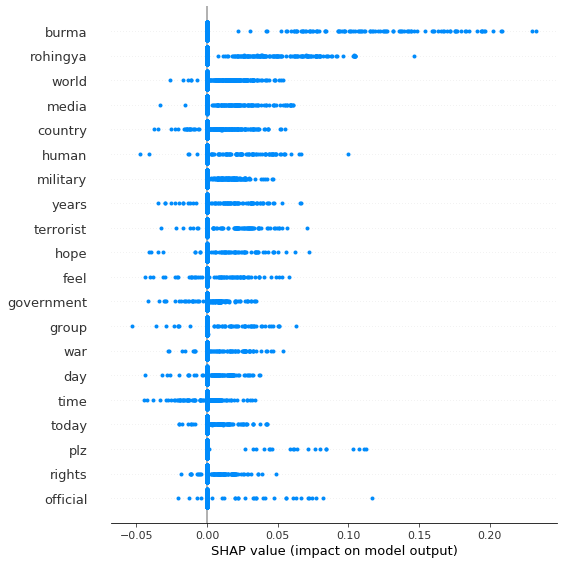

In [34]:
shap.summary_plot(shap_values_mmr, features=mmr_df.columns)

In [92]:
limit = 20
magnitude = np.abs(shap_values_mmr).sum(axis=0)
total = shap_values_mmr.sum(axis=0)
top_features = [(mmr_df.columns[i], magnitude[i], total[i], magnitude[i]-total[i]) for i in np.argsort(-magnitude)[:limit]]
print("Top:")
for feat, m, t, d in top_features:
    #print(f"{feat}\t\t{m:.3}\t{t:.3}\t{d:.3}")
    print(feat)
print()


Top:
burma
rohingya
world
media
country
human
military
years
terrorist
hope
feel
government
group
war
day
time
today
plz
rights
official



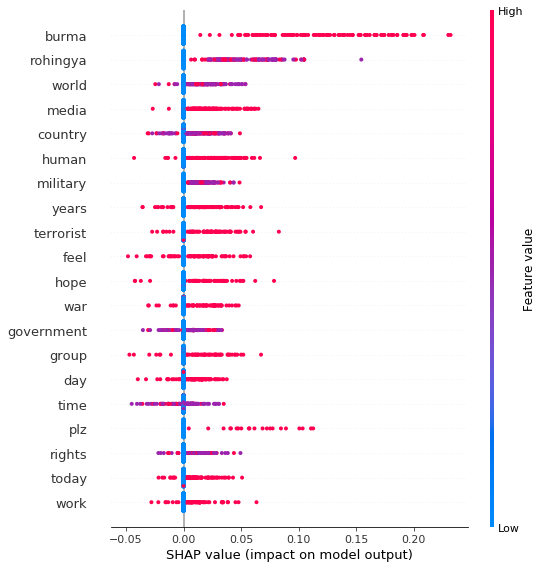

In [56]:
shap.summary_plot(shap_values_mmr, mmr_df, show=False)
plt.savefig('myanmar_all_1819', bbox_inches = "tight")

## Myanmar Tweets

In [128]:
mmr_wt = shap_value_to_weight_dict(shap_values_mmr, feature_names)

In [131]:
daterange = pd.date_range('2018-01-01', '2018-02-01')
for single_date in daterange:
    date = single_date.strftime("%Y_%m_%d")
    print('-'*70)
    print(date)
    rank_tweets('MM', date, mmr_wt, 3)

----------------------------------------------------------------------
2018_01_01
MM 2018_01_01

Top weighted tweets:

Islamic #Militants #Rohingya Refugees.

Bangladesh arrests suspected Islamist militant near Rohingya camps https://t.co/jd5Q9U3ROD via @ChannelNewsAsia 
 weight=0.061566781085089624, civil_unrest_score=0.8630669116973877

A group of Hindu  from Myanmar say. It' isn't  army, #Rohingya Muslims tortured them on 

Report: #BBC Bangla 
 17 October 2017
https://t.co/LVrYVfMm3q 
 weight=0.03509226324964594, civil_unrest_score=0.7963365316390991

Bangladeshi police arrested Muslim terrorists near Rohingya camp

https://t.co/dGlVP3QUVG 
 weight=0.03165204842610674, civil_unrest_score=0.5488756895065308

3
---------------------------------------------------------------------- 

----------------------------------------------------------------------
2018_01_02
MM 2018_01_02

Top weighted tweets:

Important article traces #ARSA Rohingya terrorists to Saudi-Pakistan through the worl

Four #Rohingya killed in #Bangladesh camp fire https://t.co/2ZYkgBbHeP 
 weight=0.030837294834412648, civil_unrest_score=0.6774575114250183

PRESS STATEMENT [13/01/2018]:

-Inn Din Mass Grave in # Moungdaw
-The Terrorist #Burmese Army had recently admitted its heinous crime first time ever in the history https://t.co/eBG1IoYZG6 
 weight=0.0015414201745529497, civil_unrest_score=0.5923601984977722

Myanmar's Suu Kyi says army admission on killings a positive step. https://t.co/eoh4lYMnxm 
 weight=0.0014359974056019893, civil_unrest_score=0.5011347532272339

3
---------------------------------------------------------------------- 

----------------------------------------------------------------------
2018_01_14
MM 2018_01_14

Top weighted tweets:

Sometime I hate myself but never stop to get the happy ending. Why?
Because so called " I'm Arkar " 
 weight=0.0024481772344545146, civil_unrest_score=0.565481960773468

The mainstream media is certainly ‘crazed’...... https://t.co/suGTcdGuPo 

When world fails, music speak https://t.co/makwvrlReK 
 weight=0.0010393089969064392, civil_unrest_score=0.5702439546585083

Richardson seeks to resolve Myanmar crisis, free journalists https://t.co/m8C6GwYXLa 
 weight=0.00012215167975276078, civil_unrest_score=0.9052325487136841

Can U change with Democracy &amp; weapons? https://t.co/N45etNyEjP 
 weight=7.23794401957735e-05, civil_unrest_score=0.5671564340591431

3
---------------------------------------------------------------------- 

----------------------------------------------------------------------
2018_01_27
MM 2018_01_27

Top weighted tweets:

veteran american diplomat did what #military and #buddhist hardliners want 
 weight=0.00012291888307411935, civil_unrest_score=0.5524117946624756

Tell me everyone is ok https://t.co/BjlA3f0jaJ 
 weight=0, civil_unrest_score=0.5830429196357727

Yangon | A saddening portait of inequality https://t.co/6QTm61p3yM 
 weight=0.0, civil_unrest_score=0.7691541910171509

3
--------------------

## Half positive half negative

In [96]:
len(test_df[test_df.COUNTRY=="MMR"]) / len(test_df)

0.023998136067101584

In [76]:
num_samples = 500
pos_df = test_df.loc[test_df['LABEL'] == 1].iloc[:,feat_index:].sample(int(num_samples/2))
neg_df = test_df.loc[test_df['LABEL'] == 0].iloc[:,feat_index:].sample(int(num_samples/2))
hh_df = pd.concat([pos_df, neg_df])

shap_values_hh = explainer.shap_values(hh_df, nsamples=hh_df.shape[0])

  0%|          | 0/500 [00:00<?, ?it/s]

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.12146625 0.06076179 0.04052698 ... 0.00022897 0.00022897 0.00022897]
INFO:shap:num_paired_subset_sizes = 1060
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 2121.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.11769445 0.05886857 0.03925995 ... 0.00017057 0.00017057 0.00017057]
INFO:shap:num_paired_subset_sizes = 1379
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 2759.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [0.         0.         0.00546913 ... 0.         0.         0.        ]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.2149495  0.109266   0.07407864 0.0565169  0.04600674 0.03902357
 0.03405693 0.03035167 0.0274883  0.02521523 0.02337241 0.0218532
 0.02058386 0.01951179 0.01859847 0.01781511 0.01713976 0.0

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.14957673 0.10179528 0.07797085 0.06373269 0.05429081 0.0475926
 0.04261198 0.03877915 0.03575249 0.03331482 0.03132162 0.02967312
 0.0282983  0.02714541 0.02617593 0.02536076 0.02467764 0.02410941
 0.02364277 0.02326749 0.02297574 0.02276168 0.02262117 0.02255157]
INFO:shap:num_paired_subset_sizes = 25
INFO:shap:weight_left = 0.7732932988609207
INFO:shap:np.sum(w_aug) = 51.00000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.02186881  0.00583696  0.          0.          0.
  0.         -0.02160381  0.          0.          0.          0.
  0.          0.01934704  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.      

INFO:shap:np.sum(w_aug) = 2357.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0.         0.00669515 0.         ... 0.         0.         0.        ]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.17436724 0.08767898 0.05878667 0.04434339 0.03567977 0.02990601
 0.02578363 0.02269338 0.02029126 0.01837083 0.01680076 0.01549347
 0.01438835 0.01344207 0.0126229  0.01190702 0.01127622 0.01071632
 0.01021615 0.00976677 0.00936093 0.00899272 0.00865722 0.00835038
 0.00806876 0.00780946 0.00757003 0.00734833 0.00714256 0.00695113
 0.00677266 0.00660595 0.00644995 0.00630372 0.00616643 0.00603736
 0.00591585 0.00580132 0.00569323 0.00559112 0.00549457 0.00540319
 0.00531662 0.00523457 0.00515673 0.00508284 0.00501267 0.00494599
 0.00488261 0.00482234 0.00476501 0.00471047 0.00465857 0.00460917
 0.00456216 0.00451742 0.00447484 0.00443434 0.00439581 0.00435918
 0.00432437 0.0042913  0.0042599  0.00423013 0.00420191 0.00417519
 0.00414993 0.004

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1423108  0.07126728 0.04758634 0.03574605 0.02864202 0.02390611
 0.02052343 0.0179865  0.01601342 0.01443503 0.01314368 0.01206762
 0.01115717 0.01037683 0.00970059 0.00910892 0.00858691 0.00812294
 0.00770785 0.0073343  0.00699637 0.0066892  0.00640876 0.00615174
 0.0059153  0.00569708 0.00549506 0.00530749 0.00513289 0.00496995
 0.00481756 0.00467471 0.00454054 0.0044143  0.00429528 0.00418291
 0.00407663 0.00397596 0.00388048 0.0037898  0.00370356 0.00362144
 0.00354317 0.00346847 0.00339711 0.00332888 0.00326356 0.00320099
 0.00314099 0.0030834  0.00302809 0.00297493 0.00292379 0.00287456
 0.00282713 0.00278142 0.00273732 0.00269477 0.00265367 0.00261396
 0.00257556 0.00253842 0.00250247 0.00246766 0.00243394 0.00240125
 0.00236955 0.0023388  0.00230896 0.00227998 0.00225183 0.00222448
 0.00219789 0.00217203 0.00214688 0.0021224  0.00209857 0.00207537
 0.00205276 0.00203073 0.00200926 0.00198833 0.00196791 0.0019

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.15804466 0.07927005 0.05301288 0.03988509 0.03200905 0.02675888
 0.02300923 0.0201974  0.01801079 0.01626183 0.01483117 0.01363924
 0.01263094 0.01176694 0.01101836 0.01036358 0.00978605 0.00927288
 0.00881392 0.00840105 0.00802767 0.0076884  0.0073788  0.00709516
 0.00683436 0.00659378 0.00637116 0.00616459 0.0059724  0.00579316
 0.00562562 0.00546867 0.00532137 0.00518285 0.00505238 0.00492927
 0.00481293 0.00470284 0.0045985  0.00449949 0.00440543 0.00431595
 0.00423074 0.00414952 0.004072   0.00399797 0.00392719 0.00385945
 0.00379459 0.00373242 0.00367279 0.00361555 0.00356057 0.00350772
 0.00345689 0.00340797 0.00336086 0.00331548 0.00327172 0.00322952
 0.0031888  0.00314948 0.0031115  0.0030748  0.00303932 0.00300501
 0.00297181 0.00293968 0.00290857 0.00287845 0.00284926 0.00282097
 0.00279354 0.00276695 0.00274115 0.00271613 0.00269184 0.00266826
 0.00264538 0.00262315 0.00260156 0.00258058 0.00256021 0.0025

INFO:shap:num_paired_subset_sizes = 361
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 722.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.          0.          0.         -0.03002466  0.
  0.          0.          0.          0.          0.          0.
  0.          0.00605206  0.          0.          0.          0.
  0.          0.01795458  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.00238241
  0.         -0.02204255  0.          0.          0.01067767  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.04535965  0.          0.          0.          0.02664526  0.
  0.          0.          

INFO:shap:num_paired_subset_sizes = 1481
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 2963.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.17038634 0.08561284 0.05735778 0.04323236 0.03475881 0.02911123
 0.02507851 0.02205509 0.01970454 0.01782503 0.0162881  0.01500812
 0.01392581 0.01299881 0.01219608 0.01149432 0.01087572 0.01032645
 0.00983554 0.00939427 0.00899555 0.00863359 0.00830359 0.00800157
 0.00772418 0.00746859 0.00723238 0.00701348 0.00681011 0.00662073
 0.00644398 0.00627869 0.00612382 0.00597847 0.00584182 0.00571315
 0.00559183 0.00547728 0.00536899 0.00526649 0.00516937 0.00507724
 0.00498978 0.00490666 0.00482761 0.00475237 0.00468069 0.00461237
 0.0045472  0.00448501 0.00442562 0.00436888 0.00431465 0.00426279
 0.00421319 0.00416573 0.0041203  0.0040768  0.00403515 0.00399527
 0.00395706 0.00392046 0.0038854  0.00385182 0.00381965 0.00378

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.16013877 0.0803436  0.05374646 0.04044884 0.03247105 0.02715316
 0.02335523 0.02050728 0.01829265 0.01652136 0.01507249 0.01386544
 0.01284442 0.01196956 0.01121163 0.01054871 0.00996404 0.00944458
 0.00898003 0.00856216 0.00818431 0.00784102 0.00752778 0.00724084
 0.00697705 0.00673373 0.00650862 0.00629977 0.00610549 0.00592433
 0.00575502 0.00559645 0.00544766 0.00530777 0.00517602 0.00505175
 0.00493434 0.00482326 0.00471802 0.00461818 0.00452335 0.00443317
 0.00434732 0.00426551 0.00418748 0.00411296 0.00404175 0.00397363
 0.00390843 0.00384596 0.00378606 0.0037286  0.00367343 0.00362042
 0.00356947 0.00352046 0.00347329 0.00342787 0.00338411 0.00334193
 0.00330125 0.003262   0.00322412 0.00318754 0.00315221 0.00311807
 0.00308506 0.00305314 0.00302226 0.00299239 0.00296347 0.00293548
 0.00290837 0.0028821  0.00285666 0.00283201 0.00280811 0.00278494
 0.00276248 0.00274069 0.00271957 0.00269907 0.00267919 0.0026

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.2156291  0.109582   0.07427225 0.05664832 0.04610001 0.03909066
 0.0341046  0.0303841  0.02750824 0.02522454 0.02337238 0.02184478
 0.0205677  0.01948834 0.01856806 0.01777793 0.01709591 0.01650494
 0.01599163 0.01554535 0.0151576  0.01482151 0.01453153 0.01428312
 0.01407264 0.01389709 0.01375412 0.01364184 0.01355883 0.01350404
 0.01347682]
INFO:shap:num_paired_subset_sizes = 31
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 63.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.00074793  0.03210141  0.00050321  0.
  0.          0.00141167  0.          0.          0.          0.
  0.          0.          0.          0.03189691  0.          0.
  0.          0.          0.          0.          0.0038149  -0.01470795
  0.          0.          0.          0.          0.          0.
  0.01127714  0.          0.          0.          0.04614132  0.
  0.          0

INFO:shap:num_paired_subset_sizes = 208
INFO:shap:weight_left = 1.0000000000000002
INFO:shap:np.sum(w_aug) = 418.0000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.01119333  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.02725013  0.          0.          0.          0.
  0.          0.01425502  0.          0.          0.00065632  0.
  0.          0.          0.          0.00879363  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.03073456  0.   

INFO:shap:num_paired_subset_sizes = 15
INFO:shap:weight_left = 0.74368134682094
INFO:shap:np.sum(w_aug) = 31.999999999999996
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.          0.          0.          0.         -0.0054514   0.
  0.          0.0213525   0.          0.          0.          0.
  0.02282999  0.          0.          0.          0.         -0.05130778
  0.          0.          0.          0.          0.          0.03010409
  0.          0.          0.          0.          0.          0.02501334
  0.          0.02112005]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14587687 0.07307451 0.0488074  0.0366741  0.02939433 0.02454132
 0.02107503 0.01847544 0.01645366 0.01483634 0.01351318 0.01241063
 0.01147778 0.01067828 0.00998545 0.0093793  0.00884452 0.00836922
 0.00794401 0.00756138 0.00721524 0.00690062 0.00661341 0.00635018
 0.00610806 0.00588461 0.00567775 0.00548571 0.00530695 0.00514015
 0.00498415 0.00483794 0

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14253552 0.0713807  0.04766267 0.03580384 0.02868868 0.02394536
 0.02055738 0.01801649 0.01604032 0.01445946 0.0131661  0.01208836
 0.01117648 0.01039493 0.00971763 0.00912505 0.00860222 0.00813753
 0.00772179 0.00734767 0.00700922 0.00670157 0.0064207  0.00616328
 0.00592648 0.00570792 0.00550559 0.00531774 0.00514287 0.00497968
 0.00482705 0.00468399 0.00454962 0.00442318 0.00430399 0.00419144
 0.004085   0.00398419 0.00388856 0.00379774 0.00371137 0.00362914
 0.00355075 0.00347594 0.00340448 0.00333614 0.00327073 0.00320806
 0.00314797 0.00309031 0.00303492 0.00298168 0.00293046 0.00288116
 0.00283367 0.00278789 0.00274374 0.00270112 0.00265997 0.0026202
 0.00258175 0.00254456 0.00250856 0.00247371 0.00243994 0.00240721
 0.00237547 0.00234468 0.00231479 0.00228578 0.00225759 0.00223021
 0.00220358 0.00217769 0.00215251 0.002128   0.00210414 0.00208091
 0.00205827 0.00203622 0.00201473 0.00199377 0.00197333 0.00195

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.19876383 0.13853237 0.10884686 0.09143136 0.08020295 0.07256457
 0.06722894 0.063494   0.06095424 0.05937102 0.05860985]
INFO:shap:num_paired_subset_sizes = 12
INFO:shap:weight_left = 0.7241318315431123
INFO:shap:np.sum(w_aug) = 24.999999999999993
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.03605385 0.         0.         0.         0.         0.
 0.        ]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.16403236 0.08234164 0.05511313 0.04150019 0.03333348 0.02788991
 0.02400242 0.02108749 0.01882095 0.01700827 0.0155257  0.0142907
 0.01324615 0.01235125 0.01157606 0.01089816 0.01030037 0.00976935
 0.00929456 0.00886756 0.00848154 0.00813091 0.00781106 0.00751815
 0.00724894 0.00700071 0.00677112 0.0065

INFO:shap:num_paired_subset_sizes = 150
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 302.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.00321045  0.          0.          0.          0.
  0.01519502  0.          0.          0.          0.         -0.01703067
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.01434387  0.          0.         -0.01498856  0.          0.
  0.          0.          0.          0.          0.00079171  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01957876  0.          0.
  0.          0.          0.          0.02650985  0.          0.
  0.          0.          0.          

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.15218296 0.07627982 0.0509794  0.03832966 0.0307402  0.02568087
 0.02206735 0.01935744 0.01724996 0.01556417 0.01418506 0.01303598
 0.01206383 0.0112307  0.0105088  0.00987726 0.00932014 0.00882504
 0.00838217 0.00798369 0.00762326 0.0072957  0.00699672 0.00672274
 0.00647077 0.00623827 0.00602307 0.00582333 0.00563744 0.00546402
 0.00530186 0.00514991 0.00500724 0.00487303 0.00474656 0.00462718
 0.00451433 0.00440747 0.00430616 0.00420998 0.00411855 0.00403153
 0.00394863 0.00386954 0.00379403 0.00372187 0.00365282 0.00358671
 0.00352336 0.00346259 0.00340426 0.00334822 0.00329436 0.00324253
 0.00319265 0.0031446  0.00309828 0.00305361 0.00301051 0.00296889
 0.00292868 0.00288982 0.00285224 0.00281589 0.00278069 0.00274662
 0.0027136  0.00268161 0.00265059 0.0026205  0.0025913  0.00256296
 0.00253544 0.00250871 0.00248274 0.0024575  0.00243296 0.00240909
 0.00238587 0.00236327 0.00234128 0.00231986 0.00229901 0.0022

INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.          0.         -0.0065026   0.          0.          0.
  0.         -0.01541764  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.00501196 -0.00915963  0.         -0.01520643  0.00029236  0.
  0.          0.          0.         -0.00412319  0.01417386  0.00698825
  0.         -0.00723168  0.         -0.01058135  0.00700995  0.
  0.          0.          0.02176359  0.         -0.01840139  0.
  0.          0.          0.00044153 -0.01300333  0.          0.01110289
  0.          0.          0.         -0.01940395  0.          0.
  0.          0.          0.          0.          0.          0.
  0.00892751  0.          0.          0.01702016  0.         -0.00373694
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00789134  0.          0.0137366   0.00568182
  0.          0.          0.          0.         

INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 486.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.00873428 -0.00882724  0.          0.          0.          0.01697282
  0.          0.          0.01031288  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.00981951  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.02118878  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.00756956
 -0.0

INFO:shap:num_paired_subset_sizes = 120
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 240.99999999999997
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.          0.          0.          0.         -0.01693308  0.
 -0.00765058  0.          0.          0.         -0.03663417  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00644502  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00063659  0.
  0.00949617  0.          0.          0.01781879  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00980785  0.          0.03913928  0.
  0.          0.          0.         -0.00193656  0.          0.
  0.          0.          0.          0.          0.         -0.00220789
  0.          0.          0.          0.          0.          0.
  0.03415875  0.         

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [1.12567038e-01 5.62973920e-02 3.75408480e-02 ... 1.10903647e-04
 1.10903539e-04 1.10903485e-04]
INFO:shap:num_paired_subset_sizes = 2029
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 4059.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.15218296 0.07627982 0.0509794  0.03832966 0.0307402  0.02568087
 0.02206735 0.01935744 0.01724996 0.01556417 0.01418506 0.01303598
 0.01206383 0.0112307  0.0105088  0.00987726 0.00932014 0.00882504
 0.00838217 0.00798369 0.00762326 0.0072957  0.00699672 0.00672274
 0.00647077 0.00623827 0.00602307 0.00582333 0.00563744 0.00546402
 0.00530186 0.00514991 0.00500724 0.00487303 0.00474656 0.00462718
 0.00451433 0.00440747 0.00430616 0.00420998 0.00411855 0.00403153
 0.00394863 0.00386954 0.00379403 0.00372187 0.00365282 0.00358671
 0.00352336 0.00346259 0.00340426

INFO:shap:num_paired_subset_sizes = 6
INFO:shap:weight_left = 0.6613591880578676
INFO:shap:np.sum(w_aug) = 14.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [0.00601424 0.01047467 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.16703511 0.0838871  0.05617329 0.04231805 0.03400625 0.02846619
 0.02451    0.02154373 0.01923743 0.01739311 0.01588478 0.01462846
 0.013566   0.01265586 0.0118676  0.01117835 0.01057066 0.01003094
 0.00954847 0.00911466 0.00872256 0.0083665  0.00804178 0.00774448
 0.00747132 0.00721953 0.00698673 0.00677089 0.00657026 0.00638333
 0.00620877 0.00604544 0.0058923  0.00574848 0.00561317 0.00548567
 0.00536536 0.00525166 0.00514407 0.00504215 0.00494548 0.00485368
 0.00476643 0.00468342 0.00460437 0.00452902 0.00445715 0.00438854
 0.00432299 0.00426033 0.0042004  0.00414303 0.00408808 0.00403544
 0

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.16094688 0.0807558  0.05402677 0.04066326 0.03264596 0.02730178
 0.02348511 0.02062312 0.0183976  0.01661762 0.01516166 0.01394873
 0.01292274 0.01204364 0.01128206 0.01061596 0.0100285  0.00950657
 0.00903983 0.00862    0.00824039 0.00789551 0.00758083 0.00729259
 0.0070276  0.0067832  0.0065571  0.00634733 0.00615221 0.00597027
 0.00580025 0.00564103 0.00549163 0.00535118 0.00521891 0.00509416
 0.0049763  0.00486481 0.00475918 0.00465899 0.00456383 0.00447335
 0.00438723 0.00430516 0.00422689 0.00415216 0.00408075 0.00401245
 0.00394708 0.00388446 0.00382443 0.00376684 0.00371156 0.00365847
 0.00360743 0.00355835 0.00351112 0.00346565 0.00342186 0.00337965
 0.00333895 0.0032997  0.00326182 0.00322525 0.00318994 0.00315582
 0.00312285 0.00309098 0.00306015 0.00303034 0.00300149 0.00297357
 0.00294654 0.00292037 0.00289502 0.00287047 0.00284668 0.00282363
 0.00280129 0.00277964 0.00275865 0.0027383  0.00271857 0.0026

INFO:shap:num_paired_subset_sizes = 286
INFO:shap:weight_left = 1.0000000000000002
INFO:shap:np.sum(w_aug) = 573.0000000000002
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.          0.          0.          0.0110331   0.
  0.          0.02201568  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.0092779   0.          0.         -0.00703916  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.00795244  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.00069051  0.00355483
  0.       

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.19513531 0.09858398 0.06641447 0.05034076 0.04070565 0.03429008
 0.02971448 0.02628906 0.02363062 0.02150923 0.01977861 0.01834121
 0.01712952 0.01609534 0.01520331 0.01442692 0.01374592 0.01314453
 0.01261034 0.01213341 0.01170571 0.01132065 0.01097283 0.01065773
 0.01037158 0.01011118 0.00987383 0.00965721 0.00945933 0.00927849
 0.0091132  0.00896218 0.0088243  0.00869859 0.00858418 0.00848034
 0.00838641 0.00830181 0.00822604 0.00815867 0.00809933 0.00804767
 0.00800344 0.00796638 0.00793632 0.0079131  0.00789659 0.00788672
 0.00788343]
INFO:shap:num_paired_subset_sizes = 48
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 97.99999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [-0.00460787  0.          0.          0.          0.          0.
  0.          0.         -0.00653233  0.          0.00177081  0.
  0.          0.          0.          0.          0.  

INFO:shap:num_paired_subset_sizes = 308
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 618.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
 -0.02712707  0.          0.          0.          0.          0.
  0.          0.00113077  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.00922509 -0.01627744  0.
  0.          0.          0.          0.          0.02345533  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.      

INFO:shap:num_paired_subset_sizes = 162
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 325.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.00610527  0.          0.          0.          0.
  0.          0.          0.00988474  0.          0.          0.
  0.          0.00777104  0.          0.          0.00645266  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.01672376  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00736517  0.          0.          0.
  0.          0.          0.          0.00937433  0.          0.
  0.         -0.01337725 -0.00794662  0.          0.          0.
  0.          0.00393703  0.          0.          0.          0.
  0.         -0.01151903  0.01252871  0.          0.          0.
  0.          0.          0.          0.          0.01334779  0.
  0.02331778  0.          0.          0.          0.         

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [1.11043645e-01 5.55339453e-02 3.70307155e-02 ... 9.69179354e-05
 9.69178800e-05 9.69178616e-05]
INFO:shap:num_paired_subset_sizes = 2290
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 4581.999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.16740521 0.08407461 0.05629997 0.04241432 0.0340843  0.02853211
 0.02456726 0.02159451 0.01928317 0.01743483 0.01592322 0.01466418
 0.01359942 0.01268732 0.01189735 0.01120663 0.01059764 0.01005677
 0.00957327 0.00913855 0.00874563 0.00838882 0.00806342 0.00776551
 0.0074918  0.00723949 0.00700622 0.00678995 0.00658892 0.00640162
 0.00622672 0.00606307 0.00590965 0.00576556 0.00563    0.00550227
 0.00538173 0.00526783 0.00516006 0.00505796 0.00496113 0.00486919
 0.0047818  0.00469866 0.00461948 0.00454403 0.00447205 0.00440335
 0.0043

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.20564142 0.10421018 0.07042514 0.05355245 0.04344537 0.03672168
 0.0319319  0.0283513  0.02557729 0.02336834 0.02157078 0.02008217
 0.01883163 0.01776856 0.01685585 0.01606574 0.01537698 0.01477309
 0.0142411  0.01377063 0.01335334 0.01298241 0.01265226 0.01235826
 0.01209655 0.01186393 0.01165768 0.01147553 0.01131556 0.01117616
 0.01105599 0.01095391 0.010869   0.01080049 0.01074781 0.01071049
 0.01068822 0.01068082]
INFO:shap:num_paired_subset_sizes = 37
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 76.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01040387  0.          0.
  0.          0.          0.00767068  0.          0.03049467  0.
  0.          0.          0.          0.          0.          0.
  0.          0.02834557  0.          0.          0.          0.
  0.      

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.18046767 0.12460863 0.09691782 0.08051634 0.06978083 0.06230431
 0.05688655 0.05286427 0.04984345 0.04757784 0.04590844 0.0447313
 0.04397952 0.04361302]
INFO:shap:num_paired_subset_sizes = 15
INFO:shap:weight_left = 0.7413425126365132
INFO:shap:np.sum(w_aug) = 30.999999999999996
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00304636 -0.02401826  0.00545226  0.01027699  0.00919294  0.
  0.          0.          0.          0.          0.          0.
  0.01897427  0.          0.00989644  0.          0.01504203  0.
  0.          0.01581781  0.0114239   0.          0.00101377  0.
  0.00115267  0.00811592  0.          0.00102452  0.00150316  0.
  0.        ]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.15063905 0.07549388 0.05044602 0.03792251 0.03040872 0.02539981
 0.02182225 0.01913929 0.01705273 0.01538366 0.01401821 0.01288047
 0.01191791 0.01109298 0.01037816 0

INFO:shap:remaining_weight_vector = [1.10735784e-01 5.53796827e-02 3.69276521e-02 ... 9.42633409e-05
 9.42632897e-05 9.42632726e-05]
INFO:shap:num_paired_subset_sizes = 2348
INFO:shap:weight_left = 1.0000000000000002
INFO:shap:np.sum(w_aug) = 4698.000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [1.11819055e-01 5.59225147e-02 3.72903386e-02 ... 1.03824698e-04
 1.03824609e-04 1.03824564e-04]
INFO:shap:num_paired_subset_sizes = 2153
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 4307.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.19876383 0.13853237 0.10884686 0.09143136 0.08020295 0.07256457
 0.06722894 0.063494   0.06095424 0.05937102 0.05860985]
INFO:shap:num_paired_subset_sizes = 12
INFO:shap:weight_left = 0.7241318315431123
INFO

INFO:shap:num_paired_subset_sizes = 931
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 1864.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.15781124 0.0791522  0.05293355 0.03982501 0.03196051 0.02671804
 0.02297388 0.02016617 0.01798275 0.01623635 0.01480778 0.01361758
 0.01261076 0.01174801 0.01100052 0.01034669 0.00976999 0.00925757
 0.00879927 0.00838699 0.00801414 0.00767536 0.00736621 0.00708297
 0.00682255 0.0065823  0.00636    0.00615372 0.0059618  0.00578281
 0.0056155  0.00545877 0.00531167 0.00517335 0.00504305 0.00492011
 0.00480393 0.00469398 0.00458978 0.0044909  0.00439696 0.0043076
 0.00422251 0.00414138 0.00406397 0.00399003 0.00391934 0.00385169
 0.0037869  0.00372481 0.00366525 0.00360808 0.00355316 0.00350037
 0.0034496  0.00340074 0.00335368 0.00330835 0.00326464 0.00322248
 0.0031818  0.00314252 0.00310458 0.00306791 0.003

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.19876383 0.13853237 0.10884686 0.09143136 0.08020295 0.07256457
 0.06722894 0.063494   0.06095424 0.05937102 0.05860985]
INFO:shap:num_paired_subset_sizes = 12
INFO:shap:weight_left = 0.7241318315431123
INFO:shap:np.sum(w_aug) = 24.999999999999996
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [0.         0.         0.         0.         0.         0.00710664
 0.         0.         0.         0.         0.         0.
 0.         0.0037287  0.00759235 0.         0.         0.
 0.02330392 0.         0.         0.         0.         0.0193078
 0.03259457]
INFO:shap:num_full_subsets = 3
INFO:shap:phi = [0. 0. 0. 0. 0. 0.]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1516702  0.07601783 0.05080097 0.03819298 0.03062854 0.02558589
 0.02198425 0.01928325 0.01718268 0.01550241 0.01412781 0.01298247
 0.01201348 0.01118306 0.01046348 0.00983398 0.00927865 0.00878513
 0.008343

INFO:shap:np.sum(w_aug) = 38.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.          0.          0.          0.          0.01091949  0.
  0.          0.03631412  0.          0.          0.          0.01828075
  0.02108886  0.         -0.01062565  0.         -0.01924597  0.
  0.          0.          0.02505443  0.          0.          0.
  0.03203208  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.11540529 0.05772034 0.03849204 ... 0.00014147 0.00014147 0.00014147]
INFO:shap:num_paired_subset_sizes = 1630
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 3262.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.13463607 0.06738905 0.04497347 0.03376576 0.02704119 0.0225582

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.11459395 0.0573135  0.03822003 ... 0.00013214 0.00013213 0.00013213]
INFO:shap:num_paired_subset_sizes = 1733
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 3468.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.20701126 0.14490788 0.11440096 0.09660526 0.08523993 0.07762922
 0.07245394 0.06900375 0.06688056 0.06586722]
INFO:shap:num_paired_subset_sizes = 11
INFO:shap:weight_left = 0.7167414131850209
INFO:shap:np.sum(w_aug) = 23.000000000000004
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [0.         0.         0.         0.         0.0171844  0.
 0.         0.         0.0612143  0.         0.         0.
 0.02637975 0.         0.         0.01885323 0.         0.02264992
 0.         0.         0.         0.         0.        ]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_we

INFO:shap:num_paired_subset_sizes = 335
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 671.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.17714453e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.77507064e-02
  0.00000000e+00  0.00000000e+00 -2.43255410e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.47505051e-02  0.00000000e+00  0.00000000e+

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.15783957 0.10792449 0.08307346 0.06825495 0.0584591  0.05153945
 0.0464234  0.04251571 0.03945989 0.03702981 0.03507546 0.03349381
 0.03221216 0.03117819 0.03035376 0.02971098 0.02922955 0.02889512
 0.0286981  0.02863303]
INFO:shap:num_paired_subset_sizes = 20
INFO:shap:weight_left = 0.761932110825895
INFO:shap:np.sum(w_aug) = 42.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.          0.          0.         -0.0070346   0.          0.
  0.          0.          0.          0.          0.          0.01987134
  0.          0.          0.          0.          0.          0.
  0.         -0.0123724   0.          0.01575891  0.          0.
  0.          0.          0.00961255  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
INFO:shap:num_full_subsets = 2
INFO:shap:remaining

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.17773432 0.08942961 0.05999949 0.04528807 0.0364642  0.03058415
 0.02638633 0.02323993 0.02079452 0.01883984 0.01724207 0.01591203
 0.01478794 0.01382571 0.01299299 0.01226552 0.01162475 0.01105624
 0.01054862 0.01009277 0.00968131 0.00930822 0.0089685  0.00865801
 0.00837326 0.0081113  0.00786961 0.00764604 0.00743874 0.00724609
 0.00706671 0.00689935 0.00674296 0.00659658 0.00645937 0.00633059
 0.00620957 0.00609572 0.00598851 0.00588745 0.00579212 0.00570213
 0.00561713 0.00553679 0.00546082 0.00538897 0.00532099 0.00525665
 0.00519576 0.00513814 0.0050836  0.00503201 0.00498321 0.00493706
 0.00489346 0.00485229 0.00481345 0.00477684 0.00474237 0.00470996
 0.00467954 0.00465105 0.00462441 0.00459957 0.00457648 0.00455509
 0.00453535 0.00451722 0.00450068 0.00448568 0.00447219 0.00446019
 0.00444965 0.00444057 0.0044329  0.00442665 0.00442181 0.00441835
 0.00441628 0.00441559]
INFO:shap:num_paired_subset_sizes = 79

INFO:shap:num_paired_subset_sizes = 712
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 1425.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [1.11275341e-01 5.56500426e-02 3.71082802e-02 ... 9.89115314e-05
 9.89114533e-05 9.89114142e-05]
INFO:shap:num_paired_subset_sizes = 2249
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 4499.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0.         0.         0.         ... 0.         0.01224908 0.        ]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.17893899 0.1237109  0.09635176 0.08016467 0.06958738 0.06223965
 0.05693513 0.05301896 0.05010292 0.04794537 0.04639159 0.04534201
 0.04473475 0.04453593]
INFO:shap:num_paired_subset_sizes = 14
INFO:shap:weight_left = 0.738876032213929
INFO:shap:np.sum(w_aug) = 30.000000000000007
INFO:shap:np.sum(self.kernelWeights) =

INFO:shap:num_paired_subset_sizes = 172
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 346.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.00286852  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.00953902  0.          0.          0.          0.          0.00824164
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0. 

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.16740521 0.08407461 0.05629997 0.04241432 0.0340843  0.02853211
 0.02456726 0.02159451 0.01928317 0.01743483 0.01592322 0.01466418
 0.01359942 0.01268732 0.01189735 0.01120663 0.01059764 0.01005677
 0.00957327 0.00913855 0.00874563 0.00838882 0.00806342 0.00776551
 0.0074918  0.00723949 0.00700622 0.00678995 0.00658892 0.00640162
 0.00622672 0.00606307 0.00590965 0.00576556 0.00563    0.00550227
 0.00538173 0.00526783 0.00516006 0.00505796 0.00496113 0.00486919
 0.0047818  0.00469866 0.00461948 0.00454403 0.00447205 0.00440335
 0.00433772 0.00427498 0.00421497 0.00415754 0.00410253 0.00404984
 0.00399932 0.00395087 0.00390439 0.00385978 0.00381695 0.00377581
 0.00373628 0.0036983  0.00366179 0.00362668 0.00359293 0.00356047
 0.00352925 0.00349922 0.00347033 0.00344255 0.00341582 0.00339011
 0.00336538 0.0033416  0.00331873 0.00329676 0.00327563 0.00325534
 0.00323585 0.00321714 0.00319919 0.00318197 0.00316546 0.0031

INFO:shap:num_paired_subset_sizes = 53
INFO:shap:weight_left = 1.0000000000000002
INFO:shap:np.sum(w_aug) = 108.00000000000003
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [0.         0.01635446 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00146117 0.
 0.         0.         0.00732088 0.01621627 0.         0.00051156
 0.         0.         0.         0.         0.00148912 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00562913 0.         0.         0.         0.
 0.         0.         0.         0.00172005 0.         0.
 0.         0.         0.         0.         0.         0.00854948
 0.02416257 0.         0.         0.         0.00392464 0.
 0.         0.0018338  0.         0.         0.01860047 0.
 0.00129717 0.         0.         0.         0.         0.0148154
 0.         0.         0

INFO:shap:num_paired_subset_sizes = 526
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 1053.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [1.11784210e-01 5.59050518e-02 3.72786698e-02 ... 1.03504031e-04
 1.03503942e-04 1.03503898e-04]
INFO:shap:num_paired_subset_sizes = 2159
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 4319.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.16797208 0.11527496 0.0890761  0.07348779 0.0632153  0.05599069
 0.05068123 0.04665891 0.04354832 0.04111205 0.03919349 0.03768604
 0.03651567 0.03563044 0.03499418 0.03458249 0.03438025]
INFO:shap:num_paired_subset_sizes = 18
INFO:shap:weight_left = 0.7537996877450106
INFO:shap:np.sum(w_aug) = 37.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.17067899 0.08576407 0.05746193 0.04331301 0.03482541 0.02916849
 0.02512912 0.02210074 0.01974637 0.01786381 0.01632441 0.01504239
 0.01395836 0.01302992 0.01222594 0.01152311 0.01090359 0.0103535
 0.00986189 0.00941999 0.00902071 0.00865825 0.00832782 0.00802541
 0.00774768 0.00749178 0.00725529 0.00703615 0.00683257 0.006643
 0.00646608 0.00630065 0.00614566 0.0060002  0.00586346 0.00573472
 0.00561334 0.00549875 0.00539042 0.00528791 0.00519078 0.00509866
 0.00501121 0.00492812 0.00484911 0.00477391 0.00470229 0.00463403
 0.00456893 0.00450682 0.00444752 0.00439088 0.00433675 0.00428501
 0.00423552 0.00418819 0.00414289 0.00409954 0.00405805 0.00401832
 0.00398028 0.00394385 0.00390897 0.00387558 0.00384361 0.003813
 0.00378371 0.00375568 0.00372887 0.00370324 0.00367874 0.00365534
 0.003633   0.00361169 0.00359137 0.00357202 0.00355361 0.00353612
 0.00351951 0.00350378 0.00348888 0.00347482 0.00346156 0.0034491
 

INFO:shap:num_paired_subset_sizes = 403
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 808.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.         -0.00186079  0.          0.00941725  0.          0.
  0.          0.01112683  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.00432216  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.01963026  0.          0.          0.          0.
  0.          0.          0.   

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.17773432 0.08942961 0.05999949 0.04528807 0.0364642  0.03058415
 0.02638633 0.02323993 0.02079452 0.01883984 0.01724207 0.01591203
 0.01478794 0.01382571 0.01299299 0.01226552 0.01162475 0.01105624
 0.01054862 0.01009277 0.00968131 0.00930822 0.0089685  0.00865801
 0.00837326 0.0081113  0.00786961 0.00764604 0.00743874 0.00724609
 0.00706671 0.00689935 0.00674296 0.00659658 0.00645937 0.00633059
 0.00620957 0.00609572 0.00598851 0.00588745 0.00579212 0.00570213
 0.00561713 0.00553679 0.00546082 0.00538897 0.00532099 0.00525665
 0.00519576 0.00513814 0.0050836  0.00503201 0.00498321 0.00493706
 0.00489346 0.00485229 0.00481345 0.00477684 0.00474237 0.00470996
 0.00467954 0.00465105 0.00462441 0.00459957 0.00457648 0.00455509
 0.00453535 0.00451722 0.00450068 0.00448568 0.00447219 0.00446019
 0.00444965 0.00444057 0.0044329  0.00442665 0.00442181 0.00441835
 0.00441628 0.00441559]
INFO:shap:num_paired_subset_sizes = 79

INFO:shap:num_paired_subset_sizes = 778
INFO:shap:weight_left = 1.0000000000000002
INFO:shap:np.sum(w_aug) = 1557.0000000000005
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.29254702 0.21453448 0.17877873 0.16090086 0.15323891]
INFO:shap:num_paired_subset_sizes = 6
INFO:shap:weight_left = 0.6508991990327944
INFO:shap:np.sum(w_aug) = 13.000000000000002
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.03243293]
INFO:shap:num_full_subsets = 2
INFO:shap:remaining_weight_vector = [0.36832413 0.32228361 0.30939227]
INFO:shap:num_paired_subset_sizes = 4
INFO:shap:weight_left = 0.3863094403142095
INFO:shap:phi = [-2.76052659e-18  1.29076480e-17  2.61991610e-17 -1.07661922e-17
 -3.61362608e-20  9.09993110e-02 -3.47015491e-17 -3.59969396e-17
  7.7

INFO:shap:num_paired_subset_sizes = 641
INFO:shap:weight_left = 0.9999999999999998
INFO:shap:np.sum(w_aug) = 1283.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.19358309 0.09775946 0.06583129 0.04987728 0.04031318 0.03394426
 0.02940134 0.02599986 0.02335949 0.02125206 0.01953236 0.0181036
 0.01689878 0.01587004 0.01498229 0.01420922 0.01353072 0.01293115
 0.01239816 0.01192189 0.01149435 0.01110903 0.01076054 0.01044439
 0.01015683 0.00989468 0.00965526 0.00943624 0.00923566 0.0090518
 0.00888319 0.00872852 0.00858669 0.0084567  0.00833769 0.00822891
 0.00812968 0.00803943 0.00795763 0.00788383 0.00781763 0.00775869
 0.0077067  0.0076614  0.00762257 0.00759002 0.00756359 0.00754317
 0.00752865 0.00751996 0.00751707]
INFO:shap:num_paired_subset_sizes = 50
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 102.0
INFO:shap:np.sum(self.kernelWeights)

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.14766565 0.10041264 0.07684641 0.0627579  0.05341098 0.04677608
 0.0418386  0.03803509 0.03502767 0.03260151 0.03061361 0.02896519
 0.02758589 0.02642438 0.02544239 0.02461094 0.02390777 0.02331563
 0.02282106 0.02241354 0.02208489 0.02182884 0.02164066 0.021517
 0.02145569]
INFO:shap:num_paired_subset_sizes = 26
INFO:shap:weight_left = 0.7754030634555391
INFO:shap:np.sum(w_aug) = 53.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00205449 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.04817079 0.02673511 0.         0.         0.
 0.         0.         0.         0.         0.0077583

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.16278246 0.08169953 0.05467345 0.04116159 0.03305544 0.02765215
 0.02379335 0.02089988 0.01864996 0.01685053 0.01537873 0.01415267
 0.01311564 0.01222714 0.01145746 0.01078434 0.01019073 0.00966339
 0.00919185 0.00876775 0.00838432 0.00803602 0.00771826 0.00742723
 0.00715973 0.00691304 0.00668485 0.00647319 0.00627635 0.00609285
 0.00592139 0.00576086 0.00561027 0.00546873 0.00533548 0.00520983
 0.00509115 0.00497892 0.00487263 0.00477183 0.00467614 0.00458518
 0.00449863 0.00441619 0.00433759 0.00426258 0.00419094 0.00412245
 0.00405693 0.0039942  0.00393409 0.00387647 0.00382118 0.00376811
 0.00371713 0.00366814 0.00362103 0.00357571 0.00353208 0.00349008
 0.00344961 0.00341061 0.003373   0.00333674 0.00330175 0.00326798
 0.00323538 0.0032039  0.0031735  0.00314412 0.00311573 0.0030883
 0.00306178 0.00303613 0.00301133 0.00298735 0.00296416 0.00294172
 0.00292001 0.00289902 0.0028787  0.00285905 0.00284004 0.00282

INFO:shap:weight_left = 0.6785433829783142
INFO:shap:np.sum(w_aug) = 15.999999999999998
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [0.         0.         0.01562667 0.0102907  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.02152225 0.         0.02845638]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [1.11880334e-01 5.59532309e-02 3.73108674e-02 ... 1.04439137e-04
 1.04439068e-04 1.04439046e-04]
INFO:shap:num_paired_subset_sizes = 2141
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 4284.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.13230704 0.06621478 0.04418409 0.03316881 0.02655969 0.02215364
 0.0190065  0.01664617 0.01481039 0.01334178 0.01214022 0.01113893
 0.01029171 0.00956554 0.0089362  0.00838555 0.00789969 0.00746783
 0.00708144 0.00673371 0.0064191  0.006133

INFO:shap:num_paired_subset_sizes = 747
INFO:shap:weight_left = 1.0000000000000002
INFO:shap:np.sum(w_aug) = 1496.0000000000005
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.11308003 0.05655453 0.03771269 ... 0.00011598 0.00011598 0.00011598]
INFO:shap:num_paired_subset_sizes = 1949
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 3899.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.21893793 0.11138947 0.07558572 0.05772    0.04703111 0.03993208
 0.03488571 0.03112353 0.02821867 0.0259151  0.02405    0.02251489
 0.02123478 0.02015619 0.01924    0.01845698 0.01778487 0.0172065
 0.01670842 0.01628    0.01591278 0.0156     0.01533623 0.01511714
 0.01493929 0.0148     0.01469722 0.01462949 0.01459586]
INFO:shap:num_paired_subset_sizes = 29
INFO:

INFO:shap:num_paired_subset_sizes = 928
INFO:shap:weight_left = 0.9999999999999998
INFO:shap:np.sum(w_aug) = 1856.9999999999995
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.19140945 0.0966076  0.06501845 0.04923272 0.03976857 0.03346538
 0.02896862 0.02560101 0.02298632 0.02089879 0.01919476 0.01777848
 0.01658365 0.01556293 0.01468159 0.01391359 0.01323905 0.01264248
 0.01211166 0.01163682 0.01121008 0.01082495 0.01047612 0.01015913
 0.00987027 0.00960638 0.0093648  0.00914322 0.00893968 0.00875248
 0.00858015 0.00842139 0.00827508 0.00814023 0.00801597 0.00790155
 0.00779627 0.00769955 0.00761086 0.00752971 0.0074557  0.00738846
 0.00732766 0.00727302 0.00722427 0.00718121 0.00714364 0.00711139
 0.00708433 0.00706235 0.00704534 0.00703325 0.00702601 0.0070236 ]
INFO:shap:num_paired_subset_sizes = 53
INFO:shap:weight_left = 1.0000000000000002
INFO:shap:np.sum(w_au

INFO:shap:num_paired_subset_sizes = 104
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 209.99999999999997
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [0.00664614 0.         0.         0.         0.         0.
 0.         0.00234799 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.02223074 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.0045906  0.         0.         0.00055774 0.00297125
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00736798 0.         0.         0.
 0.         0.         

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.214078   0.15111388 0.12041888 0.10275744 0.09174772 0.0846902
 0.08027925 0.07784655 0.07706808]
INFO:shap:num_paired_subset_sizes = 9
INFO:shap:weight_left = 0.7032951454518925
INFO:shap:np.sum(w_aug) = 19.999999999999996
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [0.         0.00757619 0.         0.         0.         0.
 0.         0.00980697 0.         0.         0.         0.
 0.         0.         0.00961198 0.         0.         0.
 0.         0.00315292]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.17814052 0.08964122 0.06014637 0.0454027  0.03655956 0.03066673
 0.02645985 0.02330672 0.02085612 0.01889734 0.01729627 0.01596351
 0.01483717 0.01387305 0.01303872 0.01230989 0.01166794 0.01109844
 0.01058995 0.01013336 0.00972126 0.00934761 0.00900743 0.00869654
 0.00841145 0.0081492  0.00790728 0.00768353 0.00747609 0.00728335
 0.0071039  0.00693652 0.00678014 0.00663379

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.18286679 0.09210079 0.061852   0.04673262 0.0376651  0.03162358
 0.02731127 0.02407979 0.0215689  0.01956249 0.01792302 0.0165588
 0.01540636 0.01442035 0.01356754 0.01282298 0.01216761 0.0115866
 0.01106825 0.0106032  0.01018386 0.00980405 0.00945863 0.00914334
 0.0088546  0.00858939 0.00834511 0.00811957 0.00791085 0.00771731
 0.00753752 0.00737022 0.0072143  0.0070688  0.00693286 0.00680572
 0.0066867  0.0065752  0.00647067 0.00637263 0.00628064 0.00619431
 0.00611328 0.00603723 0.00596587 0.00589893 0.00583617 0.00577738
 0.00572236 0.00567093 0.00562291 0.00557816 0.00553655 0.00549796
 0.00546225 0.00542935 0.00539915 0.00537157 0.00534653 0.00532397
 0.00530383 0.00528605 0.0052706  0.00525742 0.00524649 0.00523778
 0.00523126 0.00522693 0.00522477]
INFO:shap:num_paired_subset_sizes = 69
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 139.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0. 

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.21262269 0.1079469  0.07308905 0.05568689 0.04526806 0.0383418
 0.03341214 0.02973114 0.02688333 0.02461947 0.022781   0.02126227
 0.01999017 0.01891253 0.01799115 0.01719742 0.01650953 0.01591054
 0.01538717 0.01492883 0.01452702 0.01417485 0.0138667  0.01359796
 0.01336485 0.01316426 0.01299361 0.01285082 0.01273421 0.01264243
 0.01257446 0.01252955 0.01250722]
INFO:shap:num_paired_subset_sizes = 33
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 67.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.01644078
  0.00126707  0.          0.         -0.02553711  0.          0.
  0.          0.01487736  0.01341323  0.          0.          0.0006368
  0.02978639  0.03802988  0.          0.          0.          0.
  

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.17655648 0.08881652 0.05957427 0.04495651 0.0361886  0.03034565
 0.02617414 0.02304733 0.020617   0.01867424 0.01708611 0.01576397
 0.01464647 0.01368976 0.01286173 0.01213826 0.01150092 0.01093537
 0.0104303  0.00997665 0.0095671  0.00919565 0.00885735 0.00854807
 0.00826435 0.00800325 0.00776228 0.00753929 0.00733245 0.00714015
 0.00696101 0.0067938  0.00663746 0.00649105 0.00635372 0.00622475
 0.00610346 0.00598927 0.00588165 0.00578012 0.00568426 0.00559367
 0.005508   0.00542694 0.0053502  0.0052775  0.00520862 0.00514333
 0.00508143 0.00502273 0.00496706 0.00491427 0.00486422 0.00481677
 0.0047718  0.00472919 0.00468885 0.00465067 0.00461458 0.00458047
 0.00454829 0.00451796 0.00448942 0.00446259 0.00443744 0.00441391
 0.00439195 0.00437152 0.00435258 0.00433509 0.00431902 0.00430435
 0.00429103 0.00427906 0.0042684  0.00425904 0.00425096 0.00424415
 0.00423859 0.00423428 0.0042312  0.00422936 0.00422874]
INFO:

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.11601522 0.05802622 0.03869656 ... 0.00014874 0.00014874 0.00014874]
INFO:shap:num_paired_subset_sizes = 1559
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 3119.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.16831586 0.08454755 0.0566272  0.04266886 0.03429534 0.02871426
 0.02472887 0.0217408  0.01941762 0.01755988 0.01604064 0.0147753
 0.01370527 0.0127887  0.01199492 0.01130091 0.01068907 0.01014571
 0.00966002 0.00922337 0.00882875 0.00847044 0.00814371 0.00784462
 0.00756985 0.00731661 0.00708252 0.00686552 0.00666385 0.00647598
 0.00630059 0.00613652 0.00598273 0.00583832 0.0057025  0.00557456
 0.00545387 0.00533985 0.00523199 0.00512985 0.00503301 0.00494109
 0.00485376 0.00477071 0.00469166 0.00461635 0.00454455 0.00447605
 0.00441064 0.00434816 0.00428843 0.0042313  0.00417662 0.0

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14347043 0.07185418 0.04798236 0.03604665 0.02888538 0.02411133
 0.02070142 0.01814408 0.01615513 0.01456406 0.01326234 0.01217765
 0.01125989 0.01047331 0.00979165 0.00919526 0.00866908 0.00820141
 0.00778302 0.00740651 0.0070659  0.00675629 0.00647364 0.00621458
 0.00597629 0.00575635 0.00555274 0.00536371 0.00518775 0.00502354
 0.00486996 0.00472601 0.00459081 0.00446359 0.00434367 0.00423043
 0.00412334 0.00402191 0.00392571 0.00383434 0.00374745 0.00366473
 0.00358587 0.00351062 0.00343874 0.00337    0.00330421 0.00324118
 0.00318074 0.00312274 0.00306704 0.0030135  0.002962   0.00291242
 0.00286467 0.00281864 0.00277424 0.00273139 0.00269001 0.00265003
 0.00261138 0.002574   0.00253781 0.00250278 0.00246884 0.00243594
 0.00240404 0.0023731  0.00234307 0.00231392 0.0022856  0.00225808
 0.00223134 0.00220533 0.00218003 0.00215541 0.00213145 0.00210811
 0.00208539 0.00206324 0.00204166 0.00202062 0.0020001  0.0019

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.11281718 0.05642278 0.03762465 ... 0.00011341 0.00011341 0.00011341]
INFO:shap:num_paired_subset_sizes = 1988
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 3978.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.18313517 0.09225092 0.06196303 0.04682433 0.03774542 0.03169647
 0.02737901 0.0241438  0.02163014 0.01962163 0.01798054 0.01661509
 0.01546169 0.01447497 0.01362162 0.01287669 0.01222108 0.01163995
 0.01112157 0.01065657 0.01023737 0.00985775 0.0095126  0.00919764
 0.00890928 0.00864449 0.0084007  0.00817568 0.00796753 0.00777461
 0.00759547 0.00742886 0.00727368 0.00712896 0.00699385 0.00686757
 0.00674945 0.0066389  0.00653535 0.00643835 0.00634743 0.00626222
 0.00618236 0.00610752 0.00603742 0.0059718  0.00591041 0.00585304
 0.0057995  0.00574959 0.00570317 0.00566008 0.0056202  0.

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14450072 0.07237667 0.04833562 0.03631531 0.02910331 0.02429546
 0.0208614  0.01828598 0.01628297 0.01468066 0.01336976 0.01227742
 0.0113532  0.01056109 0.00987465 0.00927407 0.00874421 0.00827327
 0.00785196 0.00747283 0.00712985 0.00681809 0.00653349 0.00627265
 0.00603271 0.00581127 0.00560626 0.00541594 0.00523878 0.00507346
 0.00491884 0.00477392 0.00463782 0.00450974 0.00438902 0.00427504
 0.00416724 0.00406515 0.00396832 0.00387635 0.0037889  0.00370564
 0.00362628 0.00355055 0.00347822 0.00340905 0.00334284 0.00327942
 0.00321862 0.00316026 0.00310422 0.00305036 0.00299855 0.00294868
 0.00290065 0.00285435 0.0028097  0.0027666  0.00272499 0.00268479
 0.00264592 0.00260833 0.00257195 0.00253673 0.00250261 0.00246955
 0.00243748 0.00240639 0.00237621 0.00234691 0.00231845 0.00229081
 0.00226394 0.00223781 0.0022124  0.00218767 0.0021636  0.00214017
 0.00211735 0.00209511 0.00207345 0.00205232 0.00203173 0.0020

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [1.12015834e-01 5.60211388e-02 3.73562446e-02 ... 1.05700332e-04
 1.05700262e-04 1.05700238e-04]
INFO:shap:num_paired_subset_sizes = 2118
INFO:shap:weight_left = 1.0000000000000002
INFO:shap:np.sum(w_aug) = 4238.000000000002
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [1.10941754e-01 5.54828889e-02 3.69966040e-02 ... 9.60327478e-05
 9.60326938e-05 9.60326758e-05]
INFO:shap:num_paired_subset_sizes = 2309
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 4619.999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.29254702 0.21453448 0.17877873 0.16090086 0.15323891]
INFO:shap:num_paired_subset_sizes = 6
INFO:shap:weight_left = 0.6508991990327944
INFO:shap:np.su

INFO:shap:num_paired_subset_sizes = 131
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 264.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00013176 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00098422 0.         0.         0.
 0.         0.         0.         0.         0.00984944 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00864408 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.02272993
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00705355 0.01235274
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0096099  0.       

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.12364186 0.06185467 0.04125897 0.03096114 0.02478245 0.02066334
 0.01772113 0.01551448 0.01379821 0.01242519 0.01130183 0.01036569
 0.00957359 0.00889464 0.00830623 0.00779138 0.0073371  0.00693329
 0.006572   0.00624684 0.00595266 0.00568522 0.00544104 0.00521721
 0.00501129 0.00482121 0.00464522 0.0044818  0.00432965 0.00418765
 0.00405481 0.00393028 0.00381329 0.00370319 0.00359939 0.00350135
 0.00340862 0.00332076 0.00323742 0.00315824 0.00308293 0.00301121
 0.00294282 0.00287755 0.00281517 0.00275551 0.0026984  0.00264366
 0.00259116 0.00254076 0.00249234 0.00244578 0.00240098 0.00235784
 0.00231627 0.00227619 0.00223751 0.00220017 0.0021641  0.00212923
 0.00209551 0.00206287 0.00203128 0.00200067 0.001971   0.00194224
 0.00191433 0.00188725 0.00186095 0.0018354  0.00181058 0.00178644
 0.00176297 0.00174014 0.00171791 0.00169627 0.0016752  0.00165466
 0.00163465 0.00161513 0.0015961  0.00157754 0.00155942 0.0015

INFO:shap:num_paired_subset_sizes = 916
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 1834.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1903577  0.09603632 0.06460625 0.04889923 0.0394816  0.03320882
 0.02873324 0.02538103 0.02277784 0.02069909 0.01900184 0.01759081
 0.01640005 0.01538244 0.01450344 0.01373715 0.01306376 0.01246787
 0.01193732 0.0114624  0.01103523 0.01064938 0.01029955 0.0099813
 0.00969094 0.00942531 0.00918177 0.00895801 0.00875208 0.00856227
 0.00838712 0.00822533 0.00807578 0.00793748 0.00780955 0.00769122
 0.00758181 0.00748072 0.00738741 0.00730139 0.00722224 0.00714958
 0.00708308 0.00702242 0.00696734 0.00691761 0.00687301 0.00683335
 0.00679849 0.00676827 0.00674259 0.00672133 0.00670442 0.0066918
 0.00668341 0.00667922]
INFO:shap:num_paired_subset_sizes = 56
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 113.000000000000

INFO:shap:num_paired_subset_sizes = 106
INFO:shap:weight_left = 0.9999999999999997
INFO:shap:np.sum(w_aug) = 213.99999999999994
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.          0.         -0.02134996  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.00175408  0.0076143   0.00184481  0.          0.01407324
  0.          0.          0.          0.          0.          0.00681275
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.00647132
  0.00315988  0.          0.01602199  0.          0.          0.
  0.00492908  0.          0.          0.          0.0038865   0.00275214
  0.          0.00240465  0.          0.          0.          0.00928644
  0.          0.          0.          0.          0.          0.00697302
  0.          0.          0.          0.          0.          0.
  0.          0.03314319  0.       

INFO:shap:num_paired_subset_sizes = 80
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 162.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [0.         0.         0.         0.         0.         0.00889082
 0.         0.00773121 0.00117457 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00632566 0.         0.00288071 0.00071533
 0.         0.         0.01332989 0.         0.         0.0008247
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00519657 0.
 0.         0.         0.         0.00348657 0.         0.
 0.00845355 0.         0.         0.         0.         0.
 0.00194721 0.         0.         0.         0.         0.
 0.         0.         0.00129676 0.         0.         0.
 0.         0.         0.00217622 0.         0.00964322 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00268964 0.01457

INFO:shap:num_paired_subset_sizes = 143
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 288.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  9.12648683e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.49261309e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.38169442e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.34603864e-02 -4.50462723e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.39253672e-02  0.00000000e+00
  2.24528649e-03  6.57883662e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  7.05928253e-03  0.00000000e+00 -2.74477061e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.21406638e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.57256998e-02  6.82742084e-03  0.00000000e+

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.17158122 0.08623056 0.05778337 0.04356207 0.03503117 0.02934548
 0.02528565 0.02224201 0.01987584 0.01798391 0.01643691 0.01514861
 0.01405933 0.01312643 0.01231865 0.01161254 0.01099017 0.01043759
 0.0099438  0.00949998 0.009099   0.00873504 0.00840328 0.00809969
 0.00782091 0.00756408 0.00732678 0.00710691 0.00690269 0.00671256
 0.00653516 0.0063693  0.00621395 0.00606819 0.0059312  0.00580226
 0.00568073 0.00556602 0.00545763 0.00535508 0.00525796 0.00516589
 0.00507851 0.00499553 0.00491665 0.00484162 0.0047702  0.00470217
 0.00463733 0.0045755  0.00451651 0.0044602  0.00440644 0.00435508
 0.00430601 0.00425911 0.00421428 0.00417141 0.00413042 0.00409123
 0.00405375 0.00401791 0.00398364 0.00395088 0.00391957 0.00388965
 0.00386107 0.00383378 0.00380774 0.00378289 0.00375921 0.00373666
 0.00371519 0.00369478 0.0036754  0.00365702 0.0036396  0.00362313
 0.00360759 0.00359294 0.00357917 0.00356627 0.00355421 0.0035

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.16031627 0.08043454 0.05380857 0.04049656 0.03251013 0.0271865
 0.02338448 0.02053347 0.01831646 0.01654327 0.01509286 0.01388453
 0.01286243 0.01198665 0.01122793 0.01056432 0.00997904 0.00945905
 0.00899403 0.00857574 0.00819751 0.00785388 0.00754033 0.00725311
 0.00698907 0.00674552 0.0065202  0.00631115 0.0061167  0.00593537
 0.00576592 0.00560722 0.00545829 0.00531829 0.00518644 0.00506207
 0.00494457 0.00483341 0.00472809 0.00462818 0.00453328 0.00444305
 0.00435715 0.0042753  0.00419721 0.00412266 0.00405141 0.00398327
 0.00391803 0.00385554 0.00379563 0.00373814 0.00368296 0.00362994
 0.00357898 0.00352997 0.00348279 0.00343737 0.00339362 0.00335144
 0.00331077 0.00327153 0.00323366 0.0031971  0.00316178 0.00312765
 0.00309466 0.00306276 0.00303191 0.00300206 0.00297317 0.0029452
 0.00291812 0.00289189 0.00286648 0.00284186 0.002818   0.00279487
 0.00277245 0.00275071 0.00272963 0.00270918 0.00268934 0.002670

INFO:shap:num_paired_subset_sizes = 399
INFO:shap:weight_left = 0.9999999999999998
INFO:shap:np.sum(w_aug) = 798.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.02355322  0.          0.
  0.          0.00576455 -0.02013265 -0.01312055  0.          0.
  0.          0.          0.          0.          0.         -0.0274679
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.046895    0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.01240332  0.          0.         -0.00664646
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.25971314 0.18888229 0.15582789 0.13851368 0.12985657 0.12720644]
INFO:shap:num_paired_subset_sizes = 6
INFO:shap:weight_left = 0.6613591880578676
INFO:shap:np.sum(w_aug) = 13.999999999999996
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [0.         0.         0.         0.         0.         0.05838528
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.26462738 0.19111977 0.15637072 0.13760624 0.12741318 0.12286271]
INFO:shap:num_paired_subset_sizes = 7
INFO:shap:weight_left = 0.670488071941304
INFO:shap:np.sum(w_aug) = 15.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.120495   0.06027414 0.04020053 ... 0.0002128  0.00021279 0.00021279]
INFO:shap:num_paired_subset_sizes = 1131
INFO:shap:weight_left = 0.99999

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.29254702 0.21453448 0.17877873 0.16090086 0.15323891]
INFO:shap:num_paired_subset_sizes = 6
INFO:shap:weight_left = 0.6508991990327944
INFO:shap:np.sum(w_aug) = 13.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [0.         0.         0.         0.         0.04109376 0.02979015
 0.         0.         0.         0.05112368 0.         0.
 0.        ]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.18046767 0.12460863 0.09691782 0.08051634 0.06978083 0.06230431
 0.05688655 0.05286427 0.04984345 0.04757784 0.04590844 0.0447313
 0.04397952 0.04361302]
INFO:shap:num_paired_subset_sizes = 15
INFO:shap:weight_left = 0.7413425126365132
INFO:shap:np.sum(w_aug) = 30.999999999999996
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.014693    0.          0.00359418  0.          0.00349623  0.
  0.         -0.00371071  0.          0.          0.         

INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-2.77555756e-17 -2.77555756e-17]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.17443519 0.12030013 0.09344742 0.07752675 0.06709046 0.05980635
 0.054511   0.05056092 0.04757323 0.04530784 0.0436088  0.04237292
 0.04153219 0.04104357 0.04088325]
INFO:shap:num_paired_subset_sizes = 15
INFO:shap:weight_left = 0.74368134682094
INFO:shap:np.sum(w_aug) = 32.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [0.         0.         0.         0.         0.         0.
 0.         0.00859836 0.         0.         0.04521896 0.
 0.00699441 0.         0.01005532 0.         0.02070918 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01144857 0.        ]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.2028439  0.10267407 0.069305   0.05263671 0.04264923 0.0360026
 0.03126541 0.027722   0.02497477 0.0227852  0

INFO:shap:num_paired_subset_sizes = 471
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 943.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.00865968
  0.0063657   0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.01935457  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.01659865  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.01389886  0.          0.00588765 -0.02787171  0.
  0.0074580

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.18263611 0.09198951 0.06178061 0.04668125 0.03762579 0.03159236
 0.02728588 0.0240588  0.02155138 0.01954777 0.01791063 0.01654838
 0.01539763 0.0144131  0.0135616  0.01281821 0.0121639  0.01158386
 0.01106641 0.01060218 0.01018362 0.00980452 0.00945979 0.00914516
 0.00885704 0.00859243 0.00834873 0.00812375 0.00791558 0.00772258
 0.00754331 0.00737652 0.00722111 0.00707612 0.00694068 0.00681404
 0.00669552 0.00658451 0.00648048 0.00638295 0.00629146 0.00620564
 0.00612513 0.0060496  0.00597877 0.00591237 0.00585016 0.00579193
 0.00573748 0.00568662 0.0056392  0.00559507 0.00555408 0.00551613
 0.00548108 0.00544886 0.00541935 0.00539249 0.00536819 0.0053464
 0.00532705 0.00531009 0.00529548 0.00528318 0.00527316 0.00526539
 0.00525986 0.00525654 0.00525544]
INFO:shap:num_paired_subset_sizes = 68
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 138.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.17582258 0.12112222 0.09397414 0.07786429 0.06729012 0.0598956
 0.054505   0.05046759 0.04739565 0.04504545 0.04325794 0.04192692
 0.0409812  0.04037407 0.04007721]
INFO:shap:num_paired_subset_sizes = 16
INFO:shap:weight_left = 0.7459033581807454
INFO:shap:np.sum(w_aug) = 33.000000000000014
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [0.00873383 0.01001785 0.         0.         0.01146336 0.
 0.         0.         0.         0.         0.         0.
 0.02230505 0.0250897  0.         0.         0.         0.
 0.00060569 0.         0.         0.         0.00571091 0.01138254
 0.         0.         0.         0.00110659 0.         0.
 0.         0.01725195 0.01849914]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.11460531 0.05731919 0.03822383 ... 0.00013219 0.00013219 0.00013219]
INFO:shap:num_paired_subset_sizes = 1733
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 3467.0


INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.21344041 0.1084415  0.07347948 0.05602811 0.04558219 0.03864007
 0.03370112 0.03001506 0.02716514 0.02490138 0.02306474 0.02154927
 0.02028167 0.01920964 0.01829489 0.01750878 0.01682947 0.01624003
 0.01572719 0.01528039 0.01489119 0.01455276 0.01425954 0.01400703
 0.01379153 0.01361007 0.01346021 0.01334003 0.01324803 0.01318308
 0.01314442 0.01313159]
INFO:shap:num_paired_subset_sizes = 31
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 64.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 1.40690905e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.38969253e-03  2.47946117e-02  0.00000000e+00  4.07707989e-03
  2.12360896e-02  2.33674947e-03  6.68532160e-03  0.00000000e+00
  0.00000000e+00  2.32735903e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.98611713e-03  0.00000000e+00
  0.00000000e+00  7.91515523e-03  0.00000000e+00  2.44038356e-03
  0.00000000

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.20136745 0.10191157 0.06877983 0.05222968 0.04231265 0.0357126
 0.03100835 0.02748931 0.02476074 0.02258581 0.02081382 0.01934433
 0.0181078  0.01705459 0.01614831 0.01536167 0.01467384 0.0140686
 0.0135332  0.01305742 0.01263303 0.0122533  0.01191269 0.0116066
 0.01133119 0.01108322 0.01085997 0.01065912 0.01047868 0.01031697
 0.01017255 0.01004417 0.00993078 0.00983147 0.00974548 0.00967216
 0.00961098 0.0095615  0.00952336 0.00949631 0.00948015 0.00947477]
INFO:shap:num_paired_subset_sizes = 41
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 84.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.00284423  0.          0.
  0.          0.          0.00434834  0.          0.          0.00330658
  0.          0.01206073  0.01306535  0.          0.          0.04131339
  0.          0.          0.          0.00274527  0.          0.
  0.00297632  0.          0.     

INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 426.99999999999994
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.009854    0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.00917927
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.16797208 0.11527496 0.0890761  0.07348779 0.0632153  0.05599069
 0.05068123 0.04665891 0.04354832 0.04111205 0.03919349 0.03768604
 0.03651567 0.03563044 0.03499418 0.03458249 0.03438025]
INFO:shap:num_paired_subset_sizes = 18
INFO:shap:weight_left = 0.7537996877450106
INFO:shap:np.sum(w_aug) = 37.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.00365775
  0.          0.          0.01615182  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.02796629  0.          0.          0.
  0.          0.00815783  0.          0.          0.          0.
 -0.02383616  0.          0.00463917  0.          0.01209689  0.00360569
  0.        ]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.21061943 0.10690532 0.07236668 0.05512305 0.04479842 0.03793415
 0.03304801 0.02

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.17443519 0.12030013 0.09344742 0.07752675 0.06709046 0.05980635
 0.054511   0.05056092 0.04757323 0.04530784 0.0436088  0.04237292
 0.04153219 0.04104357 0.04088325]
INFO:shap:num_paired_subset_sizes = 15
INFO:shap:weight_left = 0.74368134682094
INFO:shap:np.sum(w_aug) = 32.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.04685121
 0.         0.         0.         0.00139011 0.         0.
 0.         0.         0.         0.         0.00634797 0.
 0.         0.01414958]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1907224  0.09624418 0.06476244 0.04903005 0.0395976  0.03331529
 0.02883321 0.0254764  0.0228699  0.02078874 0.01908975 0.0176775
 0.01648592 0.01546781 0.01458859 0.0138223  0.01314

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.12231991 0.06119052 0.04081408 ... 0.00024415 0.00024415 0.00024415]
INFO:shap:num_paired_subset_sizes = 1001
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 2002.9999999999995
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.21893793 0.11138947 0.07558572 0.05772    0.04703111 0.03993208
 0.03488571 0.03112353 0.02821867 0.0259151  0.02405    0.02251489
 0.02123478 0.02015619 0.01924    0.01845698 0.01778487 0.0172065
 0.01670842 0.01628    0.01591278 0.0156     0.01533623 0.01511714
 0.01493929 0.0148     0.01469722 0.01462949 0.01459586]
INFO:shap:num_paired_subset_sizes = 29
INFO:shap:weight_left = 1.0000000000000002
INFO:shap:np.sum(w_aug) = 59.000000000000014
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [0.         0.         0.         0.      

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.19513531 0.09858398 0.06641447 0.05034076 0.04070565 0.03429008
 0.02971448 0.02628906 0.02363062 0.02150923 0.01977861 0.01834121
 0.01712952 0.01609534 0.01520331 0.01442692 0.01374592 0.01314453
 0.01261034 0.01213341 0.01170571 0.01132065 0.01097283 0.01065773
 0.01037158 0.01011118 0.00987383 0.00965721 0.00945933 0.00927849
 0.0091132  0.00896218 0.0088243  0.00869859 0.00858418 0.00848034
 0.00838641 0.00830181 0.00822604 0.00815867 0.00809933 0.00804767
 0.00800344 0.00796638 0.00793632 0.0079131  0.00789659 0.00788672
 0.00788343]
INFO:shap:num_paired_subset_sizes = 48
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 97.99999999999997
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.71897023e-02
  2.40891393e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.18403604 0.12759832 0.09968619 0.0832163  0.07249905 0.06510118
 0.05981171 0.05596418 0.05316597 0.0511758  0.04984309 0.04907628
 0.04882589]
INFO:shap:num_paired_subset_sizes = 13
INFO:shap:weight_left = 0.7335092992693836
INFO:shap:np.sum(w_aug) = 28.000000000000004
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.2149495  0.109266   0.07407864 0.0565169  0.04600674 0.03902357
 0.03405693 0.03035167 0.0274883  0.02521523 0.02337241 0.0218532
 0.02058386 0.01951179 0.01859847 0.01781511 0.01713976 0.01655545
 0.01604886 0.01560943 0.01522871 0.01489991 0.01461752 0.01437711
 0.01417505 0.01400846 0.01387505 0.01377302 0.01370107 0.01365825
 0.01364404]
INFO:shap:num_paired_subset_sizes = 30
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 62.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [ 0.          0

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.18876244 0.09520913 0.06403446 0.04845464 0.03911294 0.03289043
 0.02845043 0.02512463 0.02254172 0.02047894 0.01879453 0.01739397
 0.01621186 0.01520146 0.0143285  0.0135673  0.01289821 0.01230594
 0.01177845 0.01130608 0.01088104 0.01049694 0.01014852 0.00983138
 0.00954184 0.00927679 0.00903358 0.00880994 0.00860392 0.00841383
 0.00823821 0.00807577 0.0079254  0.00778611 0.00765703 0.00753739
 0.00742651 0.00732378 0.00722866 0.00714068 0.00705941 0.00698445
 0.00691548 0.00685217 0.00679427 0.00674152 0.0066937  0.00665064
 0.00661215 0.00657809 0.00654832 0.00652274 0.00650125 0.00648378
 0.00647025 0.00646062 0.00645486 0.00645294]
INFO:shap:num_paired_subset_sizes = 57
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 116.00000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.01307878  0.          0.          0.          0.
  0.          0.          0.          0.        

INFO:shap:num_paired_subset_sizes = 496
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 993.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.         -0.01438523  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.01080808  0.          0.          0.         -0.01969672
  0.          0.         -0.01219506  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.00767988  0.          0.          

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.15086343 0.10281063 0.07886043 0.06455551 0.05507712 0.0483604
 0.04337324 0.03954255 0.03652483 0.03410181 0.03212832 0.03050425
 0.02915848 0.02803926 0.02710827 0.02633669 0.02570266 0.02518954
 0.02478471 0.02447872 0.02426475 0.02413815 0.02409624]
INFO:shap:num_paired_subset_sizes = 23
INFO:shap:weight_left = 0.7698772157308994
INFO:shap:np.sum(w_aug) = 47.99999999999998
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999994
INFO:shap:phi = [ 0.          0.          0.         -0.01035938  0.          0.
  0.00194135  0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.01508129  0.
  0.          0.          0.          0.          0.          0.00418115
  0.          0.00635478  0.          0.00386784 -0.0082576   0.
  0.          0.          0.          0.          0.          0.01050807
  0.          0.          0.04771912  0.          0.          0.007028

INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.0151716   0.          0.          0.          0.          0.
  0.01401817  0.          0.00716225  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.01942902  0.02006303 -0.01793244 -0.01563659  0.
  0.          0.          0.          0.02048767  0.          0.
  0.          0.          0.          0.          0.         -0.01478642
  0.         -0.02139144  0.          0.          0.          0.
  0.         -0.02014387  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.00506355  0.          0.          0.
  0.          0.          0.         -0.01545779  0.          0.
  0.          0.          0.          0.01404447  0.          0.
  0.          0.          0.          0.01382874  0.          0.
 

INFO:shap:num_full_subsets = 2
INFO:shap:remaining_weight_vector = [0.29716105 0.25072964 0.22923852 0.22287079]
INFO:shap:num_paired_subset_sizes = 5
INFO:shap:weight_left = 0.4400735865059551
INFO:shap:np.sum(w_aug) = 12.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.048037]
INFO:shap:num_full_subsets = 1
INFO:shap:phi = [-5.50774704e-17  3.02777324e-03 -5.50774704e-17]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.17443519 0.12030013 0.09344742 0.07752675 0.06709046 0.05980635
 0.054511   0.05056092 0.04757323 0.04530784 0.0436088  0.04237292
 0.04153219 0.04104357 0.04088325]
INFO:shap:num_paired_subset_sizes = 15
INFO:shap:weight_left = 0.74368134682094
INFO:shap:np.sum(w_aug) = 32.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.         -0.03893311  0.          0.          0.          0.00254361
  0. 

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.18337037 0.09236434 0.06203575 0.04687664 0.03778541 0.03172821
 0.0274048  0.02416509 0.02164789 0.01963651 0.01799305 0.01662558
 0.01547045 0.01448221 0.01362753 0.01288139 0.01222469 0.01164256
 0.01112327 0.01065742 0.01023743 0.00985706 0.0095112  0.00919556
 0.00890656 0.00864115 0.00839676 0.00817116 0.00796244 0.00776896
 0.00758928 0.00742213 0.00726643 0.00712118 0.00698554 0.00685874
 0.0067401  0.00662902 0.00652495 0.00642742 0.00633597 0.00625022
 0.00616981 0.00609442 0.00602376 0.00595757 0.0058956  0.00583763
 0.00578348 0.00573296 0.0056859  0.00564217 0.00560161 0.00556412
 0.00552957 0.00549788 0.00546894 0.00544268 0.00541903 0.00539792
 0.00537929 0.00536309 0.00534929 0.00533784 0.00532871 0.00532189
 0.00531735 0.00531508]
INFO:shap:num_paired_subset_sizes = 68
INFO:shap:weight_left = 0.9999999999999998
INFO:shap:np.sum(w_aug) = 136.99999999999994
INFO:shap:np.sum(self.kernelWeights) = 0.9999

INFO:shap:num_paired_subset_sizes = 300
INFO:shap:weight_left = 0.9999999999999998
INFO:shap:np.sum(w_aug) = 601.9999999999998
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.          0.         -0.01609219  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.00554217  0.01086436  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.00503169  0.          0.
 -0.01189027  0.          0.          0.          0.          0.
  0.          0.         -0.01587268  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.0093012   0.          0.          0.          0.00245178  0.
 -0.02177753  0.   

INFO:shap:num_full_subsets = 2
INFO:shap:remaining_weight_vector = [0.37634409 0.32258065 0.30107527]
INFO:shap:num_paired_subset_sizes = 5
INFO:shap:weight_left = 0.41579731743666165
INFO:shap:phi = [ 1.21430643e-17  1.02907041e-02 -8.67361738e-19 -6.93889390e-18
 -1.73472348e-18  4.80482482e-03  1.04083409e-17  8.67361738e-19
 -6.93889390e-18  2.48034183e-02  4.16333634e-17]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.17168588 0.11803404 0.09138119 0.07554179 0.06512223 0.05781259
 0.05245957 0.04842422 0.04532507 0.04292147 0.04105532 0.03961982
 0.03854173 0.03777089 0.03727391 0.03703029]
INFO:shap:num_paired_subset_sizes = 17
INFO:shap:weight_left = 0.7500341733194282
INFO:shap:np.sum(w_aug) = 35.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.          0.          0.          0.01000944  0.          0.03403137
  0.         -0.02133699  0.          0.          0.          0.02429908
  0.00445658  0.          0.          0.

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.15301406 0.10438169 0.08015022 0.06568408 0.05610516 0.04932321
 0.04429354 0.04043615 0.03740344 0.03497464 0.03300303 0.0313875
 0.03005633 0.0289575  0.02805258 0.02731285 0.02671674 0.02624803
 0.02589469 0.02564807 0.02550234 0.02545414]
INFO:shap:num_paired_subset_sizes = 22
INFO:shap:weight_left = 0.7674097178519277
INFO:shap:np.sum(w_aug) = 46.000000000000014
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0.         0.         0.         0.         0.         0.
 0.         0.         0.00693648 0.         0.         0.
 0.00084759 0.         0.         0.01212757 0.         0.
 0.02513389 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.03181074
 0.         0.         0.00578492 0.00129883]
INFO:shap:num_full_

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.18842485 0.09501766 0.06389118 0.04833507 0.03900725 0.0327937
 0.02835986 0.02503844 0.02245872 0.02039829 0.0187156  0.0173163
 0.01613507 0.01512526 0.01425265 0.01349158 0.01282245 0.01223
 0.01170217 0.01122936 0.01080376 0.01041899 0.01006981 0.00975181
 0.00946133 0.00919526 0.00895094 0.00872611 0.00851882 0.00832739
 0.00815034 0.0079864  0.00783444 0.00769347 0.00756263 0.00744114
 0.00732832 0.00722356 0.00712632 0.00703612 0.00695251 0.00687512
 0.00680359 0.00673762 0.00667692 0.00662124 0.00657037 0.0065241
 0.00648225 0.00644468 0.00641123 0.00638178 0.00635624 0.00633451
 0.00631651 0.00630219 0.00629149 0.00628438 0.00628083]
INFO:shap:num_paired_subset_sizes = 59
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 119.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.0047378   0.          0.          0.00281288 -0.0098949
  0.          0.          0.00861537  0.         

INFO:shap:num_full_subsets = 2
INFO:shap:phi = [1.11022302e-17 1.11022302e-17 1.11022302e-17 1.11022302e-17
 2.34901616e-02]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.18237329 0.09184266 0.06167213 0.04659172 0.03754744 0.03152131
 0.02721989 0.02399649 0.0214918  0.01949028 0.01785473 0.01649371
 0.01534391 0.0143601  0.01350913 0.01276613 0.01211208 0.01153219
 0.01101478 0.01055052 0.01013185 0.00975258 0.00940761 0.00909269
 0.00880423 0.00853922 0.00829508 0.00806961 0.00786092 0.00766735
 0.00748747 0.00732003 0.00716393 0.00701821 0.00688201 0.00675457
 0.0066352  0.00652332 0.00641837 0.00631987 0.00622738 0.00614051
 0.00605891 0.00598225 0.00591025 0.00584262 0.00577914 0.00571959
 0.00566377 0.00561149 0.00556258 0.00551691 0.00547433 0.00543471
 0.00539794 0.00536392 0.00533255 0.00530375 0.00527744 0.00525355
 0.00523202 0.00521279 0.00519582 0.00518106 0.00516847 0.00515803
 0.00514971 0.00514349 0.00513934 0.00513728]
INFO:shap:num_paired_subs

INFO:shap:num_paired_subset_sizes = 228
INFO:shap:weight_left = 1.0000000000000002
INFO:shap:np.sum(w_aug) = 457.0000000000001
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.01380853
  0.          0.          0.          0.          0.         -0.01947708
  0.          0.00237462  0.          0.          0.         -0.02782796
  0.          0.          0.          0.          0.          0.
  0.          0.0172141   0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.01144153  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.02560033  0.          0.
 -0.00537431  0.          0.          0.          0.        

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.17024894 0.08554588 0.05731432 0.04320067 0.0347342  0.02909136
 0.02506203 0.02204116 0.01969261 0.01781471 0.0162791  0.01500023
 0.01391886 0.01299268 0.01219066 0.01148954 0.01087151 0.01032274
 0.0098323  0.00939145 0.00899311 0.0086315  0.00830183 0.00800012
 0.00772302 0.0074677  0.00723175 0.0070131  0.00680996 0.00662079
 0.00644425 0.00627917 0.0061245  0.00597933 0.00584286 0.00571437
 0.00559322 0.00547884 0.00537071 0.00526837 0.00517141 0.00507944
 0.00499213 0.00490917 0.00483026 0.00475516 0.00468363 0.00461546
 0.00455043 0.00448838 0.00442913 0.00437254 0.00431845 0.00426673
 0.00421727 0.00416995 0.00412466 0.00408131 0.00403981 0.00400006
 0.003962   0.00392555 0.00389064 0.0038572  0.00382518 0.00379453
 0.00376517 0.00373708 0.0037102  0.00368449 0.00365991 0.00363642
 0.00361398 0.00359257 0.00357215 0.00355269 0.00353416 0.00351654
 0.0034998  0.00348392 0.00346889 0.00345467 0.00344126 0.0034

INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 436.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.         -0.0049601   0.          0.0150301   0.         -0.01289795
  0.00614849  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00861691  0.
  0.          0.          0.          0.          0.          0.
 -0.01212821  0.          0.          0.          0.          0.
 -0.00450995  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.01982267  0.          0.          0.
  0.          0.          0.          0.01548305  0.          0.
  0.          0.         -0.00402026  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.02885856  0.          0.          0.          0.
  0.          0.          0.          0.          0.01147254  0.
 -0.01080727 

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.18986653 0.13208106 0.10356356 0.08679613 0.07594661 0.06852326
 0.06328884 0.05956597 0.05695996 0.0552339  0.05424758 0.05392659]
INFO:shap:num_paired_subset_sizes = 12
INFO:shap:weight_left = 0.7274603254136663
INFO:shap:np.sum(w_aug) = 26.000000000000004
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.01686614
  0.          0.          0.          0.          0.         -0.01775702
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.01413873
  0.          0.        ]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.18662594 0.09407161 0.06322846 0.04781326 0.03856936 0.03241123
 0.02801649 0.02472395 0.0221663  0.02012315 0.01845424 0.01706609
 0.01589397 0.01489165 0.01402522 0.01326928 0.01260437 0.01201538
 0.01149038 0.01101

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.17317211 0.08705409 0.05835147 0.04400275 0.03539562 0.02965931
 0.0255635  0.02249303 0.02010613 0.01819775 0.0166374  0.0153381
 0.01423962 0.01329893 0.0124845  0.01177267 0.01114533 0.01058843
 0.01009086 0.00964372 0.00923982 0.00887328 0.00853924 0.00823364
 0.00795309 0.0076947  0.00745602 0.00723495 0.00702968 0.00683864
 0.00666047 0.00649395 0.00633806 0.00619185 0.00605451 0.00592532
 0.00580361 0.0056888  0.00558039 0.00547789 0.00538089 0.005289
 0.00520188 0.0051192  0.00504069 0.00496608 0.00489514 0.00482764
 0.00476339 0.00470219 0.00464389 0.00458832 0.00453534 0.00448482
 0.00443664 0.00439068 0.00434683 0.004305   0.0042651  0.00422704
 0.00419074 0.00415613 0.00412315 0.00409172 0.00406179 0.00403331
 0.00400622 0.00398048 0.00395603 0.00393285 0.00391088 0.0038901
 0.00387047 0.00385195 0.00383453 0.00381816 0.00380284 0.00378852
 0.0037752  0.00376285 0.00375146 0.003741   0.00373147 0.00372284

INFO:shap:num_paired_subset_sizes = 898
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 1797.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.17402198 0.08749982 0.05866278 0.04424707 0.03559993 0.0298371
 0.02572249 0.02263803 0.02024037 0.01832349 0.01675629 0.01545136
 0.0143482  0.01340359 0.01258583 0.01187116 0.01124141 0.01068242
 0.01018305 0.00973435 0.00932912 0.00896143 0.0086264  0.00831996
 0.00803869 0.0077797  0.00754053 0.00731906 0.00711348 0.00692221
 0.00674387 0.00657727 0.00642134 0.00627517 0.00613792 0.00600886
 0.00588734 0.00577278 0.00566465 0.00556249 0.00546586 0.00537438
 0.00528772 0.00520554 0.00512756 0.00505353 0.00498319 0.00491634
 0.00485277 0.0047923  0.00473475 0.00467998 0.00462783 0.00457818
 0.0045309  0.00448588 0.00444301 0.0044022  0.00436335 0.00432638
 0.00429122 0.00425778 0.00422601 0.00419584 0.00416722 0.0041400

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.25971314 0.18888229 0.15582789 0.13851368 0.12985657 0.12720644]
INFO:shap:num_paired_subset_sizes = 6
INFO:shap:weight_left = 0.6613591880578676
INFO:shap:np.sum(w_aug) = 13.999999999999996
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [0.01562667 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.03243293]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.16169748 0.08114061 0.05428973 0.04086536 0.03281161 0.02744316
 0.02360919 0.02073427 0.01849872 0.01671074 0.01524827 0.01402993
 0.01299939 0.01211641 0.01135149 0.01068249 0.01009248 0.00956831
 0.00909957 0.00867797 0.00829677 0.00795046 0.00763449 0.00734508
 0.00707904 0.00683367 0.00660669 0.00639612 0.00620026 0.00601766
 0.00584702 0.00568723 0.00553731 0.00539639 0.00526369 0.00513853
 0.00502031 0.00490848 0.00480255 0.00470208 0.00460667 0.00451596
 0

INFO:shap:remaining_weight_vector = [0.15566585 0.07805467 0.05218512 0.03925099 0.03149102 0.02631815
 0.02262361 0.01985304 0.01769844 0.01597504 0.01456523 0.01339061
 0.01239692 0.01154538 0.01080757 0.01016216 0.00959285 0.00908696
 0.00863448 0.00822738 0.00785921 0.00752463 0.00721929 0.00693951
 0.00668224 0.00644488 0.00622522 0.00602136 0.00583167 0.00565473
 0.00548932 0.00533434 0.00518886 0.00505204 0.00492312 0.00480147
 0.00468648 0.00457764 0.00447447 0.00437655 0.00428349 0.00419495
 0.00411061 0.00403018 0.00395342 0.00388007 0.00380993 0.00374279
 0.00367846 0.00361679 0.00355761 0.00350079 0.00344619 0.00339368
 0.00334316 0.00329452 0.00324765 0.00320248 0.00315891 0.00311686
 0.00307626 0.00303705 0.00299915 0.0029625  0.00292705 0.00289275
 0.00285953 0.00282737 0.0027962  0.002766   0.00273671 0.0027083
 0.00268074 0.00265399 0.00262803 0.00260281 0.00257832 0.00255452
 0.00253139 0.0025089  0.00248704 0.00246577 0.00244509 0.00242496
 0.00240537 0.00238631 0.00

INFO:shap:num_paired_subset_sizes = 328
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 658.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999997
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.01556367  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.00527795  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.02307711  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.02059907  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.      

INFO:shap:num_paired_subset_sizes = 112
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 225.99999999999997
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.          0.          0.00539286  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.00649438  0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.01189549
  0.          0.02358583  0.          0.          0.          0.00395379
  0.          0.          0.          0.          0.          0.
  0.0051389   0.          0.          0.          0.          0.00313676
  0.          0.         -0.00225634  0.          0.          0.
  0.00188319  0.          0.00451472 -0.00149914  0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00167

INFO:shap:num_paired_subset_sizes = 468
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 938.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.         -0.00748047  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.03133379  0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.01018529  0.          0.          0.
  0.          0.          0.          0.00541323  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.019553

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.17334694 0.0871497  0.05842079 0.04405902 0.03544412 0.02970271
 0.0256033  0.02253018 0.02014126 0.01823132 0.01666973 0.01536942
 0.01427013 0.01332878 0.0125138  0.01180152 0.01117383 0.01061663
 0.01011882 0.00967149 0.00926745 0.00890081 0.0085667  0.00826107
 0.0079805  0.00772213 0.00748348 0.00726248 0.00705728 0.00686634
 0.00668828 0.00652189 0.00636614 0.0062201  0.00608293 0.00595392
 0.00583241 0.00571782 0.00560964 0.00550738 0.00541062 0.005319
 0.00523214 0.00514976 0.00507154 0.00499724 0.00492662 0.00485945
 0.00479554 0.0047347  0.00467676 0.00462158 0.00456899 0.00451887
 0.00447111 0.00442557 0.00438216 0.00434079 0.00430135 0.00426378
 0.00422797 0.00419388 0.00416142 0.00413053 0.00410116 0.00407325
 0.00404675 0.00402161 0.00399779 0.00397525 0.00395394 0.00393384
 0.00391491 0.00389711 0.00388043 0.00386483 0.00385028 0.00383678
 0.00382429 0.0038128  0.00380229 0.00379274 0.00378415 0.003776

INFO:shap:num_paired_subset_sizes = 880
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 1761.0000000000002
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 2
INFO:shap:remaining_weight_vector = [0.37634409 0.32258065 0.30107527]
INFO:shap:num_paired_subset_sizes = 5
INFO:shap:weight_left = 0.41579731743666165
INFO:shap:phi = [-1.95156391e-18 -1.73472348e-18 -2.16840434e-18 -1.30104261e-18
 -2.16840434e-18 -8.67361738e-19 -4.33680869e-19 -2.16840434e-18
 -1.21430643e-17  7.75838825e-03  2.60208521e-18]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.11427261 0.05715239 0.03811232 ... 0.00012858 0.00012858 0.00012858]
INFO:shap:num_paired_subset_sizes = 1776
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 3554.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.

INFO:shap:num_paired_subset_sizes = 485
INFO:shap:weight_left = 1.0000000000000002
INFO:shap:np.sum(w_aug) = 972.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.0048696   0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.01800322  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.02234917  0.          0.          0.
  0.          0.          0.         -0.00065815  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.   

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.19358309 0.09775946 0.06583129 0.04987728 0.04031318 0.03394426
 0.02940134 0.02599986 0.02335949 0.02125206 0.01953236 0.0181036
 0.01689878 0.01587004 0.01498229 0.01420922 0.01353072 0.01293115
 0.01239816 0.01192189 0.01149435 0.01110903 0.01076054 0.01044439
 0.01015683 0.00989468 0.00965526 0.00943624 0.00923566 0.0090518
 0.00888319 0.00872852 0.00858669 0.0084567  0.00833769 0.00822891
 0.00812968 0.00803943 0.00795763 0.00788383 0.00781763 0.00775869
 0.0077067  0.0076614  0.00762257 0.00759002 0.00756359 0.00754317
 0.00752865 0.00751996 0.00751707]
INFO:shap:num_paired_subset_sizes = 50
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 101.99999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999999
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.     

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.18073593 0.09099552 0.0610879  0.04613857 0.03717264 0.03119846
 0.02693393 0.02373796 0.02125443 0.01926964 0.01764762 0.01629771
 0.01515715 0.01418112 0.01333675 0.01259938 0.01195016 0.01137444
 0.01086063 0.01039949 0.00998351 0.00960657 0.00926359 0.00895038
 0.00866338 0.00839959 0.00815646 0.00793181 0.00772376 0.00753066
 0.00735111 0.00718386 0.00702781 0.00688201 0.00674561 0.00661786
 0.00649807 0.00638565 0.00628006 0.00618083 0.00608751 0.0059997
 0.00591707 0.00583928 0.00576605 0.00569711 0.00563222 0.00557115
 0.00551372 0.00545973 0.00540902 0.00536144 0.00531684 0.0052751
 0.00523611 0.00519974 0.00516592 0.00513454 0.00510553 0.00507882
 0.00505433 0.00503201 0.0050118  0.00499366 0.00497753 0.00496339
 0.0049512  0.00494093 0.00493256 0.00492607 0.00492145 0.00491868
 0.00491775]
INFO:shap:num_paired_subset_sizes = 72
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 145.999999

INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.18986653 0.13208106 0.10356356 0.08679613 0.07594661 0.06852326
 0.06328884 0.05956597 0.05695996 0.0552339  0.05424758 0.05392659]
INFO:shap:num_paired_subset_sizes = 12
INFO:shap:weight_left = 0.7274603254136663
INFO:shap:np.sum(w_aug) = 26.0
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.          0.         -0.01416745  0.          0.00057418  0.
  0.          0.02280006  0.          0.          0.          0.
  0.          0.          0.00065592  0.          0.          0.00753845
  0.          0.          0.          0.          0.          0.00663161
  0.          0.01719728]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.15969871 0.08011641 0.05359017 0.04032796 0.03237136 0.02706758
 0.0232797  0.02043926 0.01823045 0.01646378 0.01501869 0.01381477
 0.01279637 0.01192375 0.01116774 0.01050649 0.00992328 0.00940511
 0.0089417  0.00852484 0.00814789 0.00780

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.20181695 0.10212424 0.06891311 0.05232291 0.04238156 0.03576503
 0.03104876 0.02752049 0.02478454 0.0226035  0.02082632 0.01935231
 0.01811178 0.01705495 0.01614536 0.01535564 0.0146649  0.0140569
 0.01351884 0.01304048 0.01261356 0.01223133 0.01188824 0.01157966
 0.01130175 0.01105125 0.01082543 0.01062194 0.01043881 0.01027432
 0.01012702 0.00999565 0.00987915 0.0097766  0.00968721 0.00961033
 0.0095454  0.00949195 0.00944962 0.00941812 0.00939724 0.00938684]
INFO:shap:num_paired_subset_sizes = 42
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 84.99999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.01887388 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.   

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14902709 0.07467414 0.04989028 0.0374987  0.03006403 0.02510783
 0.02156788 0.0189131  0.01684843 0.01519684 0.01384567 0.01271982
 0.01176729 0.01095095 0.01024355 0.00962467 0.00907868 0.00859345
 0.00815938 0.00776879 0.00741547 0.00709435 0.00680122 0.00653258
 0.0062855  0.00605748 0.00584642 0.00565049 0.00546813 0.00529798
 0.00513887 0.00498975 0.00484972 0.00471797 0.00459381 0.00447659
 0.00436575 0.0042608  0.00416127 0.00406676 0.00397691 0.00389137
 0.00380986 0.0037321  0.00365783 0.00358683 0.00351889 0.00345383
 0.00339145 0.00333162 0.00327416 0.00321895 0.00316586 0.00311478
 0.00306559 0.00301819 0.00297249 0.0029284  0.00288584 0.00284473
 0.002805   0.00276659 0.00272943 0.00269347 0.00265865 0.00262491
 0.00259221 0.00256051 0.00252976 0.00249991 0.00247094 0.00244281
 0.00241548 0.00238891 0.00236309 0.00233798 0.00231354 0.00228977
 0.00226663 0.00224409 0.00222215 0.00220076 0.00217992 0.0021

INFO:shap:num_paired_subset_sizes = 23
INFO:shap:weight_left = 0.7698772157308994
INFO:shap:np.sum(w_aug) = 47.99999999999998
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
 -0.02434841  0.          0.00704881  0.00164113  0.          0.
  0.00439446  0.          0.         -0.02199487  0.          0.
  0.00910166  0.          0.00432177  0.          0.03807788  0.00061961
  0.          0.          0.          0.         -0.02924074  0.
  0.          0.          0.          0.00606116  0.0077314   0.
  0.          0.00140204  0.         -0.00932159  0.          0.
  0.06226503  0.          0.          0.          0.01466991  0.02001739]
INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [1.11162924e-01 5.55937155e-02 3.70706495e-02 ... 9.79625513e-05
 9.79624942e-05 9.79624752e-05]
INFO:shap:num_paired_subset_sizes = 2268
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.su

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.19392893 0.09792451 0.06593584 0.04995139 0.04036888 0.03398754
 0.02943564 0.0260273  0.0233815  0.02126962 0.0195462  0.01811424
 0.01690662 0.0158754  0.01498542 0.01421031 0.01352993 0.0129286
 0.01239395 0.01191611 0.01148708 0.01110031 0.01075041 0.01043289
 0.01014397 0.00988049 0.00963974 0.00941941 0.0092175  0.00903231
 0.00886234 0.00870632 0.0085631  0.00843169 0.00831124 0.00820097
 0.00810023 0.0080084  0.00792498 0.0078495  0.00778157 0.00772082
 0.00766696 0.0076197  0.00757883 0.00754415 0.00751548 0.00749271
 0.00747572 0.00746443 0.0074588 ]
INFO:shap:num_paired_subset_sizes = 51
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 103.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.         -0.00673148  0.          0.00505986  0.
  0.          0.          0.          0.          0.         -0.02670014
  0.          0.          0.          0.          0.          0.
  

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.1225776  0.06131996 0.04090077 0.03069119 0.02456545 0.02048164
 0.01756464 0.01537689 0.01367532 0.01231407 0.01120033 0.01027222
 0.00948689 0.00881376 0.00823039 0.00771994 0.00726955 0.0068692
 0.006511   0.00618863 0.00589696 0.0056318  0.00538971 0.0051678
 0.00496364 0.00477518 0.00460069 0.00443867 0.00428782 0.00414703
 0.00401533 0.00389185 0.00377587 0.00366671 0.00356379 0.00346658
 0.00337464 0.00328753 0.0032049  0.0031264  0.00305172 0.00298061
 0.00291281 0.00284808 0.00278624 0.00272709 0.00267045 0.00261618
 0.00256412 0.00251415 0.00246614 0.00241997 0.00237555 0.00233278
 0.00229156 0.00225182 0.00221347 0.00217644 0.00214068 0.0021061
 0.00207266 0.0020403  0.00200897 0.00197861 0.0019492  0.00192067
 0.001893   0.00186614 0.00184007 0.00181473 0.00179012 0.00176619
 0.00174291 0.00172026 0.00169822 0.00167676 0.00165586 0.0016355
 0.00161565 0.0015963  0.00157743 0.00155902 0.00154105 0.00152351

INFO:shap:num_paired_subset_sizes = 984
INFO:shap:weight_left = 0.9999999999999999
INFO:shap:np.sum(w_aug) = 1968.9999999999995
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [0. 0. 0. ... 0. 0. 0.]
INFO:shap:num_full_subsets = 1
INFO:shap:remaining_weight_vector = [0.20701126 0.14490788 0.11440096 0.09660526 0.08523993 0.07762922
 0.07245394 0.06900375 0.06688056 0.06586722]
INFO:shap:num_paired_subset_sizes = 11
INFO:shap:weight_left = 0.7167414131850209
INFO:shap:np.sum(w_aug) = 23.000000000000004
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00375142
 0.         0.         0.         0.02841561 0.        ]
INFO:shap:num_full_subsets = 2
INFO:shap:remaining_weight_vector = [0.36832413 0.32228361 0.30939227]
INFO:shap:num_paired_subset_sizes = 4
INFO:shap:w

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.17507394 0.08804591 0.05904053 0.04454087 0.03584354 0.03004741
 0.02590915 0.02280707 0.02039582 0.01846817 0.01689224 0.01558014
 0.01447099 0.01352134 0.01269928 0.01198093 0.01134799 0.01078625
 0.01028448 0.0098337  0.00942664 0.00905735 0.00872093 0.00841328
 0.00813095 0.00787105 0.00763109 0.00740895 0.0072028  0.00701106
 0.00683235 0.00666545 0.0065093  0.00636298 0.00622565 0.00609658
 0.0059751  0.00586064 0.00575267 0.00565071 0.00555434 0.00546317
 0.00537685 0.00529507 0.00521754 0.00514399 0.00507418 0.0050079
 0.00494495 0.00488513 0.00482828 0.00477424 0.00472287 0.00467404
 0.00462762 0.0045835  0.00454158 0.00450175 0.00446393 0.00442804
 0.00439399 0.00436172 0.00433116 0.00430224 0.00427492 0.00424913
 0.00422483 0.00420197 0.00418051 0.00416041 0.00414164 0.00412415
 0.00410793 0.00409294 0.00407916 0.00406657 0.00405513 0.00404484
 0.00403568 0.00402763 0.00402068 0.00401482 0.00401003 0.00400

INFO:shap:num_paired_subset_sizes = 148
INFO:shap:weight_left = 1.0000000000000002
INFO:shap:np.sum(w_aug) = 297.00000000000006
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.00281396
  0.          0.          0.01254775  0.          0.          0.01175159
 -0.00538887  0.          0.          0.          0.          0.
  0.         -0.01114929  0.          0.          0.          0.
  0.         -0.00877855  0.00439298  0.          0.          0.00420349
  0.          0.          0.          0.          0.          0.
  0.          0.          0.00193076  0.          0.          0.
  0.00901636 -0.01309388 -0.02075938  0.          0.          0.
 -0.01216915 -0.0106645   0.03034129  0.          0.          0.
  0.          0.          0.          0.00097439  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.00424528  0.          0.0059446

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.19944333 0.10088122 0.06804537 0.05164158 0.04181101 0.03526742
 0.03060242 0.02711183 0.02440446 0.0222456  0.02048592 0.01902584
 0.01779648 0.01674862 0.01584618 0.01506213 0.01437578 0.01377109
 0.01323537 0.01275851 0.01233232 0.01195012 0.0116064  0.0112966
 0.01101687 0.010764   0.01053526 0.01032832 0.01014119 0.00997217
 0.00981979 0.0096828  0.00956009 0.00945075 0.00935395 0.009269
 0.00919532 0.00913241 0.00907984 0.00903728 0.00900445 0.00898114
 0.00896722 0.00896259]
INFO:shap:num_paired_subset_sizes = 43
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 88.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.          0.         -0.02393041  0.          0.00387505  0.
  0.          0.          0.          0.          0.          0.01496597
  0.          0.02991936  0.          0.          0.          0.
  0.00925241  0.          0.          0.03315572  0.          0.
  0.06167026  0.  

INFO:shap:num_paired_subset_sizes = 407
INFO:shap:weight_left = 0.9999999999999998
INFO:shap:np.sum(w_aug) = 814.9999999999999
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999996
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -0.01062114  0.
  0.          0.          0.          0.          0.         -0.00687826
  0.01124675  0.          0.          0.          0.          0.00629858
  0.          0.          0.          0.          0.01892992  0.
  0

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.17673692 0.08890403 0.05963075 0.04499744 0.03622016 0.03037094
 0.02619494 0.02306472 0.02063174 0.01868683 0.01709693 0.01577329
 0.01465451 0.0136967  0.01286769 0.01214335 0.01150523 0.01093897
 0.01043326 0.00997902 0.00956893 0.00919697 0.00885819 0.00854846
 0.00826432 0.00800282 0.00776146 0.00753811 0.00733092 0.00713828
 0.00695881 0.00679128 0.00663463 0.00648791 0.00635029 0.00622102
 0.00609944 0.00598497 0.00587707 0.00577526 0.00567912 0.00558825
 0.00550231 0.00542098 0.00534396 0.00527099 0.00520183 0.00513626
 0.00507408 0.0050151  0.00495915 0.00490608 0.00485573 0.00480799
 0.00476272 0.00471981 0.00467916 0.00464067 0.00460426 0.00456983
 0.00453732 0.00450666 0.00447777 0.0044506  0.00442509 0.00440119
 0.00437886 0.00435804 0.00433871 0.00432081 0.00430433 0.00428923
 0.00427548 0.00426305 0.00425193 0.00424209 0.00423353 0.00422621
 0.00422013 0.00421528 0.00421165 0.00420923 0.00420802]
INFO:

INFO:shap:num_paired_subset_sizes = 478
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 958.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000004
INFO:shap:phi = [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.00594177  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.01202635
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.00759286  0.          0.
  0.          0.          0.          

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.18263611 0.09198951 0.06178061 0.04668125 0.03762579 0.03159236
 0.02728588 0.0240588  0.02155138 0.01954777 0.01791063 0.01654838
 0.01539763 0.0144131  0.0135616  0.01281821 0.0121639  0.01158386
 0.01106641 0.01060218 0.01018362 0.00980452 0.00945979 0.00914516
 0.00885704 0.00859243 0.00834873 0.00812375 0.00791558 0.00772258
 0.00754331 0.00737652 0.00722111 0.00707612 0.00694068 0.00681404
 0.00669552 0.00658451 0.00648048 0.00638295 0.00629146 0.00620564
 0.00612513 0.0060496  0.00597877 0.00591237 0.00585016 0.00579193
 0.00573748 0.00568662 0.0056392  0.00559507 0.00555408 0.00551613
 0.00548108 0.00544886 0.00541935 0.00539249 0.00536819 0.0053464
 0.00532705 0.00531009 0.00529548 0.00528318 0.00527316 0.00526539
 0.00525986 0.00525654 0.00525544]
INFO:shap:num_paired_subset_sizes = 68
INFO:shap:weight_left = 1.0
INFO:shap:np.sum(w_aug) = 138.0
INFO:shap:np.sum(self.kernelWeights) = 1.0
INFO:shap:phi = [ 0.

INFO:shap:num_paired_subset_sizes = 108
INFO:shap:weight_left = 0.9999999999999998
INFO:shap:np.sum(w_aug) = 217.99999999999994
INFO:shap:np.sum(self.kernelWeights) = 0.9999999999999998
INFO:shap:phi = [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.47147830e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.39627428e-02  0.00000000e+00  0.00000000e+00  5.26351532e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  4.42606714e-03  8.95373882e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.42466367e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.01306703e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -2.02633977e-02
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.17897456 0.09007601 0.06044836 0.04563851 0.03675585 0.03083683
 0.02661138 0.02344444 0.02098322 0.01901605 0.01740821 0.0160699
 0.01493896 0.01397097 0.01313339 0.01240177 0.01175745 0.01118591
 0.01067568 0.01021758 0.00980419 0.00942945 0.00908832 0.00877664
 0.00849089 0.0082281  0.00798574 0.00776165 0.00755396 0.00736105
 0.00718151 0.00701412 0.00685778 0.00671155 0.00657458 0.00644612
 0.0063255  0.00621214 0.00610549 0.00600507 0.00591045 0.00582124
 0.00573709 0.00565767 0.00558269 0.0055119  0.00544504 0.0053819
 0.00532228 0.00526598 0.00521285 0.00516273 0.00511547 0.00507095
 0.00502904 0.00498963 0.00495263 0.00491794 0.00488548 0.00485516
 0.00482692 0.00480069 0.0047764  0.00475401 0.00473347 0.00471472
 0.00469774 0.00468247 0.0046689  0.00465699 0.00464672 0.00463806
 0.004631   0.00462553 0.00462162 0.00461928 0.0046185 ]
INFO:shap:num_paired_subset_sizes = 76
INFO:shap:weight_left = 1.0
INFO:sh

In [93]:
limit = 20
magnitude = np.abs(shap_values_hh).sum(axis=0)
total = shap_values_hh.sum(axis=0)
top_features = [(hh_df.columns[i], magnitude[i], total[i]) for i in np.argsort(-magnitude)[:limit]]
print("Top:")
for feat, m, t in top_features:
    #print(f"{feat}\t\t{m:.3}\t{t:.3}\t{p:.3}")
    print(feat)
print()


Top:
human
country
world
years
media
hope
situation
government
read
rohingya
feel
rights
casualties
true
police
watch
time
day
call
national



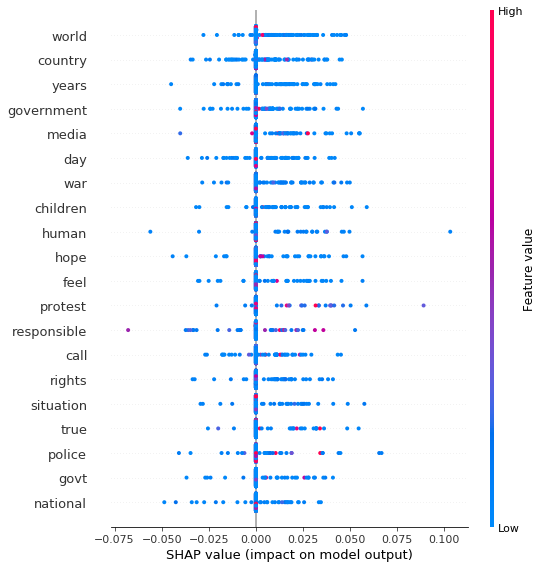

In [57]:
shap.summary_plot(shap_values_hh, hh_df, show=False)
plt.savefig('half_half_500_1819.png', bbox_inches = "tight")

In [58]:
burayu_list =  [('ETH', '2018-09-13'), ('ETH', '2018-09-14'), ('ETH', '2018-09-15'), ('ETH', '2018-09-16'), ('ETH', '2018-09-17')]
index_list = []
for country, date in burayu_list:
    index = peek_entry(country, date)
    index_list.append(index)

government      4
ideology        4
important       3
constitution    3
regional        3
problem         2
control         2
individuals     2
incite          2
days            2
poverty         2
today           2
supporters      2
airport         2
yeah            2
violence        2
race            2
coz             2
based           2
tear            2
unacceptable    2
stand           2
work            2
end             2
regions         2
police          2
make            2
time            2
gas             2
made            2
Name: 64445, dtype: int64
celebrate     3
full          2
abt           2
racial        2
sensitive     2
opinion       2
land          2
ethiopian     2
imposed       2
personally    2
strong        2
love          2
regions       2
activist      2
youth         2
things        2
respect       2
life          2
ideology      2
ryt           2
makes         2
ownership     2
senior        1
dollars       1
members       1
street        1
rebels        1
re

# Burayu

## After debiasing

In [130]:
result_path = "/export/b10/jzhan237/minerva/experiments/location_filter/results/vanilla/"
model_path = result_path+"results_daily_0_rf_model.pkl"
settings_path = result_path+"results_daily_0_rf_dict.pkl"
clf = pickle.load(open(model_path, "rb"))
results = pickle.load(open(settings_path, "rb"))
args = results["settings"]

Trying to unpickle estimator DecisionTreeClassifier from version 0.24.0 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator RandomForestClassifier from version 0.24.0 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.


In [131]:
args

Namespace(acled_event_data='/home/aadelucia/files/minerva/data/2014-01-01-2020-01-01_acled_reduced_all.csv', agg_weekly=False, debug=True, features='/export/b10/jzhan237/minerva/experiments/location_filter/count_10k_features.tsv', from_save=False, keep_feature_names=True, lead_time=0, models=['rf'], n_iter=10, n_jobs=10, output_dir='/export/b10/jzhan237/minerva/experiments/location_filter/results', random_seed=42, run_cv_train=False, save_df=False, split_countries=False, test_years=['2018', '2019'], train_years=['2014', '2015', '2016'], use_existing_model=False, validation_years=['2017'])

In [69]:
f = lambda x: clf.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))
explainer = shap.KernelExplainer(f, med)

In [108]:
index = index_list[4]
print(clf.predict_proba(X_test.iloc[index, :].values.reshape(1,-1)))
shap_values_single = explainer.shap_values(X_test.iloc[index,:], nsamples=1000)
fig_out = shap.force_plot(explainer.expected_value, shap_values_single, feature_names, show=False)

[[0.59 0.41]]


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.16058205 0.08056885 0.05389907 0.04056515 0.03256559 0.02723321
 0.02342495 0.02056926 0.01834862 0.01657252 0.01511974 0.01390944
 0.01288567 0.01200846 0.0112485  0.01058382 0.00999759 0.00947676
 0.00901099 0.00859203 0.00821319 0.00786901 0.00755496 0.00726729
 0.00700283 0.0067589  0.00653322 0.00632384 0.00612909 0.00594748
 0.00577777 0.00561882 0.00546967 0.00532946 0.00519741 0.00507285
 0.00495518 0.00484385 0.00473838 0.00463833 0.0045433  0.00445293
 0.00436692 0.00428495 0.00420676 0.0041321  0.00406076 0.00399252
 0.0039272  0.00386463 0.00380464 0.00374709 0.00369183 0.00363876
 0.00358773 0.00353866 0.00349144 0.00344597 0.00340216 0.00335994
 0.00331923 0.00327995 0.00324205 0.00320545 0.0031701  0.00313595
 0.00310293 0.00307101 0.00304014 0.00301026 0.00298136 0.00295337
 0.00292628 0.00290004 0.00287462 0.00284999 0.00282612 0.00280299
 0.00278056 0.00275881 0.00273773 0.00271728 0.00269745 0.0026

In [109]:
fig_out

In [110]:
shap.save_html('burayu_0917_after_debias_3.html', fig_out)

## Before debiasing (this produces weired output... use shap-ngram-recreate.ipynb instead)

In [153]:
result_path = "/export/b10/jzhan237/minerva/experiments/explain-ngram/results/"
model_path = result_path+"results_daily_0_rf_scaled_10_model.pkl"
settings_path = result_path+"results_daily_0_rf_scaled_10_dict.pkl"
clf = pickle.load(open(model_path, "rb"))
results = pickle.load(open(settings_path, "rb"))
args = results["settings"]

Trying to unpickle estimator DecisionTreeClassifier from version 0.24.0 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator RandomForestClassifier from version 0.24.0 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.


In [142]:
args.violent_demonstration_only = False
args.single_country = None
args.exclude_country = None
args

Namespace(acled_event_data='/home/aadelucia/files/minerva/data/2014-01-01-2020-01-01_acled_reduced_all.csv', agg_weekly=False, debug=True, exclude_country=None, features='/export/b10/jzhan237/minerva/experiments/explain-ngram/count_10k_features.tsv', from_save=False, keep_feature_names=True, lead_time=0, models=['rf', 'random'], n_iter=10, n_jobs=10, output_dir='/export/b10/jzhan237/minerva/experiments/explain-ngram/results', random_seed=42, run_cv_train=False, save_df=False, single_country=None, split_countries=False, test_years=['2018', '2019'], train_years=['2014', '2015', '2016'], use_existing_model=False, validation_years=['2017'], violent_demonstration_only=False)

In [143]:
from event_forecasting import load_dataset
dataset_df, feat_index = load_dataset(args)
train_df = dataset_df[dataset_df.DATE.map(lambda x: x.strftime("%Y") in args.train_years)]
# if args.validation_years:
#     valid_df = dataset_df[dataset_df.DATE.map(lambda x: x.strftime("%Y") in args.validation_years)]
# else:
#     valid_df = None
test_df = dataset_df[dataset_df.DATE.map(lambda x: x.strftime("%Y") in args.test_years)]

INFO:root:Loading, aggregating, and labelling features
INFO:root:                    00am  00pm  02pm  04pm  06pm  0km  0km gt  0km pressure  \
COUNTRY DATE                                                                  
GIN     2014-11-21     0     0     0     0     0    0       0             0   
        2014-04-04     0     0     0     0     0    0       0             0   
SDN     2015-02-16     0     0     0     0     0    0       0             0   
CMR     2014-06-08     0     0     0     0     0    0       0             0   
LKA     2014-07-19     0     0     0     0     0    0       0             0   

                    0km visibility  0kmh  1009mb  100faces  1010mb  1011mb  \
COUNTRY DATE                                                                 
GIN     2014-11-21               0     0       0         0       0       0   
        2014-04-04               0     0       0         0       0       0   
SDN     2015-02-16               0     0       0         0       0   

In [144]:
feature_names = list(dataset_df)[feat_index:]

In [145]:
'addisababa' in feature_names

True

In [146]:
X_train = train_df.iloc[:, feat_index:]
y_train = train_df.LABEL.values
X_test = test_df.iloc[:, feat_index:]
y_test = test_df.LABEL.values

In [147]:
X_test

,00am,00pm,02pm,04pm,06pm,0km,0km gt,0km pressure,0km visibility,0kmh,1009mb,100faces,1010mb,1011mb,1012mb,1013mb,1014mb,1015mb,1015mb falling,1015mb rising,1015mb steady,1016mb,1017mb,1018mb,1019mb,1020mb,1021mb,1024mb,10am,10k,10km,10km gt,10km pressure,10km visibility,10pm,10th,11am,11km,11km gt,11km pressure,11km visibility,11pm,11th,12pm,12th,13km,13km gt,13km pressure,13km visibility,13th,...,youknowigotit,youknowigotit leamakhoul,youknowigotit queen,young,young man,young people,young thug,younger,youngest,youre,youth,youths,youtube,youtube artiste,youu,youuu,yow,yr,yrs,yu,yuh,yum,yummy,yup,za,zam,zam blockade4or,zamalek,zambezi,zambia,zambiadecides,zambian,zambians,zanzibar,zardari,zayn,zealand,zed,zesco,zidane,zim,zimbabwe,zlatan,zombie,zone,zoo,zra2014,zulu,zuma,️follow
148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,0,6,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,3,0
329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,17,0,0,0,0,0,0,11,1,15,0,1,0,0,0,2,0,0,2,0,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,4,0,0,0,0,0
357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
413,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
430,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86401,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,1,0,5,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
86402,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
86403,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
86404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [154]:
f = lambda x: clf.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))
explainer = shap.KernelExplainer(f, med)

In [157]:
index = index_list[0]
print(clf.predict_proba(X_test.iloc[index, :].values.reshape(1,-1)))
shap_values_single = explainer.shap_values(X_test.iloc[index,:], nsamples=1000)
fig_out = shap.force_plot(explainer.expected_value, shap_values_single, feature_names, show=False)

[[0.92948804 0.07051196]]


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:shap:num_full_subsets = 0
INFO:shap:remaining_weight_vector = [0.14392457 0.07208467 0.04813831 0.03616535 0.02898173 0.0241928
 0.02077225 0.01820695 0.01621181 0.01461579 0.01331003 0.01222197
 0.01130137 0.01051235 0.00982859 0.00923035 0.00870255 0.00823345
 0.00781377 0.0074361  0.00709445 0.0067839  0.00650039 0.00624055
 0.00600153 0.00578093 0.00557671 0.00538711 0.00521062 0.00504593
 0.00489189 0.00474751 0.00461191 0.00448432 0.00436404 0.00425048
 0.00414308 0.00404136 0.00394488 0.00385325 0.00376612 0.00368316
 0.00360408 0.00352862 0.00345654 0.00338761 0.00332164 0.00325844
 0.00319784 0.00313969 0.00308384 0.00303015 0.00297852 0.00292881
 0.00288094 0.00283479 0.00279028 0.00274733 0.00270585 0.00266577
 0.00262703 0.00258955 0.00255328 0.00251817 0.00248415 0.00245118
 0.00241921 0.0023882  0.00235811 0.00232889 0.00230051 0.00227294
 0.00224614 0.00222008 0.00219473 0.00217007 0.00214606 0.00212269
 0.00209992 0.00207773 0.00205612 0.00203504 0.00201449 0.00199

In [158]:
fig_out

In [160]:
clf.clf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=10, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [110]:
shap.save_html('burayu_0917_before_debias.html', fig_out)